### Centro Universitário da Fundação Educacional Inaciana "Padre Sabóia de Medeiros" (FEI)


*FEI's Stricto Sensu Graduate Program in Electrical Engineering*

Concentration area: ARTIFICIAL INTELLIGENCE APPLIED TO AUTOMATION AND ROBOTICS

Master's thesis student Andre Luiz Florentino

***

## Check for GPU

In [1]:
import tensorflow as tf
print(tf.__version__)

pd = tf.config.experimental.list_physical_devices()
for i in pd:
    print(i)
print('------------------------------------------------------------------------------------------')


print(tf.config.list_physical_devices('GPU'))
# [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

print(tf.test.is_built_with_cuda)
# <function is_built_with_cuda at 0x000001AA24AFEC10>

print(tf.test.gpu_device_name())
# /device:GPU:0

#gvd = tf.config.get_visible_devices()
for j in tf.config.get_visible_devices():
    print(j)
# PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
# PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

#physical_devices = tf.config.experimental.list_physical_devices()
#tf.config.experimental.set_memory_growth(physical_devices[2], True)

2.3.0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')
------------------------------------------------------------------------------------------
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
<function is_built_with_cuda at 0x000001B35B2C20D0>
/device:GPU:0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Chapter 10: ESR data preparation

***

## Import modules

In [2]:
import os
import warnings
import mimetypes
import time
import pickle

import pandas     as pd
import seaborn    as sns
import numpy      as np

import IPython.display as ipd

from matplotlib  import pyplot  as plt

from collections                 import Counter
from sklearn                     import metrics
from sklearn.ensemble            import RandomForestClassifier
from sklearn.metrics             import classification_report
from tensorflow.keras.models     import load_model

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 120)

mimetypes.init()
mimetypes.add_type('audio/ogg','.ogg')

In [3]:
# Globals
current_path = os.getcwd()

# For the picture names
pic_first_name = '10_ESR_data_preparation_'

# For Librosa
FRAME_SIZE  = 1024
HOP_LENGTH  = 512
SEED        = 1000
SR          = 22050

cmap_cm     = plt.cm.Blues

tf.random.set_seed(SEED)
np.random.seed(SEED)

## Data preparation

In [4]:
cmap_cm     = plt.cm.Blues

path        = os.path.join(current_path, "_dataset", "US8K_AV")
path_models = os.path.join(current_path, "US8K_AV_saved_models")
path_pic    = os.path.join(current_path, "US8K_AV_results")

path_modelsVal = os.path.join(current_path, "_ESR", "Saved_models_fold_1_validation")
path_arrays    = os.path.join(current_path, "_ESR", "Arrays")

# Check if the folder exists, if not, create it
if not os.path.exists(path_models):
    os.makedirs(path_models)

if not os.path.exists(path_arrays):
    os.makedirs(path_arrays)

nom_dataset               = 'US8K_AV' 
csv_file                  = 'US8K_AV.csv'
fold_name                 = '1'

pkl_features              = 'US8K_AV_features_original.pkl'
pkl_aug_wind_features     = 'US8K_AV_features_windowed.pkl' # not augmented, just windowed
pkl_aug_features          = 'US8K_AV_features_augmented_no_windowing.pkl'

pkl_aug_wind_features_CNN = 'US8K_AV_features_CNN_2D_windowed.pkl' # not augmented, just windowed

DB_ori_from_pkl       = pd.read_pickle(os.path.join(path_models, pkl_features))
DB_aug_from_pkl       = pd.read_pickle(os.path.join(path_models, pkl_aug_wind_features))
DB_aug_CNN2D_from_pkl = pd.read_pickle(os.path.join(path_models, pkl_aug_wind_features_CNN))

In [5]:
print(type(DB_ori_from_pkl['Fold'][0][0]))
print(type(DB_aug_from_pkl['Fold'][0]))
print(type(DB_ori_from_pkl['Class_OHEV'][0][0]))
print(type(DB_ori_from_pkl['Class_OHEV'][0]))
print(type(DB_aug_from_pkl['Class_OHEV'][0][0]))
print(type(DB_aug_from_pkl['Class_OHEV'][0]))

<class 'str'>
<class 'str'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>


In [6]:
for fold in np.unique(DB_ori_from_pkl['Fold']):
    print(f"Validation fold: {fold}")
    
    valsize = len(DB_ori_from_pkl[DB_ori_from_pkl['Fold'] == fold])
    trnsize = len(DB_ori_from_pkl[DB_ori_from_pkl['Fold'] != fold])
    print(f'dbComplete_VAL size: {valsize}')
    print(f'dbComplete size: {trnsize}')
    print()

Validation fold: 1
dbComplete_VAL size: 478
dbComplete size: 4430

Validation fold: 10
dbComplete_VAL size: 468
dbComplete size: 4440

Validation fold: 2
dbComplete_VAL size: 485
dbComplete size: 4423

Validation fold: 3
dbComplete_VAL size: 536
dbComplete size: 4372

Validation fold: 4
dbComplete_VAL size: 599
dbComplete size: 4309

Validation fold: 5
dbComplete_VAL size: 529
dbComplete size: 4379

Validation fold: 6
dbComplete_VAL size: 460
dbComplete size: 4448

Validation fold: 7
dbComplete_VAL size: 465
dbComplete size: 4443

Validation fold: 8
dbComplete_VAL size: 441
dbComplete size: 4467

Validation fold: 9
dbComplete_VAL size: 447
dbComplete size: 4461



In [7]:
print(type(DB_aug_CNN2D_from_pkl['Fold'][0][0]))
print(type(DB_aug_CNN2D_from_pkl['Fold'][0]))
print(type(DB_aug_CNN2D_from_pkl['Class_OHEV'][0][0]))
print(type(DB_aug_CNN2D_from_pkl['Class_OHEV'][0]))
print(type(DB_aug_CNN2D_from_pkl['Class_OHEV'][0][0]))
print(type(DB_aug_CNN2D_from_pkl['Class_OHEV'][0]))

<class 'str'>
<class 'str'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>


In [8]:
DB_ori_from_pkl

Audio Class_categorical          Class_OHEV Fold  ...  TONNETZ_std_6  TONNETZ_median_6  TONNETZ_skew_6  TONNETZ_kurtosis_6
0     [-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...          dog_bark  [0, 0, 0, 1, 0, 0]    5  ...       0.024244         -0.049756        0.759231           -0.024962
1     [0.0027405696, 0.0036386526, 0.0023064336, 0.0023546093, 0.0025339962, 0.0030277965, 0.0027998006, 0.0028241847, 0.0...  children_playing  [0, 0, 1, 0, 0, 0]    5  ...       0.018670         -0.018241        0.275013           -0.497943
2     [-0.0027212622, -0.0030217567, -0.0016039186, -0.0012952066, -0.001044448, -0.0011087725, -0.0006573542, -0.00120615...  children_playing  [0, 0, 1, 0, 0, 0]    5  ...       0.018733          0.009139       -0.205466           -0.212879
3     [0.00015050662, -0.00023231667, -0.0013628466, -0.002236663, -0.0027237535, -0.002267104, -0.0012131947, -0.00148792...  children_playing  [0, 0, 1, 0, 0, 0]    5  ...       0.027117          0.007208       -0.769827            0.623153
4     [0.0012501464, 0.00428795, 0.0062407875, 0.0055125337, 0.003776363, 0.0018791268, 0.0014532767, 0.0026125484, 0.0038...  children_playing  [0, 0, 1, 0, 0, 0]    5  ...       0.025776          0.050245        0.208739           -1.062755
...                                                                                                                       ...               ...                 ...  ...  ...            ...               ...             ...                 ...
4903  [0.0020684754, 0.002996013, 0.0027406309, 0.0031264792, 0.0030979805, 0.0032640784, 0.0030700786, 0.0029712087, 0.00...           silence  [0, 0, 0, 0, 1, 0]    9  ...       0.046910         -0.014152        1.014088            0.288518
4904  [-0.00054763607, -0.0006439837, -0.0003565054, -0.00026786933, -0.00012919167, -0.0002218535, -0.00025803095, -0.000...           silence  [0, 0, 0, 0, 1, 0]    9  ...       0.048725          0.003801       -0.290986           -1.009455
4905  [0.00036112632, 0.0003222265, -2.3932662e-05, -0.00028421593, -0.0005354925, -0.0005733533, -0.00046778092, -0.00020...           silence  [0, 0, 0, 0, 1, 0]    9  ...       0.032608         -0.043836        1.350900            2.272794
4906  [-0.0002325126, -0.00035913184, -0.00025248923, -0.0001690893, 1.3734563e-05, 0.00021053397, 0.0003744613, 0.0003582...           silence  [0, 0, 0, 0, 1, 0]    9  ...       0.026508         -0.003402       -0.001074           -0.871445
4907  [0.0026206055, 0.0038794908, 0.0034889658, 0.0038078218, 0.0035701613, 0.0035852434, 0.003173263, 0.003009905, 0.002...           silence  [0, 0, 0, 0, 1, 0]    9  ...       0.027840          0.001814        0.085966           -0.302271

[4908 rows x 379 columns]

In [9]:
DB_aug_CNN2D_from_pkl

Class_categorical          Class_OHEV Fold                                                                                                                 features
0              dog_bark  [0, 0, 0, 1, 0, 0]    5  [[[-44.0467643737793], [-39.25644302368164], [-38.62413787841797], [-36.58848571777344], [-32.5598030090332], [-31.4...
1              dog_bark  [0, 0, 0, 1, 0, 0]    5  [[[-29.934663772583008], [-34.787696838378906], [-40.06871795654297], [-41.22150802612305], [-41.03109359741211], [-...
2              dog_bark  [0, 0, 0, 1, 0, 0]    5  [[[-23.2158260345459], [-28.396337509155273], [-32.66521072387695], [-31.442462921142578], [-35.61741256713867], [-3...
3              dog_bark  [0, 0, 0, 1, 0, 0]    5  [[[-37.06025695800781], [-39.86629104614258], [-41.0966682434082], [-38.97296142578125], [-41.87018966674805], [-39....
4              dog_bark  [0, 0, 0, 1, 0, 0]    5  [[[-28.527423858642578], [-29.930322647094727], [-35.48342514038086], [-38.032806396484375], [-38.82895278930664], [...
...                 ...                 ...  ...                                                                                                                      ...
34351           silence  [0, 0, 0, 0, 1, 0]    9  [[[-28.725196838378906], [-21.75506591796875], [-15.691794395446777], [-11.686802864074707], [-13.252153396606445], ...
34352           silence  [0, 0, 0, 0, 1, 0]    9  [[[-18.317378997802734], [-14.795974731445312], [-13.88856315612793], [-13.34511947631836], [-14.05569076538086], [-...
34353           silence  [0, 0, 0, 0, 1, 0]    9  [[[-14.710319519042969], [-12.146648406982422], [-13.191940307617188], [-14.210320472717285], [-15.148565292358398],...
34354           silence  [0, 0, 0, 0, 1, 0]    9  [[[-26.25575828552246], [-20.983177185058594], [-14.533549308776855], [-15.130903244018555], [-16.879596710205078], ...
34355           silence  [0, 0, 0, 0, 1, 0]    9  [[[-21.296524047851562], [-16.268943786621094], [-14.404431343078613], [-15.91522216796875], [-16.815860748291016], ...

[34356 rows x 4 columns]

In [10]:
for fold in np.unique(DB_aug_CNN2D_from_pkl['Fold']):
    print(f"Validation fold: {fold}")
    
    valsize = len(DB_aug_CNN2D_from_pkl[DB_aug_CNN2D_from_pkl['Fold'] == fold])
    trnsize = len(DB_aug_CNN2D_from_pkl[DB_aug_CNN2D_from_pkl['Fold'] != fold])
    print(f'dbComplete_VAL size: {valsize}')
    print(f'dbComplete size: {trnsize}')
    print()

Validation fold: 1
dbComplete_VAL size: 3346
dbComplete size: 31010

Validation fold: 10
dbComplete_VAL size: 3276
dbComplete size: 31080

Validation fold: 2
dbComplete_VAL size: 3395
dbComplete size: 30961

Validation fold: 3
dbComplete_VAL size: 3752
dbComplete size: 30604

Validation fold: 4
dbComplete_VAL size: 4193
dbComplete size: 30163

Validation fold: 5
dbComplete_VAL size: 3703
dbComplete size: 30653

Validation fold: 6
dbComplete_VAL size: 3220
dbComplete size: 31136

Validation fold: 7
dbComplete_VAL size: 3255
dbComplete size: 31101

Validation fold: 8
dbComplete_VAL size: 3087
dbComplete size: 31269

Validation fold: 9
dbComplete_VAL size: 3129
dbComplete size: 31227



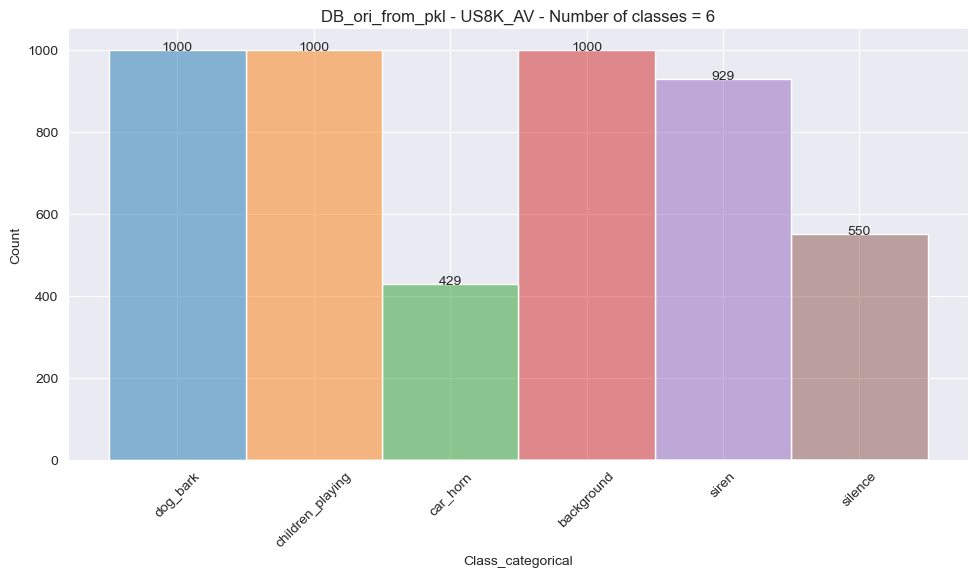

In [11]:
# Analysis of the class balancing

sns.set_style("darkgrid")
gTitle = 'DB_ori_from_pkl - ' + nom_dataset + ' - Number of classes = ' + str(len(pd.Series(DB_ori_from_pkl['Class_categorical']).unique()))
g = sns.displot(DB_ori_from_pkl,x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=45)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

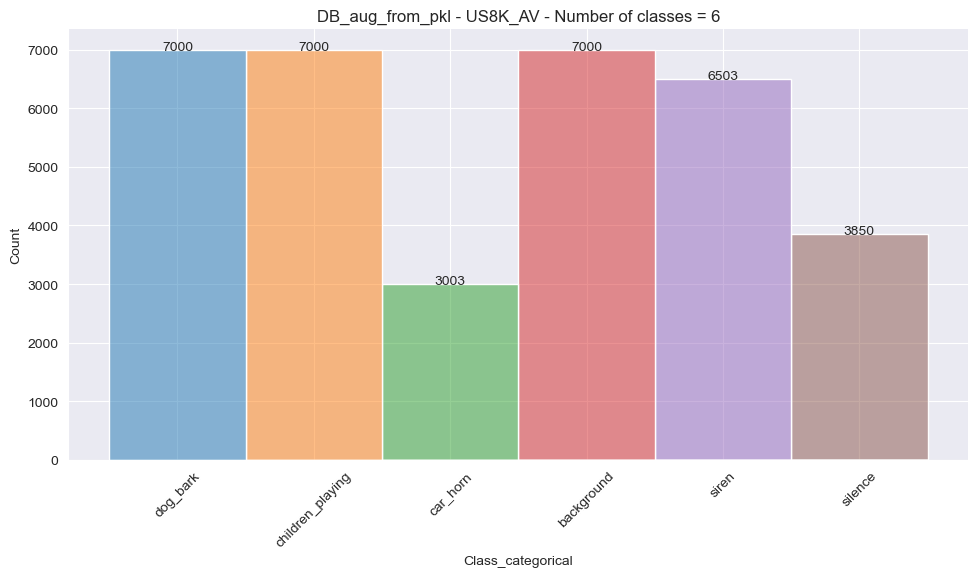

In [12]:
# Analysis of the class balancing

sns.set_style("darkgrid")
gTitle = 'DB_aug_from_pkl - ' + nom_dataset + ' - Number of classes = ' + str(len(pd.Series(DB_aug_from_pkl['Class_categorical']).unique()))
g = sns.displot(DB_aug_from_pkl,x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=45)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

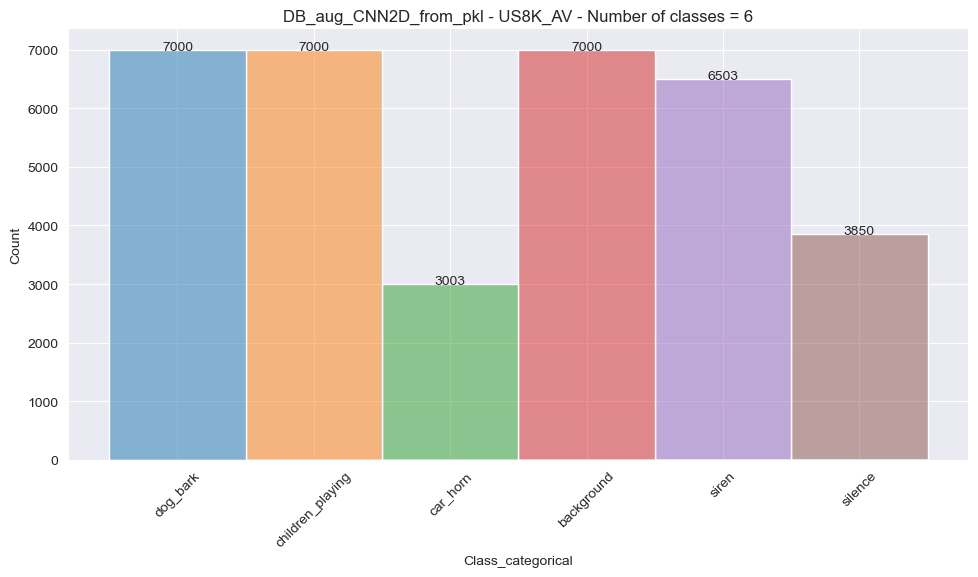

In [13]:
# Analysis of the class balancing

sns.set_style("darkgrid")
gTitle = 'DB_aug_CNN2D_from_pkl - ' + nom_dataset + ' - Number of classes = ' + str(len(pd.Series(DB_aug_CNN2D_from_pkl['Class_categorical']).unique()))
g = sns.displot(DB_aug_CNN2D_from_pkl,x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=45)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

In [14]:
# Group by the class and get one random sample of each class
k = DB_aug_from_pkl.groupby('Class_categorical')['Class_OHEV'].apply(lambda s: s.sample(1))
print(k)

# Convert the pandas series into a dataframe
temp_k_df = k.reset_index()

# Delete the index from the grouppby result
del temp_k_df['level_1']

# Set the "Class" as the dataframe index
temp_k_df.set_index("Class_categorical", inplace=True)

# Convert the dataframe to a dictionary (Class: Class_encoder)
encoder_dict = temp_k_df["Class_OHEV"].to_dict()
encoder_dict

Class_categorical       
background         21120    [1, 0, 0, 0, 0, 0]
car_horn           26717    [0, 1, 0, 0, 0, 0]
children_playing   859      [0, 0, 1, 0, 0, 0]
dog_bark           27962    [0, 0, 0, 1, 0, 0]
silence            32643    [0, 0, 0, 0, 1, 0]
siren              25447    [0, 0, 0, 0, 0, 1]
Name: Class_OHEV, dtype: object


{'background': array([1, 0, 0, 0, 0, 0]),
 'car_horn': array([0, 1, 0, 0, 0, 0]),
 'children_playing': array([0, 0, 1, 0, 0, 0]),
 'dog_bark': array([0, 0, 0, 1, 0, 0]),
 'silence': array([0, 0, 0, 0, 1, 0]),
 'siren': array([0, 0, 0, 0, 0, 1])}

In [15]:
# Number of classes in the dataset

num_classes = len(encoder_dict.keys())
num_classes

6

In [16]:
# Name of the classes

nom_classes = list(encoder_dict.keys())

with open(os.path.join(path_arrays, 'nom_classes.csv'), 'w') as file:
    for value in nom_classes:
        file.write(value + '\n')

nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'silence', 'siren']

In [17]:
# Retrieve the name of the classes

nom_classes = []
with open(os.path.join(path_arrays, 'nom_classes.csv'), 'r') as file:
    for line in file:
        nom_classes.append(line.strip())
nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'silence', 'siren']

In [18]:
for col in DB_ori_from_pkl.columns:
    print(col)

Audio
Class_categorical
Class_OHEV
Fold
RMSE
ZCR
CENTROIDS
BANDWIDTH
ROLLOFF
MEL_1
MEL_2
MEL_3
MEL_4
MEL_5
MEL_6
MEL_7
MEL_8
MEL_9
MEL_10
MEL_11
MEL_12
MEL_13
MEL_14
MEL_15
MEL_16
MEL_17
MEL_18
MEL_19
MEL_20
MEL_21
MEL_22
MEL_23
MEL_24
MEL_25
MEL_26
MEL_27
MEL_28
MEL_29
MEL_30
MEL_31
MEL_32
MEL_33
MEL_34
MEL_35
MEL_36
MEL_37
MEL_38
MEL_39
MEL_40
MEL_41
MEL_42
MEL_43
MEL_44
MEL_45
MEL_46
MEL_47
MEL_48
MEL_49
MEL_50
MEL_51
MEL_52
MEL_53
MEL_54
MEL_55
MEL_56
MEL_57
MEL_58
MEL_59
MEL_60
MEL_61
MEL_62
MEL_63
MEL_64
MEL_65
MEL_66
MEL_67
MEL_68
MEL_69
MEL_70
MEL_71
MEL_72
MEL_73
MEL_74
MEL_75
MEL_76
MEL_77
MEL_78
MEL_79
MEL_80
MEL_81
MEL_82
MEL_83
MEL_84
MEL_85
MEL_86
MEL_87
MEL_88
MEL_89
MEL_90
MEL_91
MEL_92
MEL_93
MEL_94
MEL_95
MEL_96
MEL_97
MEL_98
MEL_99
MEL_100
MEL_101
MEL_102
MEL_103
MEL_104
MEL_105
MEL_106
MEL_107
MEL_108
MEL_109
MEL_110
MEL_111
MEL_112
MEL_113
MEL_114
MEL_115
MEL_116
MEL_117
MEL_118
MEL_119
MEL_120
MEL_121
MEL_122
MEL_123
MEL_124
MEL_125
MEL_126
MEL_127
MEL_128
MFCC_1


In [19]:
# Separate 1 fold for validation and create a DB for the training / testing

DB_ori_from_pkl_VAL = DB_ori_from_pkl[DB_ori_from_pkl['Fold'] == fold_name].copy()
DB_ori_from_pkl_TRN = DB_ori_from_pkl[DB_ori_from_pkl['Fold'] != fold_name].copy()

In [20]:
# Separate 1 fold for validation and create a DB for the training / testing

DB_aug_from_pkl_VAL = DB_aug_from_pkl[DB_aug_from_pkl['Fold'] == fold_name].copy()
DB_aug_from_pkl_TRN = DB_aug_from_pkl[DB_aug_from_pkl['Fold'] != fold_name].copy()

In [21]:
print(len(DB_ori_from_pkl_VAL))
print(len(DB_ori_from_pkl_TRN))
print('Total: ', len(DB_ori_from_pkl_VAL) + len(DB_ori_from_pkl_TRN),'\n')
print(len(DB_aug_from_pkl_VAL))
print(len(DB_aug_from_pkl_TRN))
print('Total: ', len(DB_aug_from_pkl_VAL) + len(DB_aug_from_pkl_TRN))

478
4430
Total:  4908 

3346
31010
Total:  34356


In [22]:
# Separating data and labels for training
X      = DB_aug_from_pkl_TRN.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
y_cat  = np.array(DB_aug_from_pkl_TRN.Class_categorical.to_list())
y_OHEV = np.array(DB_aug_from_pkl_TRN.Class_OHEV.to_list())

# Separating data and labels for validation
X_val      = DB_aug_from_pkl_VAL.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
y_val_cat  = np.array(DB_aug_from_pkl_VAL.Class_categorical.to_list())
y_OHEV_val = np.array(DB_aug_from_pkl_VAL.Class_OHEV.to_list())

In [23]:
type(X.at[1, 'RMSE'])

numpy.float64

In [24]:
# Select from normalization or standartization

def scaler(X: pd.DataFrame, X_val: pd.DataFrame, opc:int):
    opc = opc
    while str(opc) not in '12':
        print()
        print("1-) Normalization (Scaled from 0 to 1)")
        print("2-) Standartization (Standard deviation of 1)")

        opc = input("\nSelect the dataset: ")
        if opc.isdigit():
            opc = int(opc)
        else:
            opc = 0

    X_statistics = pd.DataFrame({'mean': X.mean(), 'std': X.std(), 'min': X.min(), 'max': X.max()})

    X_mean   = X_statistics.values[:, 0]
    X_std    = X_statistics.values[:, 1]
    X_min    = X_statistics.values[:, 2]
    X_max    = X_statistics.values[:, 3]
    
    # Save Min, Max, Mean and standard deviation to be used in the next notebooks

    X_mean.tofile(os.path.join(path_arrays, 'X_train_mean.csv'), sep=',')
    X_std.tofile(os.path.join(path_arrays,  'X_train_std.csv'),  sep=',')
    X_min.tofile(os.path.join(path_arrays,  'X_train_min.csv'),  sep=',')
    X_max.tofile(os.path.join(path_arrays,  'X_train_max.csv'),  sep=',')
        
    if opc == 1:
        X_train_norm = (X.values - X_min) / (X_max - X_min)
        X_val_norm   = (X_val.values - X_min) / (X_max - X_min)
        batch_type    = '_norm'
        print(f'\nX_train_norm shape...:{X_train_norm.shape}')
        print(f'X_val_norm shape.....:{X_val_norm.shape}\n')

    elif opc == 2:
        X_train_norm = (X.values - X_mean) / X_std
        X_val_norm   = (X_val.values - X_mean) / X_std
        batch_type    = '_std'
        print(f'\nX_train_norm shape...:{X_train_norm.shape}')
        print(f'X_val_norm shape.....:{X_val_norm.shape}\n')
            
    return X_train_norm, X_val_norm

In [25]:
X_norm, X_val_norm = scaler(X, X_val, 1)


X_train_norm shape...:(31010, 375)
X_val_norm shape.....:(3346, 375)



In [26]:
RMSE_lst = []
for i in X_norm:
    RMSE_lst.append([i][0][0])
    
print(np.mean(RMSE_lst))

0.07857966857264685


In [27]:
X_t= X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X_t.describe()

RMSE           ZCR     CENTROIDS     BANDWIDTH  ...  TONNETZ_std_6  TONNETZ_median_6  TONNETZ_skew_6  TONNETZ_kurtosis_6
count  31010.000000  31010.000000  31010.000000  31010.000000  ...   31010.000000      31010.000000    31010.000000        31010.000000
mean       0.078580      0.164399      0.289360      0.457202  ...       0.107476          0.395954        0.577451            0.067560
std        0.091977      0.116850      0.130881      0.131803  ...       0.083684          0.066135        0.071172            0.044900
min        0.000000      0.000000      0.000000      0.000000  ...       0.000000          0.000000        0.000000            0.000000
25%        0.016741      0.090965      0.200186      0.359714  ...       0.062500          0.364006        0.534102            0.041471
50%        0.047285      0.139762      0.264936      0.442467  ...       0.085252          0.395477        0.576102            0.057939
75%        0.107849      0.195804      0.343760      0.538524  ...       0.123497          0.426961        0.619075            0.080392
max        1.000000      1.000000      1.000000      1.000000  ...       1.000000          1.000000        1.000000            1.000000

[8 rows x 375 columns]

In [28]:
X_t['RMSE'].mean()

0.07857966857264685

In [29]:
X_std, X_val_std = scaler(X, X_val, 2)


X_train_norm shape...:(31010, 375)
X_val_norm shape.....:(3346, 375)



In [30]:
RMSE_lst2 = []
for i in X_std:
    RMSE_lst2.append([i][0][0])
    
print(np.mean(RMSE_lst2))

-2.9329077774038316e-17


In [31]:
X_t2= X.apply(lambda x: (x - x.mean()) / x.std())
X_t2.describe()

RMSE           ZCR     CENTROIDS     BANDWIDTH  ...  TONNETZ_std_6  TONNETZ_median_6  TONNETZ_skew_6  TONNETZ_kurtosis_6
count  3.101000e+04  3.101000e+04  3.101000e+04  3.101000e+04  ...   3.101000e+04      3.101000e+04    3.101000e+04        3.101000e+04
mean  -2.932908e-17 -2.126358e-16 -4.765975e-17 -4.692652e-16  ...   1.246486e-16     -1.649761e-17   -7.332269e-18       -2.932908e-17
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  ...   1.000000e+00      1.000000e+00    1.000000e+00        1.000000e+00
min   -8.543420e-01 -1.406931e+00 -2.210865e+00 -3.468820e+00  ...  -1.284307e+00     -5.987022e+00   -8.113499e+00       -1.504685e+00
25%   -6.723279e-01 -6.284512e-01 -6.813370e-01 -7.396459e-01  ...  -5.374443e-01     -4.830824e-01   -6.090748e-01       -5.810418e-01
50%   -3.402409e-01 -2.108442e-01 -1.866138e-01 -1.117963e-01  ...  -2.655662e-01     -7.216626e-03   -1.895609e-02       -2.142723e-01
75%    3.182232e-01  2.687624e-01  4.156438e-01  6.169920e-01  ...   1.914531e-01      4.688279e-01    5.848382e-01        2.857877e-01
max    1.001796e+01  7.151084e+00  5.429671e+00  4.118237e+00  ...   1.066543e+01      9.133460e+00    5.937041e+00        2.076719e+01

[8 rows x 375 columns]

In [32]:
X_t2['RMSE'].mean()

-2.9329077774038316e-17

In [33]:
def get_next_file_number(folder: str):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(pic_first_name)]
    if not files:
        return 1
    else:
        numbers = [int(f.split('.')[0].split('_')[-1]) for f in files]
        return max(numbers) + 1

In [34]:
# Plot the confusion matrix

def plot_confusion_matrix(y_test_enc, y_pred_saved, score_saved, cmap, model_name, ax=None, savepic = True):
    
    picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'
    
    if type(score_saved) == list:
        score = score_saved[1]
    else:
        score = score_saved
    
    conf_matrix = metrics.confusion_matrix(y_test_enc, y_pred_saved)
    title = nom_dataset + ' - ' + model_name[:-17] + ' (best model) - Highest accuracy validation: '+ str("{:0.2f}%".format(score*100))

    if ax is None:
        plt.figure(figsize = (10,10))
        ax = plt.gca()
        
    sns.heatmap(conf_matrix, 
                annot=True, 
                fmt='g', 
                cmap=cmap_cm, 
                annot_kws={"size": 12}, 
                xticklabels=nom_classes, 
                yticklabels=nom_classes,
                ax=ax)
    ax.set_title(title, fontsize = 14)
    
    if savepic:
        plt.savefig(os.path.join(path_pic, picture_name))

In [35]:
print(X_std.shape)
print(y_OHEV.shape)
print(y_cat.shape)
print("=====================")
print(X_val_std.shape)
print(y_OHEV_val.shape)
print(y_val_cat.shape)

(31010, 375)
(31010, 6)
(31010,)
(3346, 375)
(3346, 6)
(3346,)


In [36]:
print(X_norm.shape)
print(y_OHEV.shape)
print(y_cat.shape)
print("=====================")
print(X_val_norm.shape)
print(y_OHEV_val.shape)
print(y_val_cat.shape)

(31010, 375)
(31010, 6)
(31010,)
(3346, 375)
(3346, 6)
(3346,)


In [37]:
# Retrieve the indexes used for training the classifiers in the notebook 04_ML_modeling.ipynb

idx_trn = np.genfromtxt(os.path.join(path_models,  '_idx_trn_US8K_AV_windowed.csv'), delimiter=',', dtype = int)
idx_tst = np.genfromtxt(os.path.join(path_models,  '_idx_tst_US8K_AV_windowed.csv'), delimiter=',', dtype = int)

In [38]:
idx_trn

array([ 1407, 16859,  5412, ...,  3926, 15590, 24914])

In [39]:
idx_tst

array([ 6025, 24431, 11398, ..., 30565, 25076, 10536])

In [40]:
X_train     = X_norm[idx_trn]
X_test      = X_norm[idx_tst]
X_trainS    = X_std[idx_trn]
X_testS     = X_std[idx_tst]
y_train     = y_OHEV[idx_trn]
y_test      = y_OHEV[idx_tst]
y_train_cat = y_cat[idx_trn]
y_test_cat  = y_cat[idx_tst]

In [41]:
print(f'Training data norm.....: {X_train.shape}')
print(f'Training data std......: {X_trainS.shape}')
print(f'Training label.........: {y_train.shape}')
print(f'Training label catg....: {y_train_cat.shape}')
print("========================================")
print(f'Testing data norm......: {X_test.shape}')
print(f'Testing data std.......: {X_testS.shape}')
print(f'Testing label..........: {y_test.shape}')
print(f'Testing label catg.....: {y_test_cat.shape}')
print("========================================")
print(f'Validation data norm...: {X_val_norm.shape}')
print(f'Validation data std....: {X_val_std.shape}')
print(f'Validation label.......: {y_OHEV_val.shape}')
print(f'Validation label catg..: {y_val_cat.shape}')
print("========================================")


Training data norm.....: (27909, 375)
Training data std......: (27909, 375)
Training label.........: (27909, 6)
Training label catg....: (27909,)
Testing data norm......: (3101, 375)
Testing data std.......: (3101, 375)
Testing label..........: (3101, 6)
Testing label catg.....: (3101,)
Validation data norm...: (3346, 375)
Validation data std....: (3346, 375)
Validation label.......: (3346, 6)
Validation label catg..: (3346,)


In [42]:
# For OHEV

Counter_test     = Counter(map(tuple, y_test))
Counter_test_cat = Counter(y_test_cat)
Counter_train    = Counter(map(tuple, y_train))

In [43]:
print('Training samples')
Counter_train

Training samples


Counter({(0, 0, 0, 0, 0, 1): 5311,
         (0, 0, 0, 1, 0, 0): 5670,
         (1, 0, 0, 0, 0, 0): 5620,
         (0, 1, 0, 0, 0, 0): 2476,
         (0, 0, 1, 0, 0, 0): 5670,
         (0, 0, 0, 0, 1, 0): 3162})

In [44]:
print('Testing samples')
Counter_test

Testing samples


Counter({(0, 0, 0, 1, 0, 0): 630,
         (0, 0, 1, 0, 0, 0): 630,
         (0, 0, 0, 0, 0, 1): 590,
         (1, 0, 0, 0, 0, 0): 624,
         (0, 0, 0, 0, 1, 0): 352,
         (0, 1, 0, 0, 0, 0): 275})

In [45]:
print('Testing samples')
Counter_test_cat

Testing samples


Counter({'dog_bark': 630,
         'children_playing': 630,
         'siren': 590,
         'background': 624,
         'silence': 352,
         'car_horn': 275})

In [46]:
n_dim = X_train.shape[1]
n_dim

375

In [47]:
# Separate 1 fold for validation and create a DB for the training / testing CNN2D

DB_aug_from_pkl_VAL_CNN2D = DB_aug_CNN2D_from_pkl[DB_aug_CNN2D_from_pkl['Fold'] == fold_name].copy()
DB_aug_from_pkl_TRN_CNN2D = DB_aug_CNN2D_from_pkl[DB_aug_CNN2D_from_pkl['Fold'] != fold_name].copy()

In [48]:
print(f'dbComplete_VAL size..: {str(len(DB_aug_from_pkl_VAL_CNN2D))}')
print(f'dbComplete size......: {str(len(DB_aug_from_pkl_TRN_CNN2D))}')

dbComplete_VAL size..: 3346
dbComplete size......: 31010


In [49]:
X_val_CNN2D   = DB_aug_from_pkl_VAL_CNN2D['features'].to_numpy()
y_val_CNN2D   = np.array(DB_aug_from_pkl_VAL_CNN2D.Class_OHEV.to_list())
X_train_CNN2D = DB_aug_from_pkl_TRN_CNN2D['features'].to_numpy()
y_train_CNN2D = np.array(DB_aug_from_pkl_TRN_CNN2D.Class_OHEV.to_list())
print(f'X_train antes do stack...........: {len(X_train_CNN2D)}')
print(f'Shape do X_train antes do stack..: {X_train_CNN2D.shape}')

X_train antes do stack...........: 31010
Shape do X_train antes do stack..: (31010,)


In [50]:
X_val_CNN2D   = np.stack(X_val_CNN2D)
X_train_CNN2D = np.stack(X_train_CNN2D)

In [51]:
print(f'X_train depis do stack...........: {len(X_train_CNN2D)}')
print(f'Shape do X_train depois do stack..: {X_train_CNN2D.shape}')

X_train depis do stack...........: 31010
Shape do X_train depois do stack..: (31010, 180, 44, 1)


In [52]:
# Passing all elements as float32
X_train_CNN2D = np.asarray(X_train_CNN2D).astype(np.float32)
y_train_CNN2D = np.asarray(y_train_CNN2D).astype(np.float32)
X_val_CNN2D   = np.asarray(X_val_CNN2D).astype(np.float32)
y_val_CNN2D   = np.asarray(y_val_CNN2D).astype(np.float32)

In [53]:
X_train_CNN2D_final = X_train_CNN2D[idx_trn]
X_test_CNN2D        = X_train_CNN2D[idx_tst]
y_train_CNN2D_final = y_train_CNN2D[idx_trn]
y_test_CNN2D        = y_train_CNN2D[idx_tst]

In [54]:
print(f'X_train_CNN2D_final shape..: {np.shape(X_train_CNN2D_final)}')
print(f'y_train_CNN2D_final shape..: {np.shape(y_train_CNN2D_final)}')
print(f'X_test_CNN2D shape.........: {np.shape(X_test_CNN2D)}')
print(f'y_test_CNN2D shape.........: {np.shape(y_test_CNN2D)}')
print(f'X_val_CNN2D shape..........: {np.shape(X_val_CNN2D)}')
print(f'y_val_CNN2D shape..........: {np.shape(y_val_CNN2D)}')

X_train_CNN2D_final shape..: (27909, 180, 44, 1)
y_train_CNN2D_final shape..: (27909, 6)
X_test_CNN2D shape.........: (3101, 180, 44, 1)
y_test_CNN2D shape.........: (3101, 6)
X_val_CNN2D shape..........: (3346, 180, 44, 1)
y_val_CNN2D shape..........: (3346, 6)


### BEFORE STARTING

To avoid misuse of the previous saved models, before starting, copy the following files used for training the classifiers considering the fold 1 as the validation set to the folder:

**_ESR\Saved_models_fold_1_validation**

* Model_ANN_weights_0_best_norm_windowed.hdf5
* Model_CNN_1D_weights_0_best_norm_windowed.hdf5
* Model_CNN_2D_weights_0_best_windowed.hdf5
* Model_Forest_norm_windowed.pkl
* Model_LogisticR_norm_windowed.pkl
* Model_SVC_norm_windowed.pkl

### Train / Test / Validation sets according classifiers

The train / test split was carried out to confirm the results from the previous notebook. For simplicity, this checking was omitted in this notebook and only the validation sets were explicitly confirmed.

**MLP, CNN1D**
   
* X_trainN    
* X_testN  
* y_train     
* y_test
* X_val_norm
* y_val

**LR, SVC, RF**

* X_trainN    
* X_testN  
* y_train_cat 
* y_test_cat 
* X_val_norm
* y_val_cat

**CNN2D**

* X_train_CNN2D_final
* X_test_CNN2D
* y_train_CNN2D_final 
* y_test_CNN2D
* X_val_CNN2D
* y_val_CNN2D

## Partial conclusion presented in the qualification exam

* Despite not being the main focus of this study, in at least one of the proposed models, the accuracy surpassed the benchmark of the selected datasets;

* The custom dataset US8K_AV achieved an average accuracy of 81% to 82% using LR, MLP and 1D CNN;

* Principal Component Analysis (PCA) resulted in an average reduction of 50% or more in the number of attributes without significantly affecting the accuracy of the classifiers;

* The inclusion of Mutual Information resulted in a significant increase in the accuracy of the Random Forest classifier, additionally there was an average reduction of 50% in the number of attributes and therefore this classifier will continue to be analyzed in the next stages;

* In light of the advantages derived from the 1-second response time, the utilization of the window technique has demonstrated a constrained impact on accuracy and will be the established as the only technique to continue to be investigated.

### Models to be investigated (for training: all windowed)

* LR - Logistic Regression with **standardized** (Accuracy: 80.43% +/- 2.54%). 
    * Best folds 2, 1, 10, 8.
* RF - Random Forest with **un-normalized Mutual Information** (Accuracy 80.50% +/-3.28%). Non-windowed validation set. 
    * Best folds 1, 6, 2, 3.
* MLP - Multilayer Perceptron with **standardized** (Accuracy: 81.24% +/-2.96%). 
    * Best folds 9, 3, 1, 5.
* CNN_1D - Convolution Neural Network 1D with **standardized** (Accuracy: 80.44% +/- 3.58%). 
    * Best folds 9, 1, 8, 5.
* CNN_2D - Convolution Neural Network 2D **Log-Mel agg with delta** (Accuracy: 80.76% +/- 2.59%). 
    * Best folds 3, 9, 1, 6.

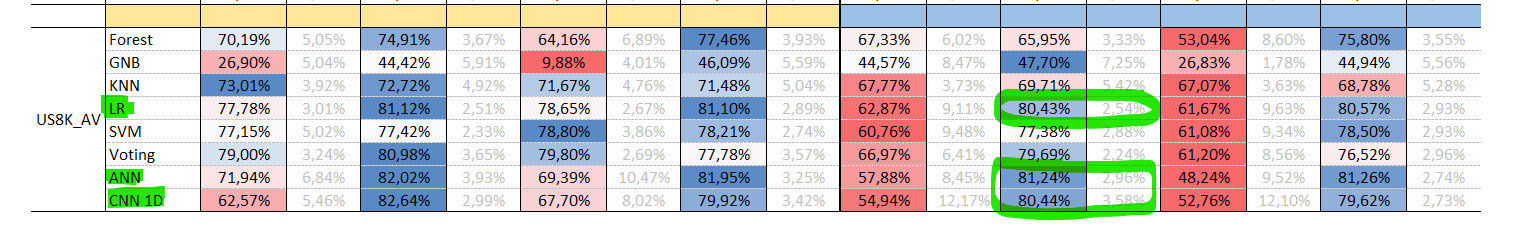

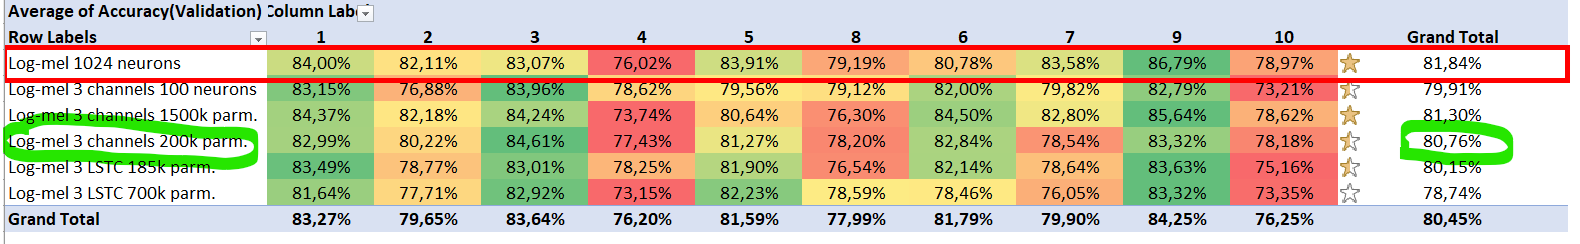

The "Log-mel 1024 neurons" and "Log-mel 3 channels 1500h param." models wer not choosen give its huge numbers of parameters (15.5M and 1.5M respectively). The third best model was defined instead as a compromise between accuracy and size.

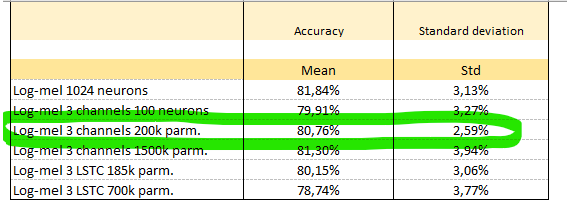


***
For the next steps, the fold 1 will be chosen as the validation set given it's presence in all selected classifiers.

* Fold 1 samples (validation): 2,968
* Training samples: 27,538 (24,784 training / 2,754 testing)
* Total:  30,506

***

## Conclusion presented in the final defense exam

#### Machile learning, ensemble methods and neural networks (ANN and CNN 1D).

Accuracy results of the k-fold cross-validation:

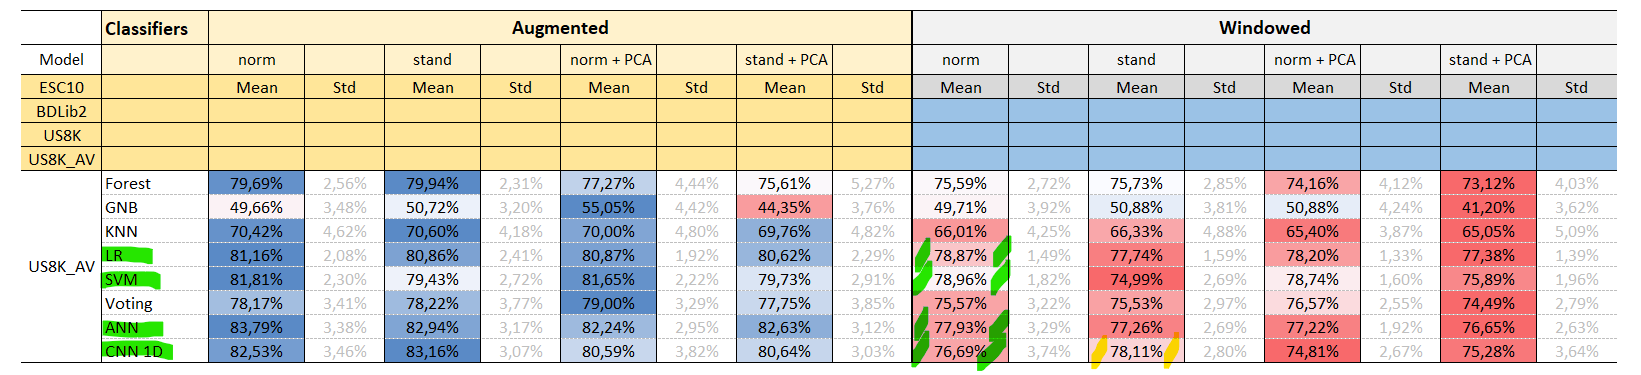

#### Neural network CNN 2D

Accuracy results of the k-fold cross-validation:

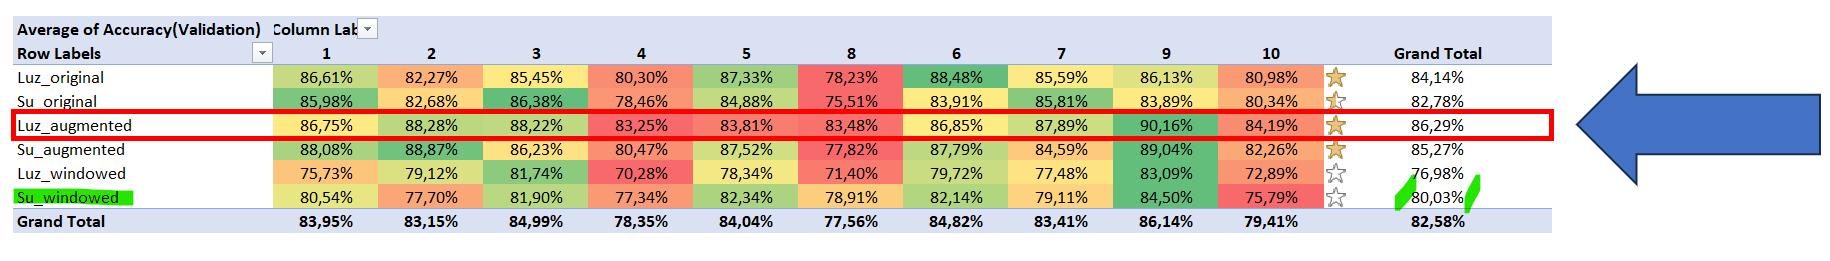

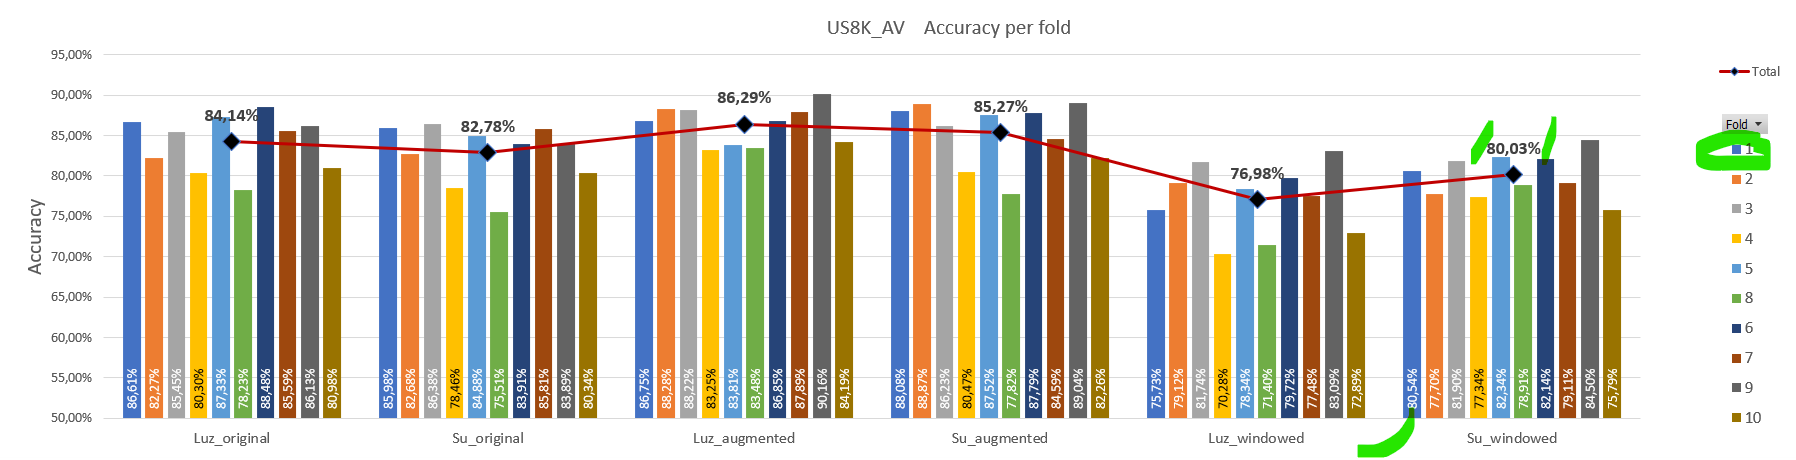

* Fold 1 samples (validation): 3,346
* Training samples: 31,010 (27,909 training / 3,101 testing)
* Total:  34,356

***

## Checking the results with the classifiers saved models (windowed model)

### SVC - Expected results for fold 1 validation: 80.42% 

### SVC - Expected results for fold 1 validation based on k-fold cross-validation: 80.22% 

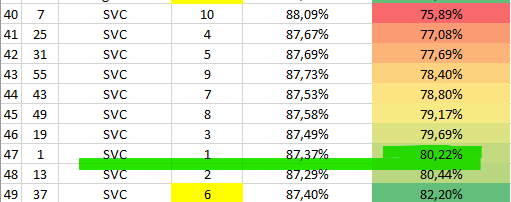

Images from the file: 04_ML_modeling.ipynb

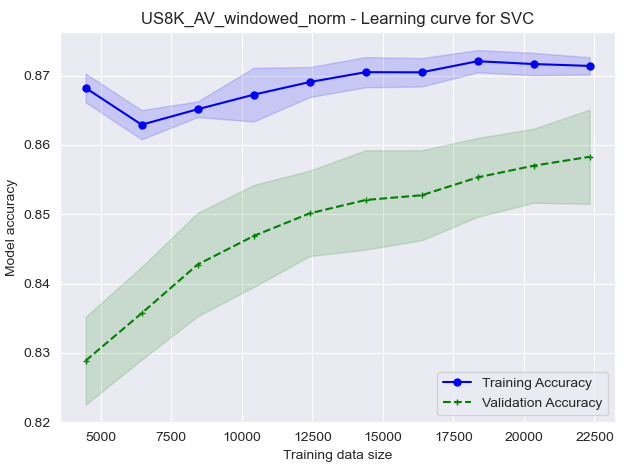

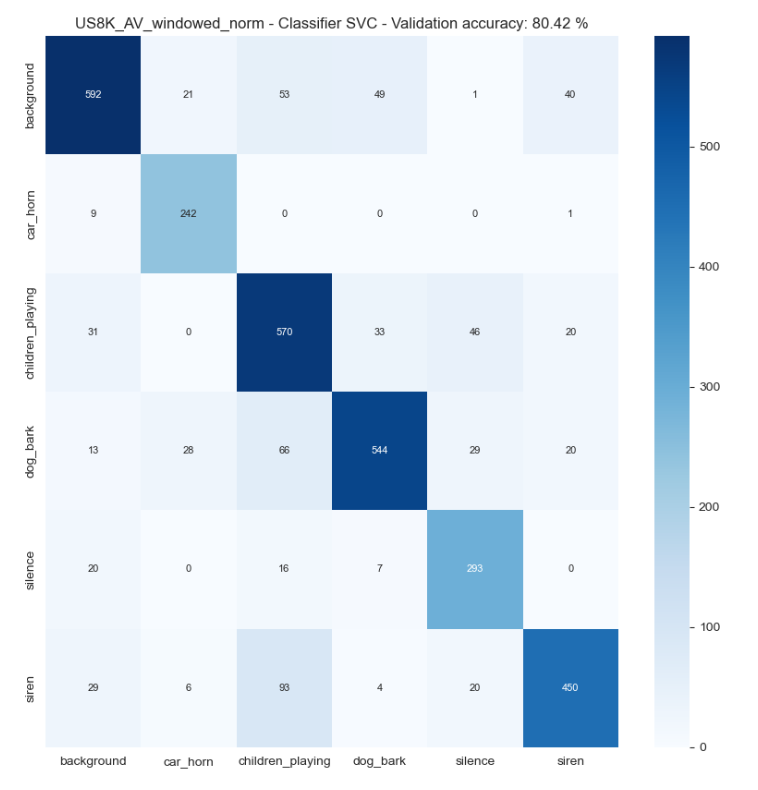

In [55]:
# Load the classifier from file

with open(os.path.join(path_modelsVal, 'Model_SVC_norm_windowed.pkl'), 'rb') as file:
    SVC_c_saved = pickle.load(file)

In [56]:
score_SVC_c_saved = SVC_c_saved.score(X_val_norm, y_val_cat)
print("Test score (R2): {0:.2f} %".format(100 * score_SVC_c_saved))

Test score (R2): 80.42 %


In [57]:
score_SVC_c_saved

0.8042438732815301

In [58]:
t_srt                   = time.perf_counter_ns()
SVC_c_saved_predict_val = SVC_c_saved.predict(X_val_norm)
t_end                   = time.perf_counter_ns()
proc_time               = ((t_end - t_srt) / 1000000)

print(SVC_c_saved_predict_val)
print(f'\nNumber of predicted samples..: {len(X_val_norm)}')
print(f'Total predicting time:.......: {proc_time}ms')

print(f'Predicting time per sample...: {round(proc_time/len(X_val_norm),6)}ms')

['dog_bark' 'dog_bark' 'dog_bark' ... 'background' 'background'
 'background']

Number of predicted samples..: 3346
Total predicting time:.......: 9463.7691ms
Predicting time per sample...: 2.828383ms


In [59]:
SVC_c_saved_val_class_report = metrics.classification_report(y_val_cat, 
                                                             SVC_c_saved_predict_val, 
                                                             target_names = nom_classes, 
                                                             output_dict = False)
print(SVC_c_saved_val_class_report)

                  precision    recall  f1-score   support

      background       0.85      0.78      0.82       756
        car_horn       0.81      0.96      0.88       252
children_playing       0.71      0.81      0.76       700
        dog_bark       0.85      0.78      0.81       700
         silence       0.75      0.87      0.81       336
           siren       0.85      0.75      0.79       602

        accuracy                           0.80      3346
       macro avg       0.81      0.83      0.81      3346
    weighted avg       0.81      0.80      0.80      3346



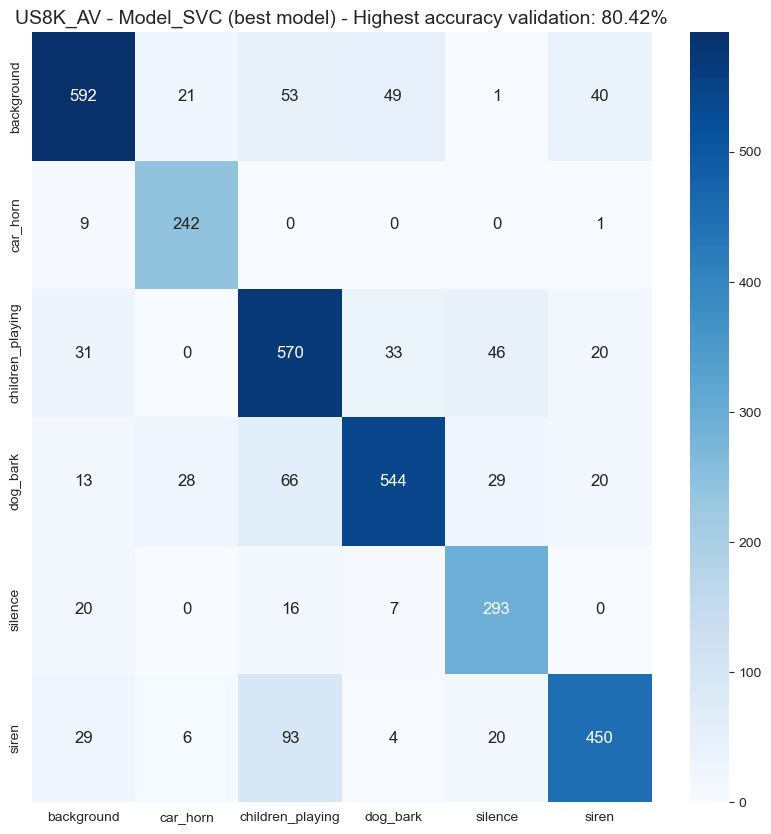

In [60]:
plot_confusion_matrix(y_val_cat, 
                      SVC_c_saved_predict_val, 
                      score_SVC_c_saved, 
                      cmap_cm, 
                      'Model_SVC_confusion_matrix',
                      ax = None,
                      savepic = True)

***

### LR - Expected results for fold 1 validation: 80.99% 

### LR - Expected results for fold 1 validation based on k-fold cross-validation: 81.23% 

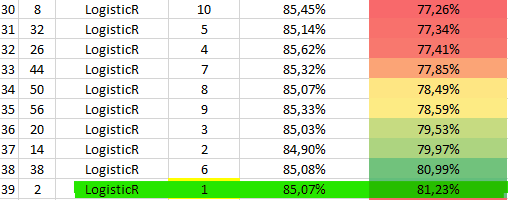

Images from the file: 04_ML_modeling.ipynb

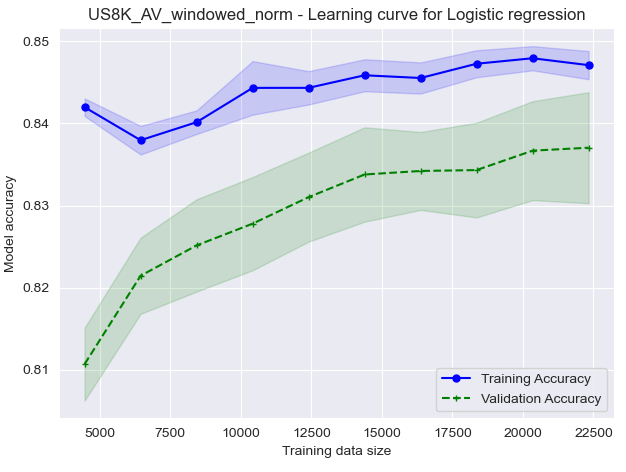

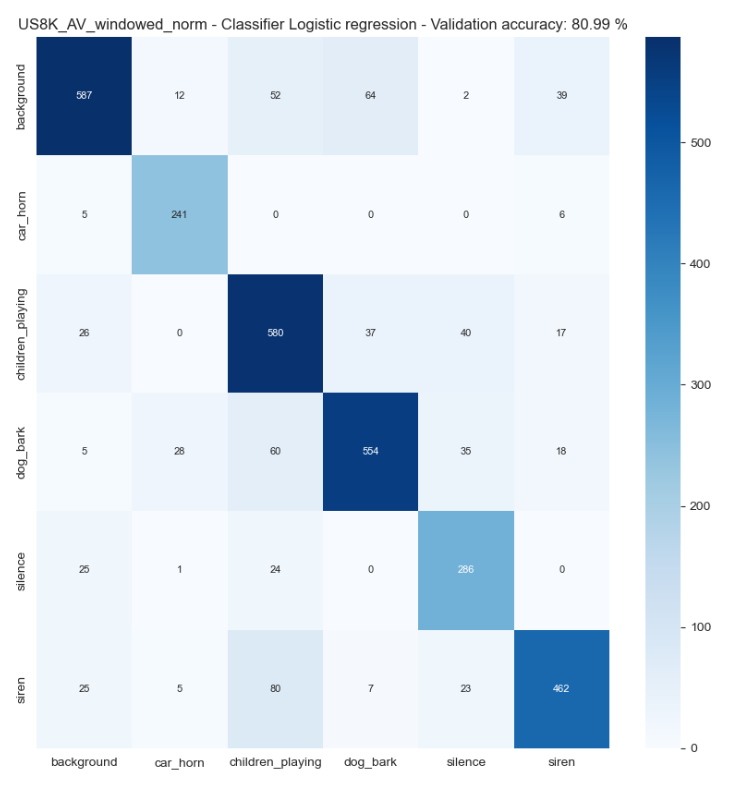

In [61]:
# Load the classifier from file

with open(os.path.join(path_modelsVal, 'Model_LogisticR_norm_windowed.pkl'), 'rb') as file:
    LR_c_saved = pickle.load(file)

In [62]:
score_LR_c_saved = LR_c_saved.score(X_val_norm, y_val_cat)
print("Test score (R2): {0:.2f} %".format(100 * score_LR_c_saved))

Test score (R2): 80.99 %


In [63]:
score_LR_c_saved

0.8099222952779438

In [64]:
t_srt                  = time.perf_counter_ns()
LR_c_saved_predict_val = LR_c_saved.predict(X_val_norm)
t_end                  = time.perf_counter_ns()
proc_time              = ((t_end - t_srt) / 1000000)

print(LR_c_saved_predict_val)
print(f'\nNumber of predicted samples..: {len(X_val_norm)}')
print(f'Total predicting time:.......: {proc_time}ms')

print(f'Predicting time per sample...: {round(proc_time/len(X_val_norm),6)}ms')

['dog_bark' 'dog_bark' 'dog_bark' ... 'background' 'background'
 'background']

Number of predicted samples..: 3346
Total predicting time:.......: 4.7358ms
Predicting time per sample...: 0.001415ms


In [65]:
for i in LR_c_saved_predict_val:
    print(i)

dog_bark
dog_bark
dog_bark
silence
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
silence
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
silence
dog_bark
silence
background
children_playing
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
children_playing
children_playing
dog_bark
children_playing
children_playing
dog_bark
children_playing
children_playing
dog_bark
silence
dog_bark
dog_bark
children_playing
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
backgr

In [66]:
LR_c_saved_val_class_report = metrics.classification_report(y_val_cat, 
                                                            LR_c_saved_predict_val, 
                                                            target_names = nom_classes, 
                                                            output_dict = False)
print(LR_c_saved_val_class_report)

                  precision    recall  f1-score   support

      background       0.87      0.78      0.82       756
        car_horn       0.84      0.96      0.89       252
children_playing       0.73      0.83      0.78       700
        dog_bark       0.84      0.79      0.81       700
         silence       0.74      0.85      0.79       336
           siren       0.85      0.77      0.81       602

        accuracy                           0.81      3346
       macro avg       0.81      0.83      0.82      3346
    weighted avg       0.82      0.81      0.81      3346



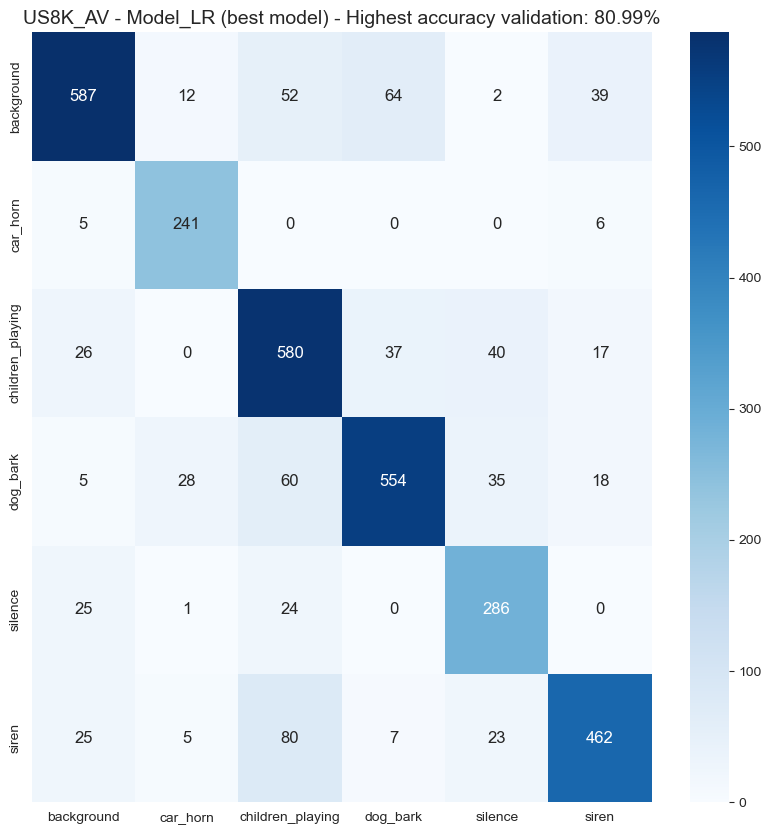

In [67]:
plot_confusion_matrix(y_val_cat, 
                      LR_c_saved_predict_val, 
                      score_LR_c_saved, 
                      cmap_cm, 
                      'Model_LR_confusion_matrix',
                      ax = None,
                      savepic = True)

***

### RF - Expected results for fold 1 validation: 80.04% 

### RF - Expected results for fold 1 validation based on k-fold cross-validation: 79.83% 

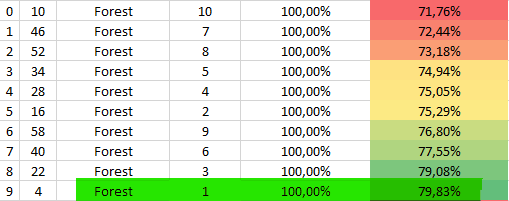

Images from the file: 04_ML_modeling.ipynb

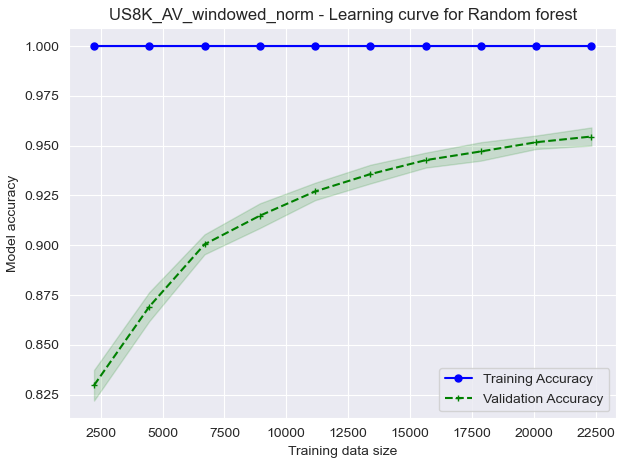

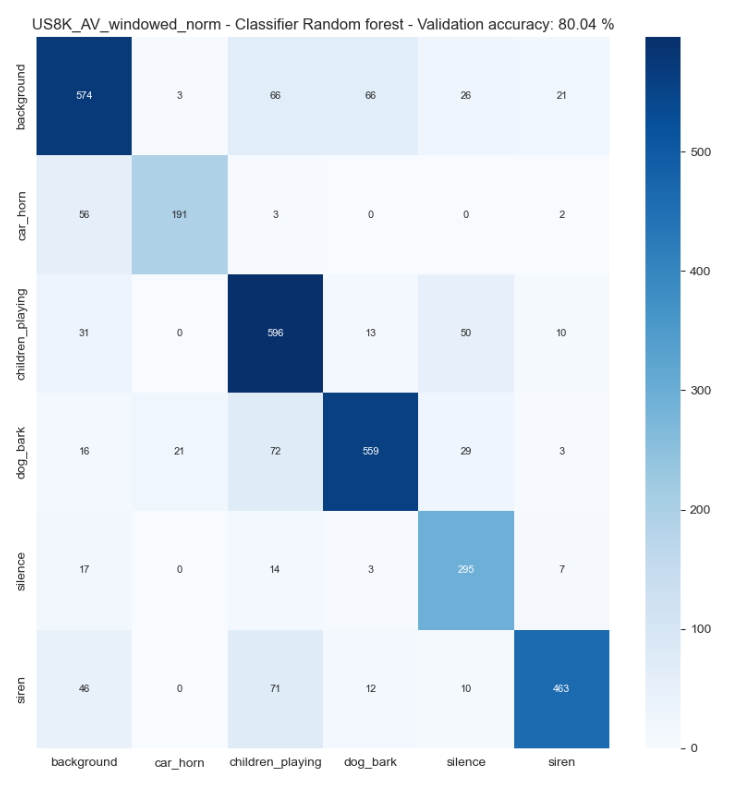

In [68]:
# Load the classifier from file

with open(os.path.join(path_modelsVal,  'Model_Forest_norm_windowed.pkl'), 'rb') as file:
    RF_c_saved = pickle.load(file)

In [69]:
score_RF_c_saved = RF_c_saved.score(X_val_norm, y_val_cat)
print("Test score (R2): {0:.2f} %".format(100 * score_RF_c_saved))

Test score (R2): 80.04 %


In [70]:
score_RF_c_saved

0.8003586371787209

In [71]:
t_srt                  = time.perf_counter_ns()
RF_c_saved_predict_val = RF_c_saved.predict(X_val_norm)
t_end                  = time.perf_counter_ns()
proc_time              = ((t_end - t_srt) / 1000000)

print(RF_c_saved_predict_val)
print(f'\nNumber of predicted samples..: {len(X_val_norm)}')
print(f'Total predicting time:.......: {proc_time}ms')

print(f'Predicting time per sample...: {round(proc_time/len(X_val_norm),6)}ms')

['dog_bark' 'dog_bark' 'dog_bark' ... 'siren' 'siren' 'siren']

Number of predicted samples..: 3346
Total predicting time:.......: 267.7559ms
Predicting time per sample...: 0.080023ms


In [72]:
RF_c_saved_val_class_report = metrics.classification_report(y_val_cat, 
                                                            RF_c_saved_predict_val, 
                                                            target_names = nom_classes, 
                                                            output_dict = False)
print(RF_c_saved_val_class_report)

                  precision    recall  f1-score   support

      background       0.78      0.76      0.77       756
        car_horn       0.89      0.76      0.82       252
children_playing       0.73      0.85      0.78       700
        dog_bark       0.86      0.80      0.83       700
         silence       0.72      0.88      0.79       336
           siren       0.92      0.77      0.84       602

        accuracy                           0.80      3346
       macro avg       0.81      0.80      0.80      3346
    weighted avg       0.81      0.80      0.80      3346



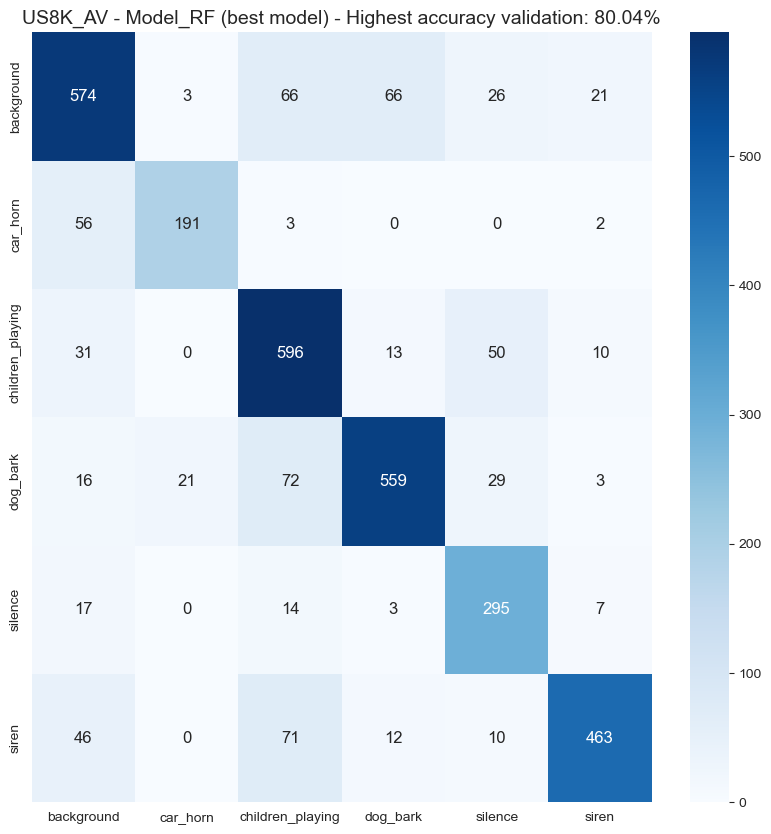

In [73]:
plot_confusion_matrix(y_val_cat, 
                      RF_c_saved_predict_val, 
                      score_RF_c_saved, 
                      cmap_cm, 
                      'Model_RF_confusion_matrix',
                      ax = None,
                      savepic = True)

***

### MLP - Expected results for fold 1 validation: 78.24% 

### MLP - Expected results for fold 1 validation based on k-fold cross-validation: 77.32% 

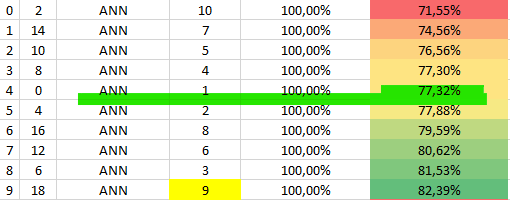

Images from the file: 04_ML_modeling.ipynb

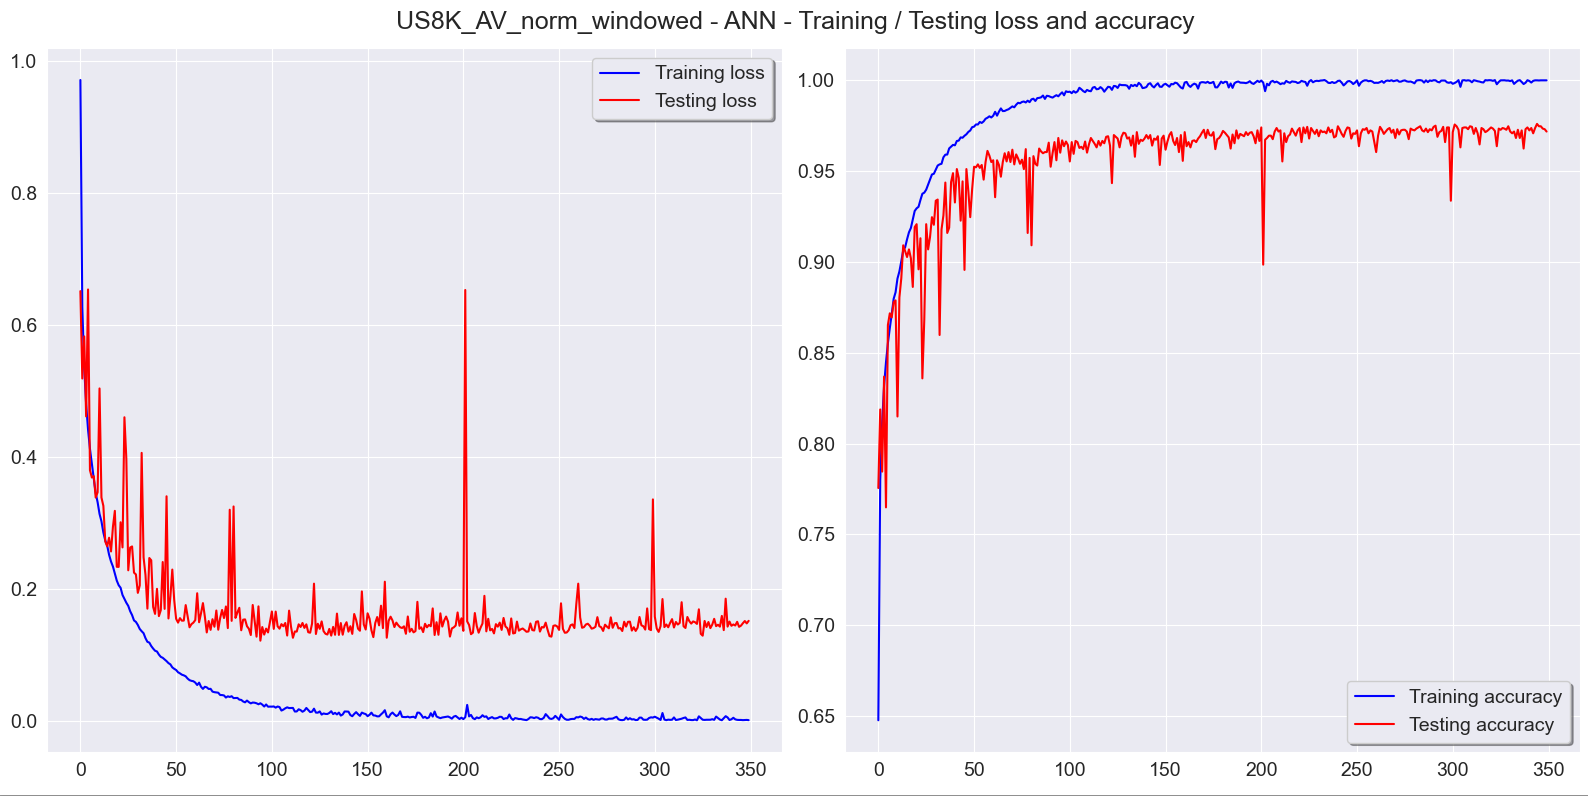

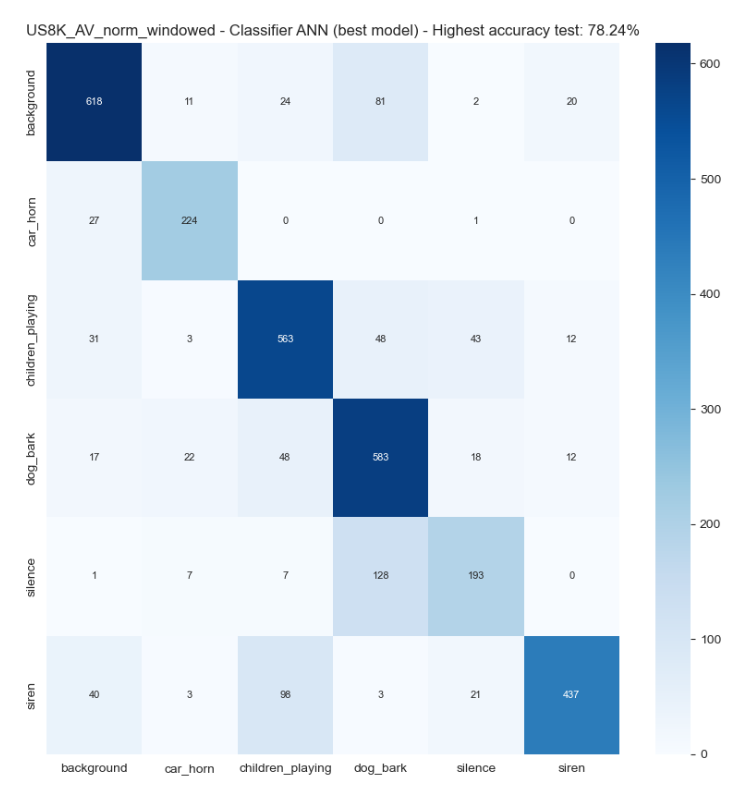

In [74]:
# Load the model with the highest accuracy

model_ANN_saved = load_model(os.path.join(path_modelsVal,  'Model_ANN_weights_0_best_norm_windowed.hdf5'))
model_ANN_saved.summary()

Model: "ANN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 375)               141000    
_________________________________________________________________
Hiden_1 (Dense)              (None, 375)               141000    
_________________________________________________________________
Dropout_1 (Dropout)          (None, 375)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               282000    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 568,506
Trainable params: 568,506
Non-trainable params: 0
_______________________________________________________

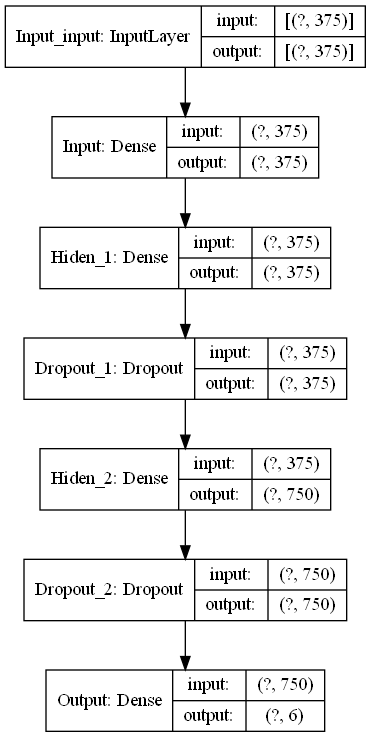

In [75]:
tf.keras.utils.plot_model(model_ANN_saved,  show_shapes=True)

In [76]:
score_ANN_saved = model_ANN_saved.evaluate(X_val_norm, y_OHEV_val, verbose=1, batch_size = 32)
print('Test loss:', score_ANN_saved[0])
print('Test accuracy:', score_ANN_saved[1])

105/105 [==============================] - 0s 3ms/step - loss: 2.9545 - accuracy: 0.7824
Test loss: 2.9545063972473145
Test accuracy: 0.7824267745018005


In [77]:
score_ANN_saved[1]

0.7824267745018005

In [78]:
t_srt            = time.perf_counter_ns()
y_pred_ANN_saved = np.argmax(model_ANN_saved.predict(X_val_norm),axis=1)
t_end            = time.perf_counter_ns()
proc_time        = ((t_end - t_srt) / 1000000)

print(y_pred_ANN_saved)
print(f'\nNumber of predicted samples..: {len(X_val_norm)}')
print(f'Total predicting time:.......: {proc_time}ms')

print(f'Predicting time per sample...: {round(proc_time/len(X_val_norm),6)}ms')

[3 3 3 ... 1 1 1]

Number of predicted samples..: 3346
Total predicting time:.......: 239.7218ms
Predicting time per sample...: 0.071644ms


In [79]:
y_test_enc = np.argmax(y_OHEV_val, axis=1)
y_test_enc

array([3, 3, 3, ..., 4, 4, 4], dtype=int64)

In [80]:
metrics_set_ANN = classification_report(y_test_enc, y_pred_ANN_saved, target_names=nom_classes)
print(metrics_set_ANN)

                  precision    recall  f1-score   support

      background       0.84      0.82      0.83       756
        car_horn       0.83      0.89      0.86       252
children_playing       0.76      0.80      0.78       700
        dog_bark       0.69      0.83      0.76       700
         silence       0.69      0.57      0.63       336
           siren       0.91      0.73      0.81       602

        accuracy                           0.78      3346
       macro avg       0.79      0.77      0.78      3346
    weighted avg       0.79      0.78      0.78      3346



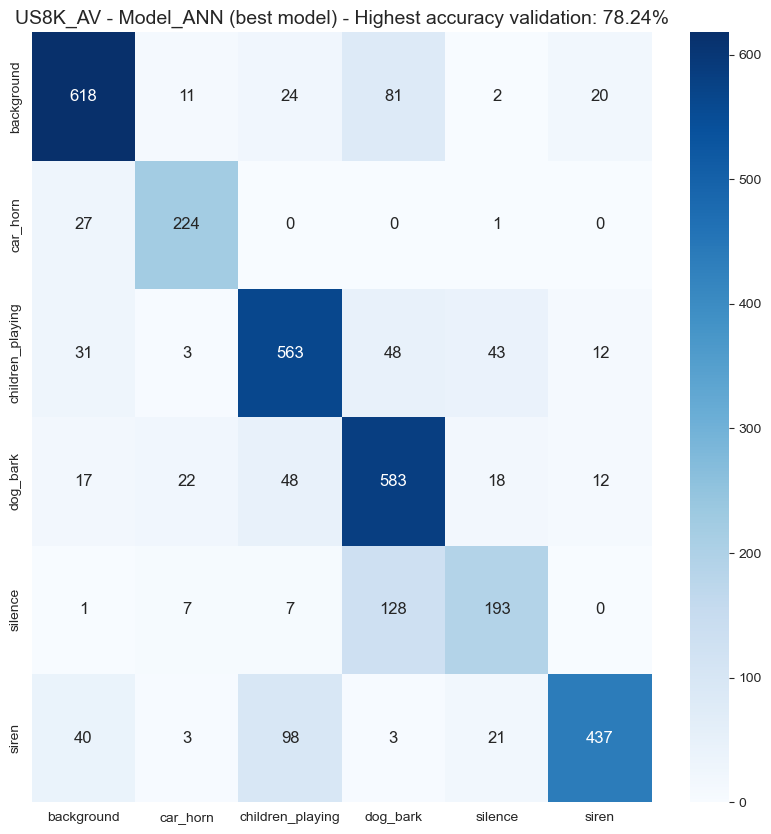

In [81]:
plot_confusion_matrix(y_test_enc, 
                      y_pred_ANN_saved, 
                      score_ANN_saved, 
                      cmap_cm, 
                      'Model_ANN_confusion_matrix',
                      ax = None,
                      savepic = True)

***

### CNN 1D - Expected results for fold 1 validation: 77.08% 

### CNN 1D - Expected results for fold 1 validation based on k-fold cross-validation: 79.17% 

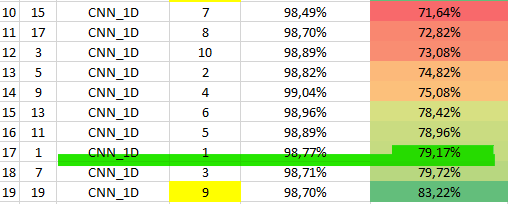

Images from the file: 04_ML_modeling.ipynb

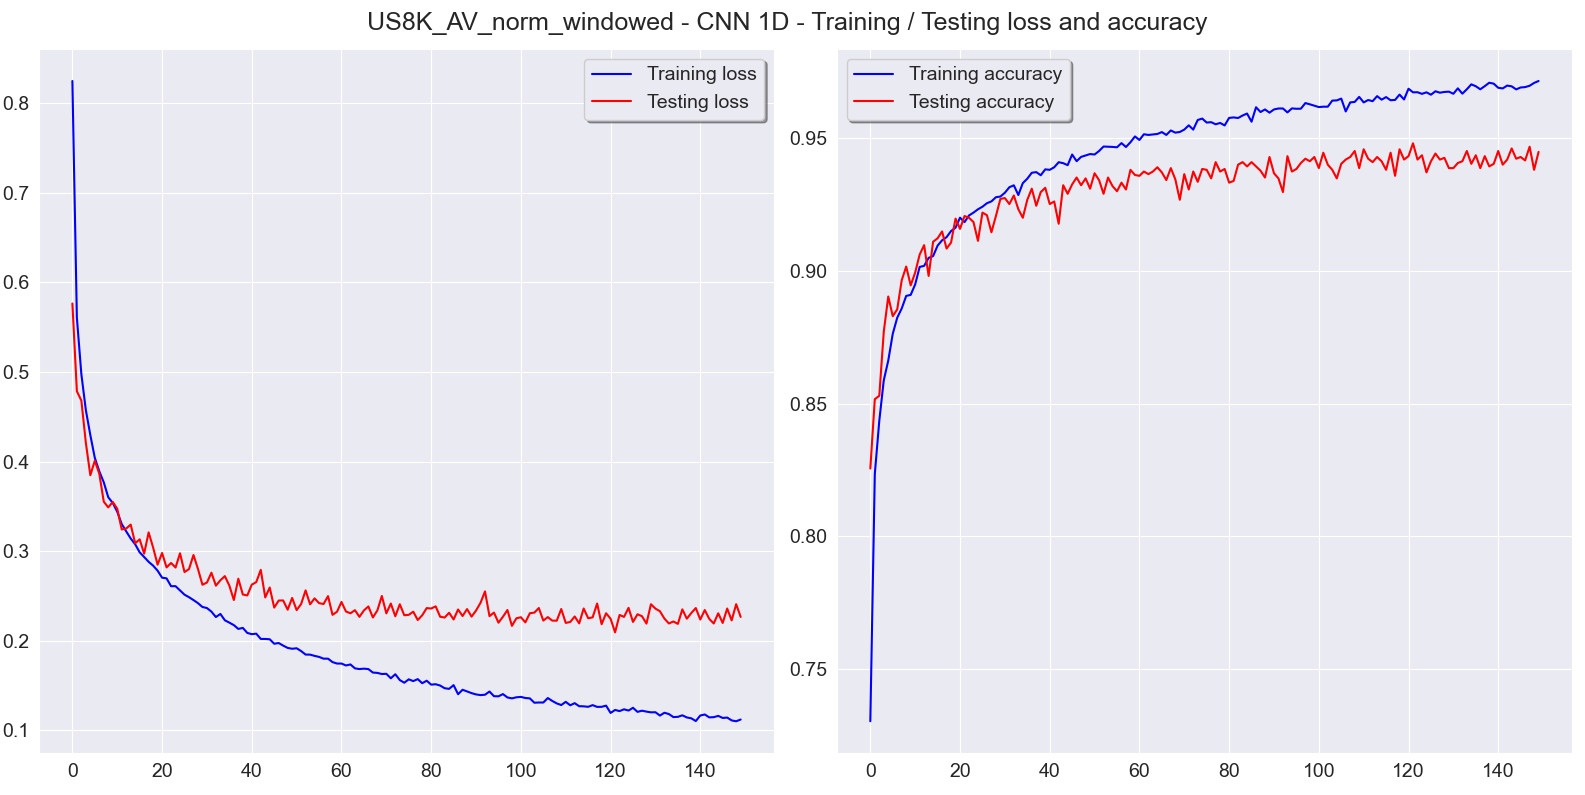

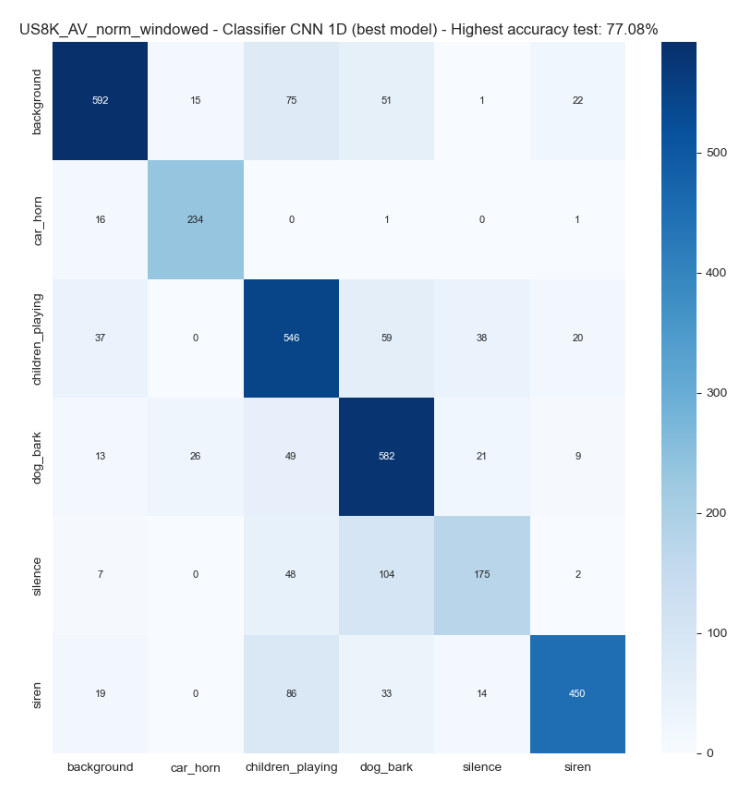

In [82]:
# Load the model with the highest accuracy

model_CNN_1D_saved = load_model(os.path.join(path_modelsVal, 'Model_CNN_1D_weights_0_best_norm_windowed.hdf5'))
model_CNN_1D_saved.summary()

Model: "CNN_1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 369, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 369, 34)           4794      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 369, 56)           5768      
_________________________________________________________________
MaxPool1D_3 (MaxPooling1D)   (None, 184, 56)           0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 184, 56)           0         
_________________________________________________________________
flatten (Flatten)            (None, 10304)             0         
_________________________________________________________________
Dense (Dense)                (None, 50)                51525

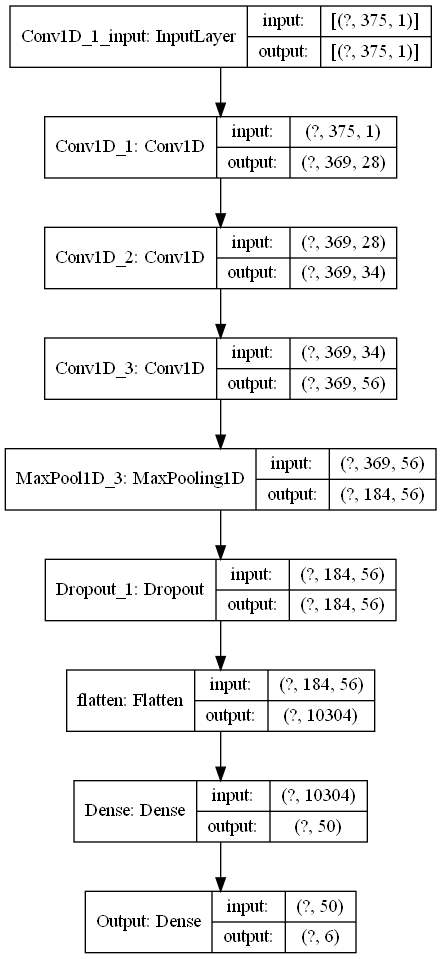

In [83]:
tf.keras.utils.plot_model(model_CNN_1D_saved,  show_shapes=True)

In [84]:
score_CNN_1D_saved = model_CNN_1D_saved.evaluate(X_val_norm[..., np.newaxis], y_OHEV_val, verbose=1, batch_size = 32)
print('Test loss:', score_CNN_1D_saved[0])
print('Test accuracy:', score_CNN_1D_saved[1])

105/105 [==============================] - 0s 3ms/step - loss: 1.6422 - accuracy: 0.7708
Test loss: 1.6421911716461182
Test accuracy: 0.7707710862159729


In [85]:
score_CNN_1D_saved[1]

0.7707710862159729

In [86]:
y_pred_CNN_1D_saved = np.argmax(model_CNN_1D_saved.predict(X_val_norm[..., np.newaxis]),axis=1)
y_pred_CNN_1D_saved

array([3, 3, 3, ..., 5, 0, 0], dtype=int64)

In [87]:
t_srt               = time.perf_counter_ns()
y_pred_CNN_1D_saved = np.argmax(model_CNN_1D_saved.predict(X_val_norm[..., np.newaxis]),axis=1)
t_end               = time.perf_counter_ns()
proc_time           = ((t_end - t_srt) / 1000000)

print(y_pred_CNN_1D_saved)
print(f'\nNumber of predicted samples..: {len(X_val_norm)}')
print(f'Total predicting time:.......: {proc_time}ms')

print(f'Predicting time per sample...: {round(proc_time/len(X_val_norm),6)}ms')

[3 3 3 ... 5 0 0]

Number of predicted samples..: 3346
Total predicting time:.......: 168.4667ms
Predicting time per sample...: 0.050349ms


In [88]:
y_test_enc = np.argmax(y_OHEV_val, axis=1)
y_test_enc

array([3, 3, 3, ..., 4, 4, 4], dtype=int64)

In [89]:
metrics_set_CNN_1D_saved = classification_report(y_test_enc, y_pred_CNN_1D_saved, target_names=nom_classes)
print(metrics_set_CNN_1D_saved)

                  precision    recall  f1-score   support

      background       0.87      0.78      0.82       756
        car_horn       0.85      0.93      0.89       252
children_playing       0.68      0.78      0.73       700
        dog_bark       0.70      0.83      0.76       700
         silence       0.70      0.52      0.60       336
           siren       0.89      0.75      0.81       602

        accuracy                           0.77      3346
       macro avg       0.78      0.77      0.77      3346
    weighted avg       0.78      0.77      0.77      3346



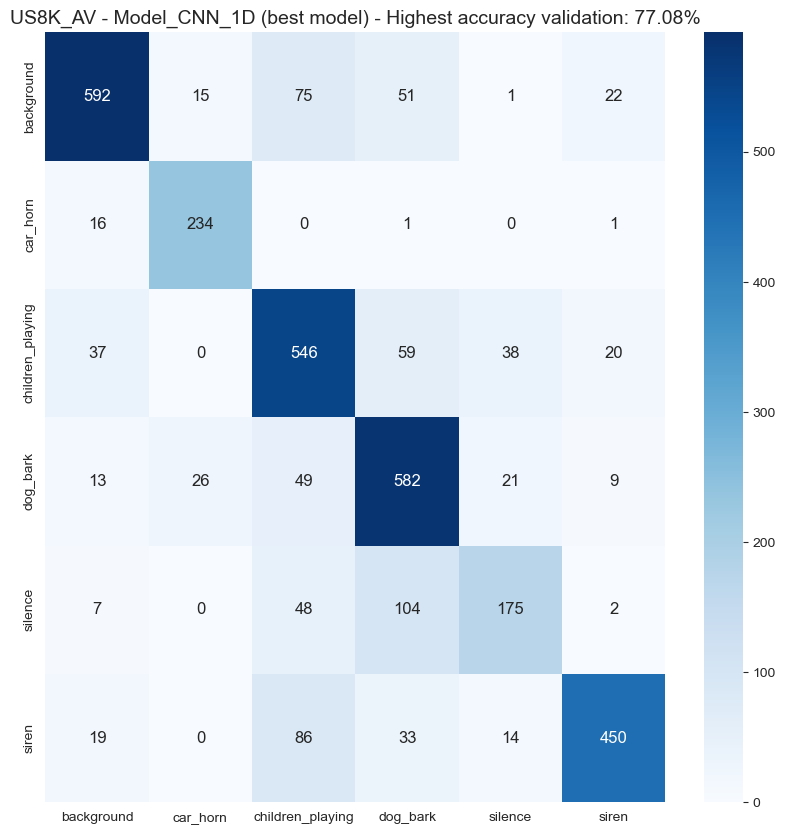

In [90]:
plot_confusion_matrix(y_test_enc, 
                      y_pred_CNN_1D_saved, 
                      score_CNN_1D_saved, 
                      cmap_cm, 
                      'Model_CNN_1D_confusion_matrix',
                      ax = None,
                      savepic = True)

***

### CNN 2D - Expected results for fold 1 validation: 81.71% 

### CNN 2D - Expected results for fold 1 validation based on k-fold cross-validation: 80.54% 

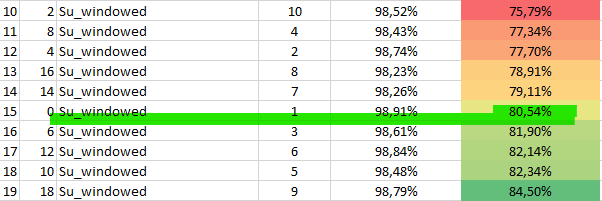

Images from the file: 09_CNN_2D.ipynb

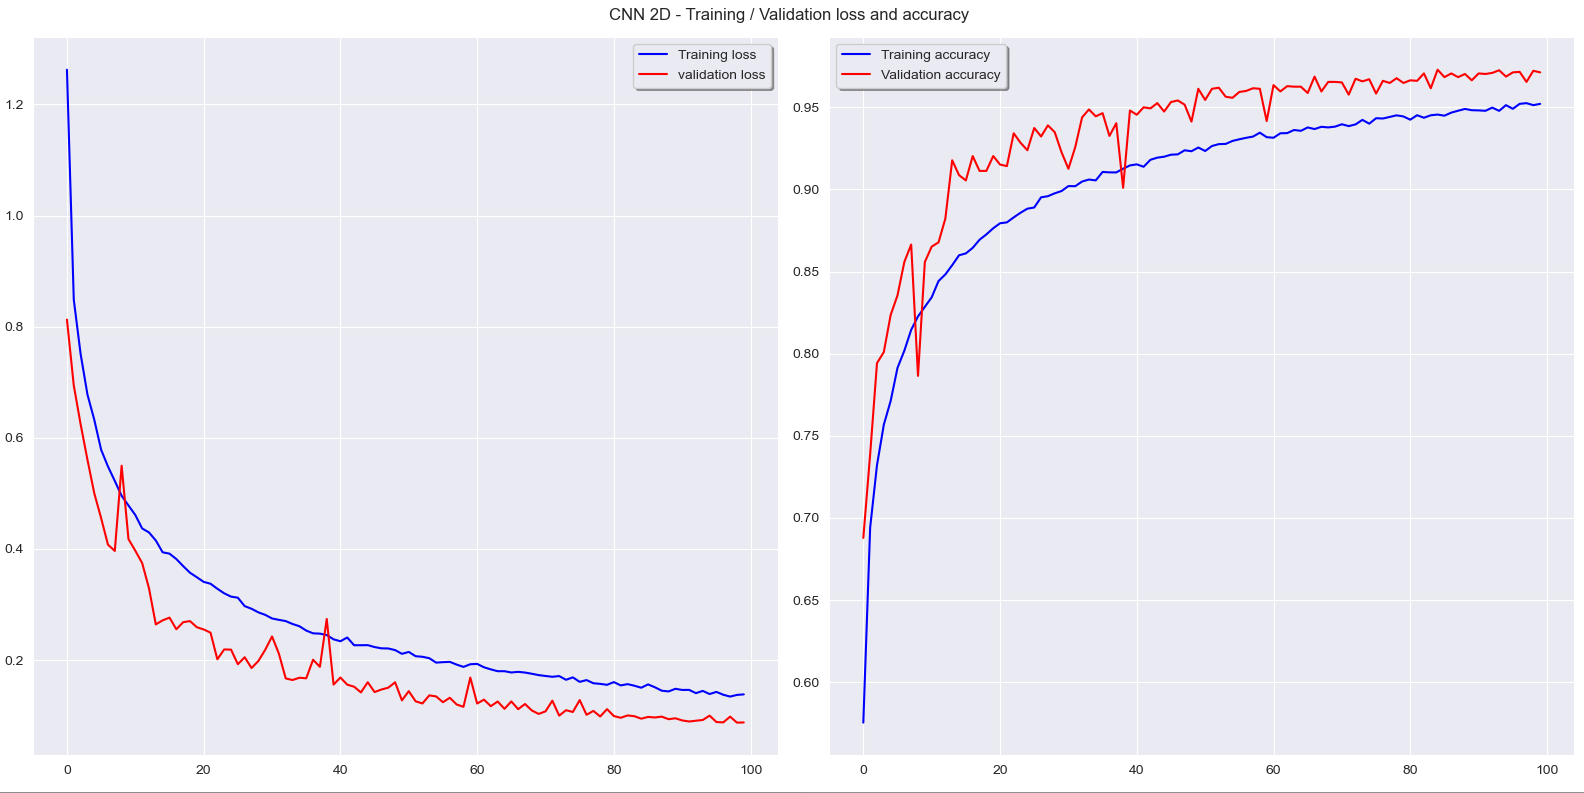

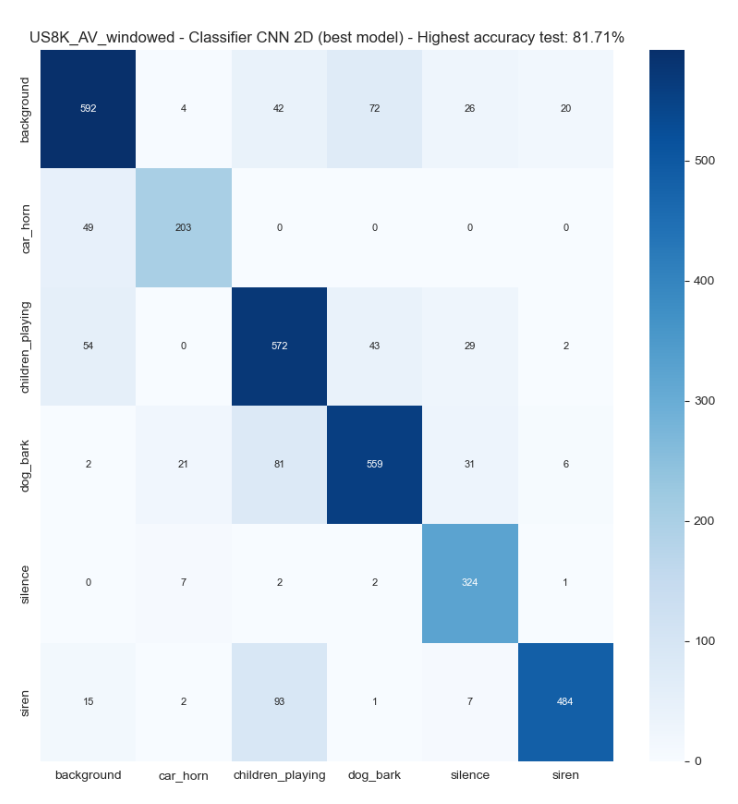

In [91]:
# Load the model with the highest accuracy

model_CNN_2D_saved = load_model(os.path.join(path_modelsVal,  'Model_CNN_2D_weights_0_best_windowed.hdf5'))
model_CNN_2D_saved.summary()

Model: "Model_CNN_2D_Su"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 90, 22, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 90, 22, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 10, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 44, 10, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 5, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 5, 32)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 5, 64)     

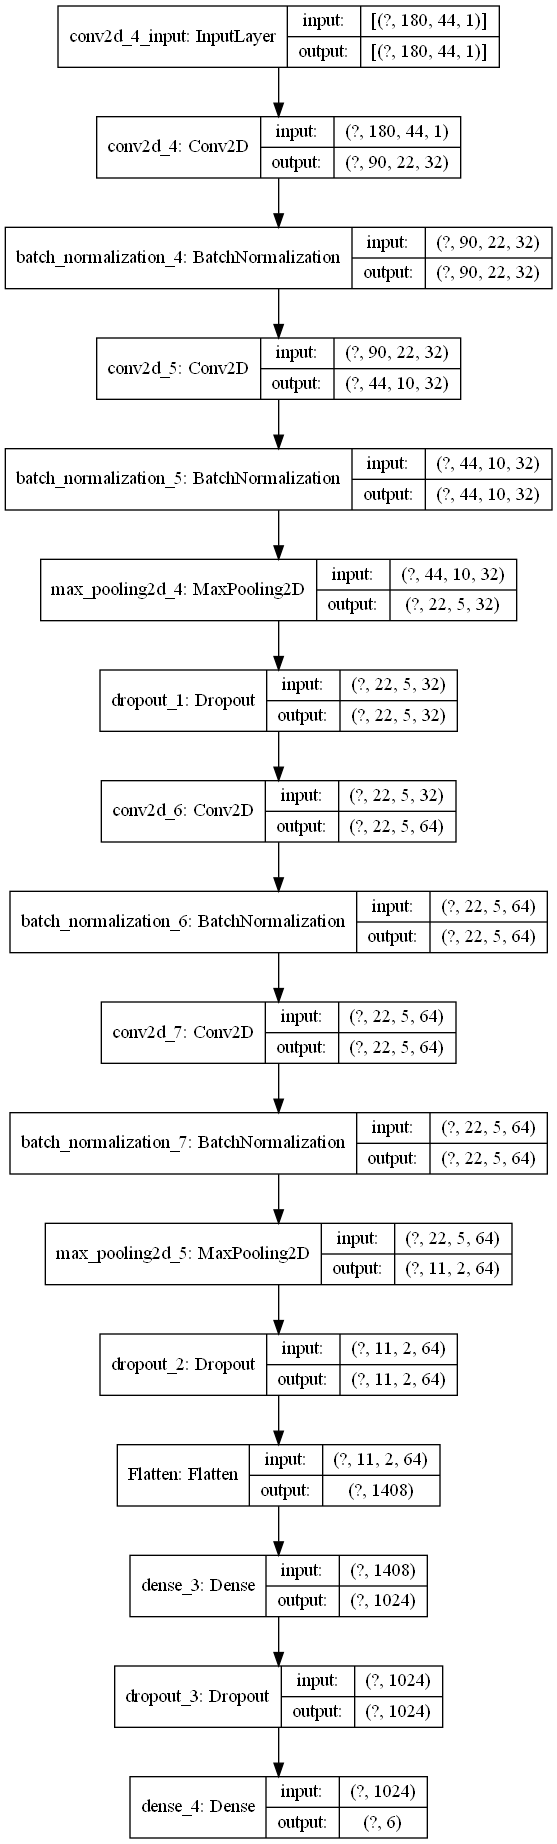

In [92]:
tf.keras.utils.plot_model(model_CNN_2D_saved,  show_shapes=True)

In [93]:
score_CNN_2D_saved = model_CNN_2D_saved.evaluate(X_val_CNN2D, y_val_CNN2D, verbose=1, batch_size = 32)
print('Test loss:', score_CNN_2D_saved[0])
print('Test accuracy:', score_CNN_2D_saved[1])

105/105 [==============================] - 1s 5ms/step - loss: 0.8453 - accuracy: 0.8171
Test loss: 0.8452975749969482
Test accuracy: 0.8170950412750244


In [94]:
score_CNN_2D_saved[1]

0.8170950412750244

In [95]:
t_srt               = time.perf_counter_ns()
y_pred_CNN_2D_saved = np.argmax(model_CNN_2D_saved.predict(X_val_CNN2D),axis=1)
t_end               = time.perf_counter_ns()
proc_time           = ((t_end - t_srt) / 1000000)

print(y_pred_CNN_2D_saved)
print(f'\nNumber of predicted samples..: {len(X_val_CNN2D)}')
print(f'Total predicting time:.......: {proc_time}ms')

print(f'Predicting time per sample...: {round(proc_time/len(X_val_CNN2D),6)}ms')

[3 3 3 ... 1 1 1]

Number of predicted samples..: 3346
Total predicting time:.......: 348.2596ms
Predicting time per sample...: 0.104082ms


In [96]:
y_test_enc = np.argmax(y_val_CNN2D, axis=1)
y_test_enc

array([3, 3, 3, ..., 4, 4, 4], dtype=int64)

In [97]:
metrics_set_CNN_2D_saved = classification_report(y_test_enc, y_pred_CNN_2D_saved, target_names=nom_classes)
print(metrics_set_CNN_2D_saved)

                  precision    recall  f1-score   support

      background       0.83      0.78      0.81       756
        car_horn       0.86      0.81      0.83       252
children_playing       0.72      0.82      0.77       700
        dog_bark       0.83      0.80      0.81       700
         silence       0.78      0.96      0.86       336
           siren       0.94      0.80      0.87       602

        accuracy                           0.82      3346
       macro avg       0.83      0.83      0.82      3346
    weighted avg       0.82      0.82      0.82      3346



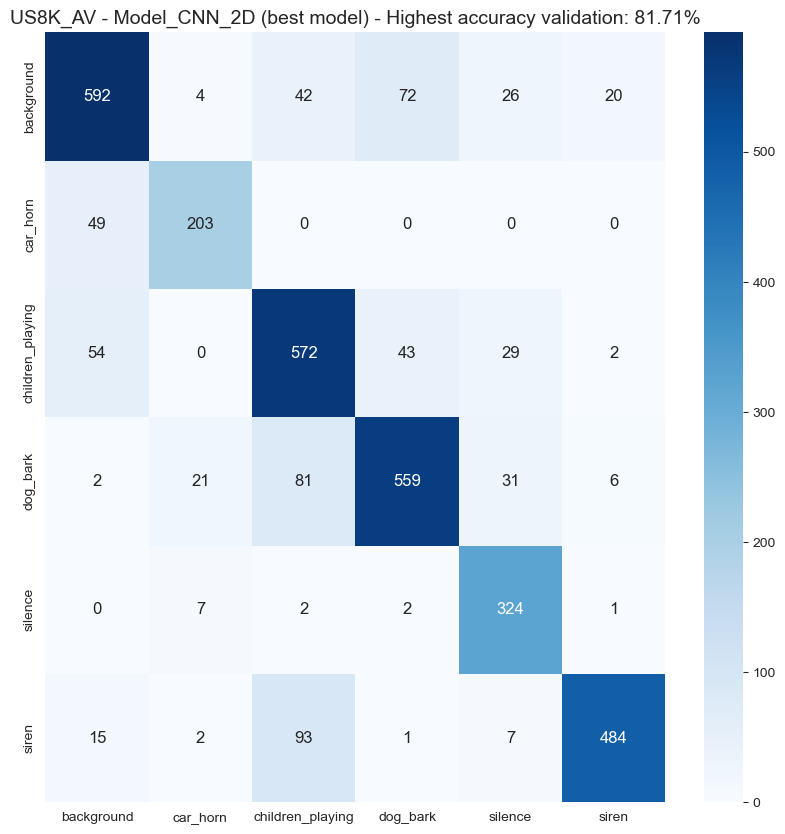

In [99]:
plot_confusion_matrix(y_test_enc, 
                      y_pred_CNN_2D_saved, 
                      score_CNN_2D_saved, 
                      cmap_cm, 
                      'Model_CNN_2D_confusion_matrix',
                      ax = None,
                      savepic = True)

***

### Feature extraction evaluation on the validation set

Select the original audio for the validation set

In [100]:
val_audioW = np.array(DB_aug_from_pkl_VAL.Audio.to_list())
val_audioW.shape

(3346, 22016)

In [101]:
val_audio = np.array(DB_ori_from_pkl_VAL.Audio.to_list())
val_audio

array([[ 6.40211074e-05,  8.26949836e-05,  5.21230577e-05, ...,
        -9.90534551e-04, -1.04527897e-03, -1.12278771e-03],
       [-1.63099641e-04, -1.47700383e-04, -1.09524306e-04, ...,
         8.95090925e-04,  1.02632504e-03,  1.10134820e-03],
       [ 2.32642919e-01,  3.51767898e-01,  2.96772093e-01, ...,
         1.11169368e-01,  8.34129453e-02,  5.04262894e-02],
       ...,
       [-4.24975455e-02, -6.46661744e-02, -5.70580289e-02, ...,
         3.72168142e-03,  3.44587583e-03,  4.22332343e-03],
       [ 2.85713468e-03,  3.98859056e-03,  3.28775542e-03, ...,
        -7.79237540e-04, -7.33654597e-04, -8.12655722e-04],
       [-6.16295205e-04, -8.93199060e-04, -8.59586929e-04, ...,
         3.40836123e-04,  3.41486360e-04,  3.47480876e-04]], dtype=float32)

In [102]:
val_audio.shape

(478, 88200)

In [103]:
y_val_audio_cat = np.array(DB_ori_from_pkl_VAL.Class_categorical.to_list())
y_val_audio_cat

array(['dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'background', 'background',
       'background', 'background', 'background', 'background',
       'background', 'background', 'background', 'background',
       'background', 'background', 'background', 'background',
       'background', 'background', 'background', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'siren', 'siren', 'siren', 'siren',
       'background', 'background', 'background', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'background', 'background', 'background',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'siren', 'siren', 'siren'

In [104]:
y_val_audio_cat.shape

(478,)

In [105]:
y_val_audio_cat[1]

'dog_bark'

In [106]:
y_val_audio = np.array(DB_ori_from_pkl_VAL.Class_OHEV.to_list())
y_val_audio

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])

In [107]:
y_val_audio.shape

(478, 6)

In [108]:
ipd.Audio(val_audio[0], rate = SR)

### Apply the windowing technique on each audio

Import the class to window and extract the features of the audio data

In [109]:
# Retrieve the X_min and X_max used for normalizing the training set

X_min = np.genfromtxt(os.path.join(path_arrays,  'X_train_min.csv'), delimiter=',', dtype = 'float32')
X_max = np.genfromtxt(os.path.join(path_arrays,  'X_train_max.csv'), delimiter=',', dtype = 'float32')

In [110]:
from MT_audioPPFE_ML import audioPPFE_ML

In [111]:
def feature_extractor(audioList: list, mutual: bool):
    
    # Start the time
    tExt_srt        = time.perf_counter_ns()

    # Call the class to window and extract the ML features
    PPFE_ML         = audioPPFE_ML(audioList, CNN2D = False, time_length = 4)
    audio_windowed  = np.array(PPFE_ML.audio_windowed)
    audio_features  = np.array(PPFE_ML.features_array)

    # Replace NaN values by 0
    audio_features[np.isnan(audio_features)] = 0
    
    if mutual:
        # Keep original data NEITHER normalized NOR standardized
        audio_features_norm = audio_features
    
    else:
        # Normalize the validation set using the min and max from training
        audio_features_norm = (audio_features - X_min) / (X_max - X_min)
        
    # Stop the timer and compute the extracting time
    tExt_end            = time.perf_counter_ns()
    extract_time        = ((tExt_end - tExt_srt) / 1000000)

    print(f'\nNumber of samples for extraction..: {len(audio_windowed)}')
    print(f'Total extracting time:............: {extract_time:.4f}ms')

    print(f'Extracting time per sample........: {(extract_time/len(audio_windowed)):.4f}ms')
    
    return audio_windowed, audio_features_norm

In [112]:
val_audio_windowed, val_audio_features = feature_extractor(val_audio[0:1], mutual = False)


Number of samples for extraction..: 7
Total extracting time:............: 7742.7236ms
Extracting time per sample........: 1106.1034ms


In [113]:
val_audio_windowed.shape

(7, 22016)

In [114]:
val_audio_features.shape

(7, 375)

In [115]:
def logMel_extractor(audioList: list):
    
    # Start the time
    tExt_srt        = time.perf_counter_ns()

    # Call the class to window and extract the ML features
    PPFE_ML             = audioPPFE_ML(audioList, CNN2D = True, time_length = 4)
    audio_windowed      = np.array(PPFE_ML.audio_windowed)
    audio_features_agg  = np.array(PPFE_ML.features_agg).astype(np.float32)
    
    # Stop the timer and compute the extracting time
    tExt_end            = time.perf_counter_ns()
    extract_time        = ((tExt_end - tExt_srt) / 1000000)

    print(f'\nNumber of samples for extraction..: {len(audio_windowed)}')
    print(f'Total extracting time:............: {extract_time:.4f}ms')

    print(f'Extracting time per sample........: {(extract_time/len(audio_windowed)):.4f}ms')
    
    return audio_windowed, audio_features_agg

In [116]:
val_audio_windowedCNN2D, val_audio_featuresCNN2D = logMel_extractor(val_audio[0:1])


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 63.5830ms
Extracting time per sample........: 9.0833ms


In [117]:
val_audio_windowedCNN2D.shape

(7, 22016)

In [118]:
val_audio_featuresCNN2D.shape

(7, 180, 44, 1)

In [119]:
def predicSample(classifier: str, samples: list, samplesNr: int):
    
    predict_audioClip = []
    predict_audio     = []

    j = 1
    
    mutual = False

    for i in range(samplesNr):
        print(f'\n=========================================================================')
        print(f'\nSample...: {i}')

        # SVC - Support Vector Classifer
        if classifier   == 'SVC':
            # Window and extract the features, apply X_min and X_max used for normalizing the training set
            audio_windowed, audio_features = feature_extractor(samples[i:j], mutual = False)
            
            # Perform the prediction
            predict_val = SVC_c_saved.predict(audio_features)
            print()
            for predict in predict_val:
                print(predict)           
            counter = Counter(predict_val)
            predict_audio.append(counter.most_common(1)[0][0])        
            print(f'\nAudio is most likely...: {counter.most_common(1)[0][0]}')
            print(f'Ground truth is........: {y_val_audio_cat[i]}')            

            
        # LR - Logistic Regression
        if classifier   == 'LR':
            # Window and extract the features, apply X_min and X_max used for normalizing the training set
            audio_windowed, audio_features = feature_extractor(samples[i:j], mutual = False)
            
            # Perform the prediction
            predict_val = LR_c_saved.predict(audio_features)
            print()
            for predict in predict_val:
                print(predict)           
            counter = Counter(predict_val)
            predict_audio.append(counter.most_common(1)[0][0])        
            print(f'\nAudio is most likely...: {counter.most_common(1)[0][0]}')
            print(f'Ground truth is........: {y_val_audio_cat[i]}')            
        
        
        # RF - Random Forest
        if classifier   == 'RF':
            # Window and extract the features: NEITHER normalized NOR standardized, rather with Mutual Information
            audio_windowed, audio_features = feature_extractor(samples[i:j], mutual = mutual)
            
            if mutual:
                # Select the features according the indexes of the Mutual Information applied to the training set
                audio_features  = audio_features[:, mutual_idx_TRN]

            # Perform the prediction
            predict_val = RF_c_saved.predict(audio_features)
            print()
            for predict in predict_val:
                print(predict)
            counter = Counter(predict_val)
            predict_audio.append(counter.most_common(1)[0][0])
            print(f'\nAudio is most likely...: {counter.most_common(1)[0][0]}')
            print(f'Ground truth is........: {y_val_audio_cat[i]}')            

            
        # ANN - Artificial Neural Network or MLP (Multi Layer Perceptron)
        if classifier   == 'ANN':
            # Window and extract the features, apply X_min and X_max used for normalizing the training set
            audio_windowed, audio_features = feature_extractor(samples[i:j], mutual = False)
            
            # Perform the prediction
            predict_val = np.argmax(model_ANN_saved.predict(audio_features),axis=1)
            print()
            for predict in predict_val:
                print(nom_classes[predict])
            counter = Counter(predict_val)
            predict_audio.append(counter.most_common(1)[0][0])  
            print(f'\nAudio is most likely...: {nom_classes[counter.most_common(1)[0][0]]}')
            print(f'Ground truth is........: {y_val_audio_cat[i]}')                
                

        # CNN1D - Convolutional Neural Network 1D
        if classifier   == 'CNN1D':
            # Window and extract the features, apply X_min and X_max used for normalizing the training set
            audio_windowed, audio_features = feature_extractor(samples[i:j], mutual = False)
            
            # Perform the prediction
            predict_val = np.argmax(model_CNN_1D_saved.predict(audio_features[..., np.newaxis]),axis=1)
            print()
            for predict in predict_val:
                print(nom_classes[predict])
            counter = Counter(predict_val)
            predict_audio.append(counter.most_common(1)[0][0])  
            print(f'\nAudio is most likely...: {nom_classes[counter.most_common(1)[0][0]]}')
            print(f'Ground truth is........: {y_val_audio_cat[i]}')             

            
        # CNN2D - Convolutional Neural Network 2D
        if classifier   == 'CNN2D':
            # Window and extract the features, apply X_min and X_max used for normalizing the training set
            audio_windowed, audio_features = logMel_extractor(samples[i:j])

            # Perform the prediction
            predict_val = np.argmax(model_CNN_2D_saved.predict(audio_features),axis=1)
            print()
            for predict in predict_val:
                print(nom_classes[predict])
            counter = Counter(predict_val)
            predict_audio.append(counter.most_common(1)[0][0])  
            print(f'\nAudio is most likely...: {nom_classes[counter.most_common(1)[0][0]]}')
            print(f'Ground truth is........: {y_val_audio_cat[i]}')   
            
      
        predict_audioClip.append(predict_val)
      
        j += 1
    
    return audio_windowed, audio_features, np.array(predict_audioClip).flatten(), predict_audio

In [120]:
#t = 2

In [121]:
classifiers = ['SVC', 'LR', 'RF', 'ANN', 'CNN1D', 'CNN2D']

In [122]:
ipd.Audio(val_audio[0], rate = SR)

In [123]:
# audio_windowed, audio_features  = predicSample(val_audio[t:t+1], 1)

audio_windowed, audio_features, predict_audioClip, predict_audio = predicSample(classifiers[0], val_audio, 10)



Sample...: 0

Number of samples for extraction..: 7
Total extracting time:............: 2553.0431ms
Extracting time per sample........: 364.7204ms

dog_bark
dog_bark
dog_bark
silence
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 1

Number of samples for extraction..: 7
Total extracting time:............: 2609.0573ms
Extracting time per sample........: 372.7225ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 2

Number of samples for extraction..: 7
Total extracting time:............: 2454.5631ms
Extracting time per sample........: 350.6519ms

dog_bark
dog_bark
dog_bark
silence
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 3

Number of samples for extraction..: 7
Total extracting time:............: 2556.2107ms
Extracting time per sample........: 365.1730ms

dog_ba

In [124]:
predict_audioClip

array(['dog_bark', 'dog_bark', 'dog_bark', 'silence', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'silence', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'children_playing', 'dog_bark',
       'children_playing', 'background', 'children_playing',
       'children_playing', 'dog_bark', 'children_playing', 'dog_bark',
       'dog_bark', 'dog_bark', 'children_playing', 'children_playing',
       'dog_bark', 'children_playing', 'children_playing', 'dog_bark',
       'children_playing', 'children_playing', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'children_playing', 'background',
       'background', 'background', 'background', 'background',
       'background', 'background', 'background', 'background',
 

In [125]:
predict_audio

['dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'children_playing',
 'children_playing',
 'dog_bark',
 'background',
 'background']

In [126]:
audio_windowed.shape

(7, 22016)

In [127]:
audio_features.shape

(7, 375)

In [128]:
classifiers

['SVC', 'LR', 'RF', 'ANN', 'CNN1D', 'CNN2D']

In [129]:
predict_audioClip_dic = {}
predict_audio_dic     = {}

for classifier in classifiers:
    print(f'\nClassifier....: {classifier}')
    predict_audioClip_classifier = f'predict_audioClip_{classifier}'
    predict_audio_classifier     = f'predict_audio_{classifier}'
    
    audio_windowed, audio_features, predict_audioClip_classifier, predict_audio_classifier = predicSample(classifier, val_audio, len(val_audio))
    
    predict_audioClip_dic[f'predict_audioClip_{classifier}'] = predict_audioClip_classifier
    predict_audio_dic[f'predict_audio_{classifier}'] = predict_audio_classifier



Classifier....: SVC


Sample...: 0

Number of samples for extraction..: 7
Total extracting time:............: 2550.1783ms
Extracting time per sample........: 364.3112ms

dog_bark
dog_bark
dog_bark
silence
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 1

Number of samples for extraction..: 7
Total extracting time:............: 2434.2133ms
Extracting time per sample........: 347.7448ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 2

Number of samples for extraction..: 7
Total extracting time:............: 2499.3017ms
Extracting time per sample........: 357.0431ms

dog_bark
dog_bark
dog_bark
silence
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 3

Number of samples for extraction..: 7
Total extracting time:............: 2485.5631ms
Extracting time per sample.......


Number of samples for extraction..: 7
Total extracting time:............: 4401.2436ms
Extracting time per sample........: 628.7491ms

children_playing
siren
children_playing
children_playing
siren
background
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 23

Number of samples for extraction..: 7
Total extracting time:............: 6415.3398ms
Extracting time per sample........: 916.4771ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
siren

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 24

Number of samples for extraction..: 7
Total extracting time:............: 4927.5203ms
Extracting time per sample........: 703.9315ms

children_playing
children_playing
background
children_playing
background
siren
siren

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 25

Number of samples for ext


Number of samples for extraction..: 7
Total extracting time:............: 2571.3892ms
Extracting time per sample........: 367.3413ms

children_playing
children_playing
children_playing
children_playing
background
children_playing
siren

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 44

Number of samples for extraction..: 7
Total extracting time:............: 2372.5312ms
Extracting time per sample........: 338.9330ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
siren

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 45

Number of samples for extraction..: 7
Total extracting time:............: 3025.7013ms
Extracting time per sample........: 432.2430ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is......


Number of samples for extraction..: 7
Total extracting time:............: 2066.6079ms
Extracting time per sample........: 295.2297ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 67

Number of samples for extraction..: 7
Total extracting time:............: 2126.4763ms
Extracting time per sample........: 303.7823ms

siren
siren
siren
siren
children_playing
background
background

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 68

Number of samples for extraction..: 7
Total extracting time:............: 2078.9084ms
Extracting time per sample........: 296.9869ms

children_playing
background
background
children_playing
children_playing
background
children_playing

Audio is most likely...: children_playing
Ground truth is........: siren


Sample...: 69

Number of samples for extraction..: 7
Total extracting time:............: 2545.7746ms
Extracting time per sample........: 363.6821ms

childr


Number of samples for extraction..: 7
Total extracting time:............: 2156.6010ms
Extracting time per sample........: 308.0859ms

background
dog_bark
dog_bark
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 89

Number of samples for extraction..: 7
Total extracting time:............: 2132.1912ms
Extracting time per sample........: 304.5987ms

children_playing
children_playing
children_playing
children_playing
children_playing
dog_bark
dog_bark

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 90

Number of samples for extraction..: 7
Total extracting time:............: 2074.8097ms
Extracting time per sample........: 296.4014ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 91

Number of samples for extr


Number of samples for extraction..: 7
Total extracting time:............: 1993.6249ms
Extracting time per sample........: 284.8036ms

children_playing
dog_bark
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 111

Number of samples for extraction..: 7
Total extracting time:............: 1889.4671ms
Extracting time per sample........: 269.9239ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 112

Number of samples for extraction..: 7
Total extracting time:............: 1952.0846ms
Extracting time per sample........: 278.8692ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...


Number of samples for extraction..: 7
Total extracting time:............: 2031.3695ms
Extracting time per sample........: 290.1956ms

siren
siren
siren
siren
siren
background
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 134

Number of samples for extraction..: 7
Total extracting time:............: 1933.6614ms
Extracting time per sample........: 276.2373ms

siren
background
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 135

Number of samples for extraction..: 7
Total extracting time:............: 1967.5521ms
Extracting time per sample........: 281.0789ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 136

Number of samples for extraction..: 7
Total extracting time:............: 1907.2552ms
Extracting time per sample........: 272.4650ms

siren
siren
siren
background
siren
siren
siren

Audio is most likely...: siren
Groun


Number of samples for extraction..: 7
Total extracting time:............: 2220.6330ms
Extracting time per sample........: 317.2333ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 159

Number of samples for extraction..: 7
Total extracting time:............: 2134.7382ms
Extracting time per sample........: 304.9626ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 160

Number of samples for extraction..: 7
Total extracting time:............: 2023.5721ms
Extracting time per sample........: 289.0817ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 161

Number of samples for extraction..: 7
Total extracting time:............: 2079.4961ms
Extracting time per sample........: 297.0709ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is.....


Number of samples for extraction..: 7
Total extracting time:............: 2154.3380ms
Extracting time per sample........: 307.7626ms

children_playing
children_playing
children_playing
dog_bark
dog_bark
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 182

Number of samples for extraction..: 7
Total extracting time:............: 2256.6703ms
Extracting time per sample........: 322.3815ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 183

Number of samples for extraction..: 7
Total extracting time:............: 2177.3468ms
Extracting time per sample........: 311.0495ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 184

Number of samples for extraction..: 7
Total extracting time:............:


Number of samples for extraction..: 7
Total extracting time:............: 1983.8917ms
Extracting time per sample........: 283.4131ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 205

Number of samples for extraction..: 7
Total extracting time:............: 2095.2613ms
Extracting time per sample........: 299.3230ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
background

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 206

Number of samples for extraction..: 7
Total extracting time:............: 2101.9594ms
Extracting time per sample........: 300.2799ms

background
background
background
background
car_horn
background
car_horn

Audio is most likely...: background
Ground truth is........: background


Sample...: 


Number of samples for extraction..: 7
Total extracting time:............: 1556.8724ms
Extracting time per sample........: 222.4103ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 228

Number of samples for extraction..: 7
Total extracting time:............: 1586.7555ms
Extracting time per sample........: 226.6794ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 229

Number of samples for extraction..: 7
Total extracting time:............: 1653.8045ms
Extracting time per sample........: 236.2578ms

children_playing
children_playing
children_playing
background
background
children_playing
children_playing

Audio is most likely...: children_playing
Gro


Number of samples for extraction..: 7
Total extracting time:............: 1816.6723ms
Extracting time per sample........: 259.5246ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 250

Number of samples for extraction..: 7
Total extracting time:............: 1619.1496ms
Extracting time per sample........: 231.3071ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 251

Number of samples for extraction..: 7
Total extracting time:............: 1618.9561ms
Extracting time per sample........: 231.2794ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 252

Number of samples for extraction..: 7
Total extracting time:............: 1624.2122ms
Extracting time per sample........: 232.030


Number of samples for extraction..: 7
Total extracting time:............: 1577.0483ms
Extracting time per sample........: 225.2926ms

children_playing
children_playing
dog_bark
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 272

Number of samples for extraction..: 7
Total extracting time:............: 1526.6676ms
Extracting time per sample........: 218.0954ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 273

Number of samples for extraction..: 7
Total extracting time:............: 1571.0266ms
Extracting time per sample........: 224.4324ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing


Number of samples for extraction..: 7
Total extracting time:............: 1524.2984ms
Extracting time per sample........: 217.7569ms

dog_bark
silence
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 293

Number of samples for extraction..: 7
Total extracting time:............: 1592.2081ms
Extracting time per sample........: 227.4583ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 294

Number of samples for extraction..: 7
Total extracting time:............: 1570.9114ms
Extracting time per sample........: 224.4159ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 295

Numb


Number of samples for extraction..: 7
Total extracting time:............: 1487.8264ms
Extracting time per sample........: 212.5466ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
children_playing
children_playing

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 314

Number of samples for extraction..: 7
Total extracting time:............: 1536.5222ms
Extracting time per sample........: 219.5032ms

dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 315

Number of samples for extraction..: 7
Total extracting time:............: 1533.9149ms
Extracting time per sample........: 219.1307ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
children_playing
children_playing

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 316

Number of samples for extraction..: 7
Total extracting time:............: 1547.3697ms
Extracting time per s


Number of samples for extraction..: 7
Total extracting time:............: 1639.3853ms
Extracting time per sample........: 234.1979ms

children_playing
children_playing
children_playing
siren
siren
siren
children_playing

Audio is most likely...: children_playing
Ground truth is........: siren


Sample...: 337

Number of samples for extraction..: 7
Total extracting time:............: 1666.5856ms
Extracting time per sample........: 238.0837ms

children_playing
background
background
background
dog_bark
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 338

Number of samples for extraction..: 7
Total extracting time:............: 1598.9237ms
Extracting time per sample........: 228.4177ms

dog_bark
children_playing
children_playing
children_playing
background
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 339

Number of samples for extractio


Number of samples for extraction..: 7
Total extracting time:............: 1556.9739ms
Extracting time per sample........: 222.4248ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 359

Number of samples for extraction..: 7
Total extracting time:............: 1513.0352ms
Extracting time per sample........: 216.1479ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 360

Number of samples for extraction..: 7
Total extracting time:............: 1563.3705ms
Extracting time per sample........: 223.3386ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 361

Number of samples for extraction..: 7
Total extracting time:............: 1597.7255ms
Extract


Number of samples for extraction..: 7
Total extracting time:............: 1613.1035ms
Extracting time per sample........: 230.4434ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 382

Number of samples for extraction..: 7
Total extracting time:............: 1554.3956ms
Extracting time per sample........: 222.0565ms

children_playing
background
background
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 383

Number of samples for extraction..: 7
Total extracting time:............: 1519.0423ms
Extracting time per sample........: 217.0060ms

children_playing
background
background
background
background
children_playing
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 384

Number of samples for extraction..: 7
Total extracting time:...


Number of samples for extraction..: 7
Total extracting time:............: 1532.6418ms
Extracting time per sample........: 218.9488ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
background

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 405

Number of samples for extraction..: 7
Total extracting time:............: 1535.0474ms
Extracting time per sample........: 219.2925ms

background
car_horn
background
car_horn
car_horn
background
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 406

Number of samples for extraction..: 7
Total extracting time:............: 1507.1655ms
Extracting time per sample........: 215.3094ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 407

Number of samples for extraction..: 7
Total extracting time:............: 1489.8259ms
Extracting time per sample........: 212.8323ms

car_h


Number of samples for extraction..: 7
Total extracting time:............: 1515.7674ms
Extracting time per sample........: 216.5382ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 427

Number of samples for extraction..: 7
Total extracting time:............: 1568.1980ms
Extracting time per sample........: 224.0283ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 428

Number of samples for extraction..: 7
Total extracting time:............: 1515.8092ms
Extracting time per sample........: 216.5442ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 429

Number of samples for extraction..: 7
Total extracting time:............: 1551.1102ms
Extract


Number of samples for extraction..: 7
Total extracting time:............: 1605.5475ms
Extracting time per sample........: 229.3639ms

children_playing
silence
children_playing
silence
silence
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: silence


Sample...: 450

Number of samples for extraction..: 7
Total extracting time:............: 1545.3952ms
Extracting time per sample........: 220.7707ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 451

Number of samples for extraction..: 7
Total extracting time:............: 1524.3588ms
Extracting time per sample........: 217.7655ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 452

Number of samples for extraction..: 7
Total extracting time:............: 1591.7168ms
Extracting time per sample........: 227.388


Number of samples for extraction..: 7
Total extracting time:............: 1551.3998ms
Extracting time per sample........: 221.6285ms

silence
silence
silence
background
silence
dog_bark
dog_bark

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 474

Number of samples for extraction..: 7
Total extracting time:............: 1533.4180ms
Extracting time per sample........: 219.0597ms

silence
background
background
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 475

Number of samples for extraction..: 7
Total extracting time:............: 1573.5623ms
Extracting time per sample........: 224.7946ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 476

Number of samples for extraction..: 7
Total extracting time:............: 1550.3465ms
Extracting time per sample........: 221.4781ms

silence
silence
silence
silen


Number of samples for extraction..: 7
Total extracting time:............: 1534.5502ms
Extracting time per sample........: 219.2215ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 19

Number of samples for extraction..: 7
Total extracting time:............: 1497.5690ms
Extracting time per sample........: 213.9384ms

silence
children_playing
children_playing
children_playing
siren
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 20

Number of samples for extraction..: 7
Total extracting time:............: 1554.0415ms
Extracting time per sample........: 222.0059ms

children_playing
siren
children_playing
children_playing
siren
siren
background

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 21

Number of samples for extraction..: 7
Total extracting time


Number of samples for extraction..: 7
Total extracting time:............: 1509.6351ms
Extracting time per sample........: 215.6622ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 40

Number of samples for extraction..: 7
Total extracting time:............: 1555.6018ms
Extracting time per sample........: 222.2288ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 41

Number of samples for extraction..: 7
Total extracting time:............: 1539.1718ms
Extracting time per sample........: 219.8817ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sam


Number of samples for extraction..: 7
Total extracting time:............: 1779.4647ms
Extracting time per sample........: 254.2092ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 62

Number of samples for extraction..: 7
Total extracting time:............: 1629.1831ms
Extracting time per sample........: 232.7404ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 63

Number of samples for extraction..: 7
Total extracting time:............: 1701.8668ms
Extracting time per sample........: 243.1238ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 64

Number of samples for extraction..: 7
Total extracting time:............: 1695.4581ms
Extracting time per sample........: 242.2083ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........


Number of samples for extraction..: 7
Total extracting time:............: 2175.1854ms
Extracting time per sample........: 310.7408ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
background

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 85

Number of samples for extraction..: 7
Total extracting time:............: 2275.7252ms
Extracting time per sample........: 325.1036ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 86

Number of samples for extraction..: 7
Total extracting time:............: 2273.6703ms
Extracting time per sample........: 324.8100ms

children_playing
children_playing
children_playing
children_playing
dog_bark
dog_bark
children_playing

Audio is most likely...: children_playing
Ground truth is


Number of samples for extraction..: 7
Total extracting time:............: 2223.1608ms
Extracting time per sample........: 317.5944ms

children_playing
children_playing
children_playing
children_playing
background
background
dog_bark

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 106

Number of samples for extraction..: 7
Total extracting time:............: 2316.9706ms
Extracting time per sample........: 330.9958ms

dog_bark
dog_bark
dog_bark
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 107

Number of samples for extraction..: 7
Total extracting time:............: 2324.4870ms
Extracting time per sample........: 332.0696ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_p


Number of samples for extraction..: 7
Total extracting time:............: 1558.3234ms
Extracting time per sample........: 222.6176ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 127

Number of samples for extraction..: 7
Total extracting time:............: 1562.7168ms
Extracting time per sample........: 223.2453ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 128

Number of samples for extraction..: 7
Total extracting time:............: 1537.6561ms
Extracting time per sample........: 219.6652ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 129

Number of samples for extraction..: 7
Total extracting time:............: 1522.9381ms
Extracting time per sample........: 217.5626ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is.....


Number of samples for extraction..: 7
Total extracting time:............: 1586.4077ms
Extracting time per sample........: 226.6297ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 152

Number of samples for extraction..: 7
Total extracting time:............: 1638.8092ms
Extracting time per sample........: 234.1156ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 153

Number of samples for extraction..: 7
Total extracting time:............: 1656.7865ms
Extracting time per sample........: 236.6838ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 154

Number of samples for extraction..: 7
Total extracting time:............: 1656.6488ms
Extracting time per sample........: 236.6641ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is.....


Number of samples for extraction..: 7
Total extracting time:............: 1726.3920ms
Extracting time per sample........: 246.6274ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 177

Number of samples for extraction..: 7
Total extracting time:............: 1639.3349ms
Extracting time per sample........: 234.1907ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 178

Number of samples for extraction..: 7
Total extracting time:............: 1660.0516ms
Extracting time per sample........: 237.1502ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children


Number of samples for extraction..: 7
Total extracting time:............: 1597.0914ms
Extracting time per sample........: 228.1559ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 199

Number of samples for extraction..: 7
Total extracting time:............: 1709.0983ms
Extracting time per sample........: 244.1569ms

children_playing
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: children_playing


Sample...: 200

Number of samples for extraction..: 7
Total extracting time:............: 1566.3248ms
Extracting time per sample........: 223.7607ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: children_playing


Sample...: 201

Number of samples for extraction..: 7
Total extracting time:............: 1580.6450ms
Extract


Number of samples for extraction..: 7
Total extracting time:............: 1588.3716ms
Extracting time per sample........: 226.9102ms

dog_bark
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: dog_bark


Sample...: 221

Number of samples for extraction..: 7
Total extracting time:............: 1708.4465ms
Extracting time per sample........: 244.0638ms

silence
silence
silence
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 222

Number of samples for extraction..: 7
Total extracting time:............: 1762.1844ms
Extracting time per sample........: 251.7406ms

dog_bark
silence
silence
silence
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 223

Number of samples for extraction..: 7
Total extracting time:............: 2275.2570ms
Extracting time per sample........: 325.0367ms

dog_bark
dog_bark
dog_bark


Number of samples for extraction..: 7
Total extracting time:............: 1683.2155ms
Extracting time per sample........: 240.4594ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
siren

Audio is most likely...: dog_bark
Ground truth is........: background


Sample...: 243

Number of samples for extraction..: 7
Total extracting time:............: 1698.8696ms
Extracting time per sample........: 242.6957ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 244

Number of samples for extraction..: 7
Total extracting time:............: 1653.0011ms
Extracting time per sample........: 236.1430ms

background
car_horn
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 245

Number of samples for extraction..: 7
Total extracting time:............: 1668.9087ms
Extracting time per sample..


Number of samples for extraction..: 7
Total extracting time:............: 1543.6016ms
Extracting time per sample........: 220.5145ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 266

Number of samples for extraction..: 7
Total extracting time:............: 1551.5623ms
Extracting time per sample........: 221.6518ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 267

Number of samples for extraction..: 7
Total extracting time:............: 1574.6832ms
Extracting time per sample........: 224.9547ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 268

Number of samples for extraction..: 7
Total extracting time:............: 1555.8655ms
Extract


Number of samples for extraction..: 7
Total extracting time:............: 1716.5927ms
Extracting time per sample........: 245.2275ms

children_playing
children_playing
siren
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 287

Number of samples for extraction..: 7
Total extracting time:............: 1680.5478ms
Extracting time per sample........: 240.0783ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 288

Number of samples for extraction..: 7
Total extracting time:............: 1708.5406ms
Extracting time per sample........: 244.0772ms

siren
siren
siren
children_playing
siren
children_playing
siren

Audio is most likely...: siren
Ground truth is........: children_playing


Sample...: 289

Number o


Number of samples for extraction..: 7
Total extracting time:............: 1600.3402ms
Extracting time per sample........: 228.6200ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 308

Number of samples for extraction..: 7
Total extracting time:............: 1553.2173ms
Extracting time per sample........: 221.8882ms

dog_bark
dog_bark
background
dog_bark
dog_bark
background
background

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 309

Number of samples for extraction..: 7
Total extracting time:............: 1858.9544ms
Extracting time per sample........: 265.5649ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 310

Number of samples for extraction..: 7
Total extracting time:............: 1766.8656ms
Extracting time per sample........: 252.4094ms

dog_bar


Number of samples for extraction..: 7
Total extracting time:............: 1763.5144ms
Extracting time per sample........: 251.9306ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 331

Number of samples for extraction..: 7
Total extracting time:............: 1664.9007ms
Extracting time per sample........: 237.8430ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 332

Number of samples for extraction..: 7
Total extracting time:............: 1691.5495ms
Extracting time per sample........: 241.6499ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 333

Number of samples for extraction..: 7
Total extracting time:............: 1742.4496ms
Extracting time per sample........: 248.9214ms

car_horn
car_


Number of samples for extraction..: 7
Total extracting time:............: 1803.2632ms
Extracting time per sample........: 257.6090ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 353

Number of samples for extraction..: 7
Total extracting time:............: 1806.0438ms
Extracting time per sample........: 258.0063ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 354

Number of samples for extraction..: 7
Total extracting time:............: 1722.2931ms
Extracting time per sample........: 246.0419ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 355

Number of samples for extraction..: 7
Total extracting time:............: 1765.6786ms
Extracting time per sample........: 252.2398ms

background
background
background
backgro


Number of samples for extraction..: 7
Total extracting time:............: 1764.1747ms
Extracting time per sample........: 252.0250ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 376

Number of samples for extraction..: 7
Total extracting time:............: 1787.5666ms
Extracting time per sample........: 255.3667ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 377

Number of samples for extraction..: 7
Total extracting time:............: 1809.6058ms
Extracting time per sample........: 258.5151ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 378

Number of samples for extraction..: 7
Total extracting time:............: 1818.7245ms
Extracting time per sampl


Number of samples for extraction..: 7
Total extracting time:............: 1681.6059ms
Extracting time per sample........: 240.2294ms

background
background
car_horn
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 399

Number of samples for extraction..: 7
Total extracting time:............: 1671.1905ms
Extracting time per sample........: 238.7415ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 400

Number of samples for extraction..: 7
Total extracting time:............: 1645.4843ms
Extracting time per sample........: 235.0692ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 401

Number of samples for extraction..: 7
Total extracting time:............: 1650.2710ms
Extractin


Number of samples for extraction..: 7
Total extracting time:............: 1709.0218ms
Extracting time per sample........: 244.1460ms

children_playing
dog_bark
dog_bark
dog_bark
siren
siren
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: children_playing


Sample...: 422

Number of samples for extraction..: 7
Total extracting time:............: 1713.1020ms
Extracting time per sample........: 244.7289ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 423

Number of samples for extraction..: 7
Total extracting time:............: 1802.5860ms
Extracting time per sample........: 257.5123ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...


Number of samples for extraction..: 7
Total extracting time:............: 1663.5410ms
Extracting time per sample........: 237.6487ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 445

Number of samples for extraction..: 7
Total extracting time:............: 1634.0842ms
Extracting time per sample........: 233.4406ms

children_playing
children_playing
silence
silence
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: silence


Sample...: 446

Number of samples for extraction..: 7
Total extracting time:............: 1647.9284ms
Extracting time per sample........: 235.4183ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 447

Number of samples for extraction..: 7
Total extracting time:............: 1645.5843ms
Extracting time per sample........


Number of samples for extraction..: 7
Total extracting time:............: 1914.1702ms
Extracting time per sample........: 273.4529ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 469

Number of samples for extraction..: 7
Total extracting time:............: 1975.4734ms
Extracting time per sample........: 282.2105ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 470

Number of samples for extraction..: 7
Total extracting time:............: 1972.1389ms
Extracting time per sample........: 281.7341ms

background
background
silence
background
background
background
background

Audio is most likely...: background
Ground truth is........: silence


Sample...: 471

Number of samples for extraction..: 7
Total extracting time:............: 1943.9156ms
Extracting time per sample........: 277.7022ms

silence
silence
sil


Number of samples for extraction..: 7
Total extracting time:............: 1721.8531ms
Extracting time per sample........: 245.9790ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 14

Number of samples for extraction..: 7
Total extracting time:............: 1687.0261ms
Extracting time per sample........: 241.0037ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 15

Number of samples for extraction..: 7
Total extracting time:............: 1735.1815ms
Extracting time per sample........: 247.8831ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 16

Number of samples for extraction..: 7
Total extracting time:............: 1706.5957ms
Extracting


Number of samples for extraction..: 7
Total extracting time:............: 1918.1688ms
Extracting time per sample........: 274.0241ms

background
background
background
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 35

Number of samples for extraction..: 7
Total extracting time:............: 1854.9212ms
Extracting time per sample........: 264.9887ms

background
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 36

Number of samples for extraction..: 7
Total extracting time:............: 3455.0668ms
Extracting time per sample........: 493.5810ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 37

Number of samples for extraction..: 7
Total extracting time:............: 5670.6038ms
Extracting time per sample........: 810.0863ms

background
background
background
background
background
background
background



Number of samples for extraction..: 7
Total extracting time:............: 2113.4854ms
Extracting time per sample........: 301.9265ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
silence
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 57

Number of samples for extraction..: 7
Total extracting time:............: 2111.5512ms
Extracting time per sample........: 301.6502ms

dog_bark
silence
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 58

Number of samples for extraction..: 7
Total extracting time:............: 2100.1354ms
Extracting time per sample........: 300.0193ms

dog_bark
dog_bark
silence
silence
silence
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 59

Number of samples for extraction..: 7
Total extracting time:............: 1933.4578ms
Extracting time per sample........: 276.2083ms

siren
siren
children_


Number of samples for extraction..: 7
Total extracting time:............: 1730.1794ms
Extracting time per sample........: 247.1685ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
children_playing

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 80

Number of samples for extraction..: 7
Total extracting time:............: 1707.7075ms
Extracting time per sample........: 243.9582ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 81

Number of samples for extraction..: 7
Total extracting time:............: 1753.6453ms
Extracting time per sample........: 250.5208ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 82

Number of samples for extraction..: 7
Total extracting time:............: 1859.0925ms
Extracting time per sample........: 26


Number of samples for extraction..: 7
Total extracting time:............: 3894.5603ms
Extracting time per sample........: 556.3658ms

silence
silence
silence
silence
silence
siren
silence

Audio is most likely...: silence
Ground truth is........: children_playing


Sample...: 101

Number of samples for extraction..: 7
Total extracting time:............: 5709.9812ms
Extracting time per sample........: 815.7116ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: children_playing


Sample...: 102

Number of samples for extraction..: 7
Total extracting time:............: 2168.6939ms
Extracting time per sample........: 309.8134ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: children_playing


Sample...: 103

Number of samples for extraction..: 7
Total extracting time:............: 1685.8127ms
Extracting time per sample........: 240.8304ms

children_playin


Number of samples for extraction..: 7
Total extracting time:............: 1989.2845ms
Extracting time per sample........: 284.1835ms

children_playing
children_playing
background
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 122

Number of samples for extraction..: 7
Total extracting time:............: 1990.1815ms
Extracting time per sample........: 284.3116ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 123

Number of samples for extraction..: 7
Total extracting time:............: 2069.1723ms
Extracting time per sample........: 295.5960ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playi


Number of samples for extraction..: 7
Total extracting time:............: 1722.9928ms
Extracting time per sample........: 246.1418ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 146

Number of samples for extraction..: 7
Total extracting time:............: 1635.5440ms
Extracting time per sample........: 233.6491ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 147

Number of samples for extraction..: 7
Total extracting time:............: 1676.8017ms
Extracting time per sample........: 239.5431ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 148

Number of samples for extraction..: 7
Total extracting time:............: 1683.7550ms
Extracting time per sample........: 240.5364ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is.....


Number of samples for extraction..: 7
Total extracting time:............: 1776.9506ms
Extracting time per sample........: 253.8501ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 171

Number of samples for extraction..: 7
Total extracting time:............: 1747.4889ms
Extracting time per sample........: 249.6413ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 172

Number of samples for extraction..: 7
Total extracting time:............: 1854.1527ms
Extracting time per sample........: 264.8790ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 173

Number of samples for extraction..: 7
Total extracting time:............: 1753.8878ms
Extracting time per sample........: 250.5554ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is.....


Number of samples for extraction..: 7
Total extracting time:............: 1768.5564ms
Extracting time per sample........: 252.6509ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 193

Number of samples for extraction..: 7
Total extracting time:............: 1718.8302ms
Extracting time per sample........: 245.5472ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 194

Number of samples for extraction..: 7
Total extracting time:............: 1785.0042ms
Extracting time per sample........: 255.0006ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 195

Number of samples for extraction..: 7
Total extracting time:............: 1845.0891ms
Extracting time per sample........: 263.5842ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_b


Number of samples for extraction..: 7
Total extracting time:............: 1875.4626ms
Extracting time per sample........: 267.9232ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 215

Number of samples for extraction..: 7
Total extracting time:............: 1697.2821ms
Extracting time per sample........: 242.4689ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 216

Number of samples for extraction..: 7
Total extracting time:............: 1852.4658ms
Extracting time per sample........: 264.6380ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 217

Number of samples for extraction..: 7
Total extracting time:............: 1862.8775ms
Extracting time per sample........: 266.125


Number of samples for extraction..: 7
Total extracting time:............: 1718.9547ms
Extracting time per sample........: 245.5650ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: background


Sample...: 237

Number of samples for extraction..: 7
Total extracting time:............: 1648.1958ms
Extracting time per sample........: 235.4565ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: background


Sample...: 238

Number of samples for extraction..: 7
Total extracting time:............: 1584.3817ms
Extracting time per sample........: 226.3402ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: background


Sample...: 239

Number of samples for extraction..: 7
Total extracting time:............: 1701.6893ms
Extracting time per sample........: 243.0985ms

dog_bar


Number of samples for extraction..: 7
Total extracting time:............: 1714.4548ms
Extracting time per sample........: 244.9221ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 260

Number of samples for extraction..: 7
Total extracting time:............: 1627.4923ms
Extracting time per sample........: 232.4989ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 261

Number of samples for extraction..: 7
Total extracting time:............: 1765.7367ms
Extracting time per sample........: 252.2481ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 262

Number of samples for extraction..: 7
Total extracting time:............: 1770.9803ms
Extract


Number of samples for extraction..: 7
Total extracting time:............: 1525.5764ms
Extracting time per sample........: 217.9395ms

background
background
background
background
children_playing
children_playing
children_playing

Audio is most likely...: background
Ground truth is........: background


Sample...: 281

Number of samples for extraction..: 7
Total extracting time:............: 1576.7340ms
Extracting time per sample........: 225.2477ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 282

Number of samples for extraction..: 7
Total extracting time:............: 1673.0027ms
Extracting time per sample........: 239.0004ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: ch


Number of samples for extraction..: 7
Total extracting time:............: 1536.5333ms
Extracting time per sample........: 219.5048ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 301

Number of samples for extraction..: 7
Total extracting time:............: 1525.9146ms
Extracting time per sample........: 217.9878ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: background


Sample...: 302

Number of samples for extraction..: 7
Total extracting time:............: 1520.7605ms
Extracting time per sample........: 217.2515ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: background


Sample...: 303

Number of samples for extraction..: 7
Total extracting time:............: 1566.6359ms
Extracting time per sample.......


Number of samples for extraction..: 7
Total extracting time:............: 1669.2725ms
Extracting time per sample........: 238.4675ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 323

Number of samples for extraction..: 7
Total extracting time:............: 1653.3698ms
Extracting time per sample........: 236.1957ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 324

Number of samples for extraction..: 7
Total extracting time:............: 1655.1317ms
Extracting time per sample........: 236.4474ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 325

Number of samples for extraction..: 7
Total extracting time:............: 1673.7171ms
Extracting time per sample........: 239.1024ms

car_horn
car_


Number of samples for extraction..: 7
Total extracting time:............: 1601.0617ms
Extracting time per sample........: 228.7231ms

siren
dog_bark
dog_bark
siren
siren
background
dog_bark

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 346

Number of samples for extraction..: 7
Total extracting time:............: 1633.4644ms
Extracting time per sample........: 233.3521ms

siren
background
dog_bark
children_playing
children_playing
background
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 347

Number of samples for extraction..: 7
Total extracting time:............: 1747.0847ms
Extracting time per sample........: 249.5835ms

children_playing
children_playing
siren
background
background
background
background

Audio is most likely...: background
Ground truth is........: siren


Sample...: 348

Number of samples for extraction..: 7
Total extracting time:............: 1747.0893ms
Extracting time per sample........: 249.5842ms


Number of samples for extraction..: 7
Total extracting time:............: 1690.1460ms
Extracting time per sample........: 241.4494ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 369

Number of samples for extraction..: 7
Total extracting time:............: 1631.6806ms
Extracting time per sample........: 233.0972ms

background
background
background
background
siren
dog_bark
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 370

Number of samples for extraction..: 7
Total extracting time:............: 1864.1219ms
Extracting time per sample........: 266.3031ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 371

Number of samples for extraction..: 7
Total extracting time:............: 2015.9248ms
Extracting time per sample......


Number of samples for extraction..: 7
Total extracting time:............: 1699.9149ms
Extracting time per sample........: 242.8450ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 391

Number of samples for extraction..: 7
Total extracting time:............: 1652.7771ms
Extracting time per sample........: 236.1110ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
silence
silence

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 392

Number of samples for extraction..: 7
Total extracting time:............: 1749.5759ms
Extracting time per sample........: 249.9394ms

dog_bark
silence
silence
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 393

Number of samples for extraction..: 7
Total extracting time:............: 1675.0715ms
Extracting time per sample........: 239.2959ms

dog_bark
dog_bark


Number of samples for extraction..: 7
Total extracting time:............: 1669.1025ms
Extracting time per sample........: 238.4432ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 414

Number of samples for extraction..: 7
Total extracting time:............: 1628.2903ms
Extracting time per sample........: 232.6129ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 415

Number of samples for extraction..: 7
Total extracting time:............: 2216.1340ms
Extracting time per sample........: 316.5906ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 416

Number of samples for extraction..: 7
Total extracting time:............: 1969.5485ms
Extracting time per sample........: 281.3641ms

car_horn
car_


Number of samples for extraction..: 7
Total extracting time:............: 1562.9732ms
Extracting time per sample........: 223.2819ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 436

Number of samples for extraction..: 7
Total extracting time:............: 1582.2793ms
Extracting time per sample........: 226.0399ms

children_playing
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 437

Number of samples for extraction..: 7
Total extracting time:............: 1533.3311ms
Extracting time per sample........: 219.0473ms

silence
silence
silence
silence
silence
children_playing
children_playing

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 438

Number of samples for extraction..: 7
Total extracting time:............: 1562.0096ms
Extracting time per sample........: 223.1442ms

silence
silen


Number of samples for extraction..: 7
Total extracting time:............: 1763.2326ms
Extracting time per sample........: 251.8904ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 460

Number of samples for extraction..: 7
Total extracting time:............: 1798.4390ms
Extracting time per sample........: 256.9199ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 461

Number of samples for extraction..: 7
Total extracting time:............: 1720.3417ms
Extracting time per sample........: 245.7631ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 462

Number of samples for extraction..: 7
Total extracting time:............: 1775.1364ms
Extracting time per sample........: 253.5909ms

silence
silence
silence
silence
silence



Number of samples for extraction..: 7
Total extracting time:............: 1608.2985ms
Extracting time per sample........: 229.7569ms

dog_bark
children_playing
children_playing
children_playing
children_playing
dog_bark
children_playing

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 6

Number of samples for extraction..: 7
Total extracting time:............: 1535.0114ms
Extracting time per sample........: 219.2873ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
children_playing
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 7

Number of samples for extraction..: 7
Total extracting time:............: 1579.5575ms
Extracting time per sample........: 225.6511ms

dog_bark
children_playing
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 8

Number of samples for extraction..: 7
Total extracting time:............: 1554.1462ms
Ext


Number of samples for extraction..: 7
Total extracting time:............: 1545.2917ms
Extracting time per sample........: 220.7560ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 28

Number of samples for extraction..: 7
Total extracting time:............: 1579.3480ms
Extracting time per sample........: 225.6211ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 29

Number of samples for extraction..: 7
Total extracting time:............: 1563.4088ms
Extracting time per sample........: 223.3441ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_p


Number of samples for extraction..: 7
Total extracting time:............: 1539.4630ms
Extracting time per sample........: 219.9233ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 48

Number of samples for extraction..: 7
Total extracting time:............: 1558.0644ms
Extracting time per sample........: 222.5806ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 49

Number of samples for extraction..: 7
Total extracting time:............: 1527.7251ms
Extracting time per sample........: 218.2464ms

silence
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 50

Number of samples for extraction..: 7
Total e


Number of samples for extraction..: 7
Total extracting time:............: 1649.0915ms
Extracting time per sample........: 235.5845ms

background
background
children_playing
children_playing
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 71

Number of samples for extraction..: 7
Total extracting time:............: 1588.5360ms
Extracting time per sample........: 226.9337ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 72

Number of samples for extraction..: 7
Total extracting time:............: 1591.6626ms
Extracting time per sample........: 227.3804ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 73

Number of samples for extraction..: 7
Total extracting time:............: 1574.5269ms
Extracting time per sample........: 224.9324ms

car_horn
siren
siren
siren
siren
siren
siren

Audio is most likel


Number of samples for extraction..: 7
Total extracting time:............: 1538.5085ms
Extracting time per sample........: 219.7869ms

children_playing
dog_bark
children_playing
children_playing
siren
background
children_playing

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 93

Number of samples for extraction..: 7
Total extracting time:............: 1577.5974ms
Extracting time per sample........: 225.3711ms

children_playing
children_playing
children_playing
children_playing
children_playing
dog_bark
children_playing

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 94

Number of samples for extraction..: 7
Total extracting time:............: 1678.3296ms
Extracting time per sample........: 239.7614ms

children_playing
children_playing
dog_bark
siren
siren
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 95

Number of samples for extraction..: 7
Total e


Number of samples for extraction..: 7
Total extracting time:............: 1788.9680ms
Extracting time per sample........: 255.5669ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 114

Number of samples for extraction..: 7
Total extracting time:............: 2005.3380ms
Extracting time per sample........: 286.4769ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 115

Number of samples for extraction..: 7
Total extracting time:............: 2970.9785ms
Extracting time per sample........: 424.4255ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 116

Number of samples for extraction..: 7
Total extracting time:............: 3789.8830ms
Extract


Number of samples for extraction..: 7
Total extracting time:............: 1521.8321ms
Extracting time per sample........: 217.4046ms

siren
siren
siren
dog_bark
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 137

Number of samples for extraction..: 7
Total extracting time:............: 1599.7125ms
Extracting time per sample........: 228.5304ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 138

Number of samples for extraction..: 7
Total extracting time:............: 1534.6339ms
Extracting time per sample........: 219.2334ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 139

Number of samples for extraction..: 7
Total extracting time:............: 1593.7028ms
Extracting time per sample........: 227.6718ms

siren
siren
siren
siren
siren
background
siren

Audio is most likely...: siren
Ground truth


Number of samples for extraction..: 7
Total extracting time:............: 1636.6786ms
Extracting time per sample........: 233.8112ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 162

Number of samples for extraction..: 7
Total extracting time:............: 1643.0385ms
Extracting time per sample........: 234.7198ms

siren
siren
siren
siren
siren
silence
silence

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 163

Number of samples for extraction..: 7
Total extracting time:............: 1624.9567ms
Extracting time per sample........: 232.1367ms

siren
silence
silence
silence
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 164

Number of samples for extraction..: 7
Total extracting time:............: 1620.2046ms
Extracting time per sample........: 231.4578ms

siren
siren
siren
silence
silence
silence
silence

Audio is most likely...: silence



Number of samples for extraction..: 7
Total extracting time:............: 1534.7696ms
Extracting time per sample........: 219.2528ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 185

Number of samples for extraction..: 7
Total extracting time:............: 1547.1634ms
Extracting time per sample........: 221.0233ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 186

Number of samples for extraction..: 7
Total extracting time:............: 1509.9058ms
Extracting time per sample........: 215.7008ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 187

Number of samples for extraction..: 7
Total extracting time:............: 1539.9205ms
Extracting time per sample........: 219.9886ms

background
ca


Number of samples for extraction..: 7
Total extracting time:............: 1578.7718ms
Extracting time per sample........: 225.5388ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 208

Number of samples for extraction..: 7
Total extracting time:............: 1531.9405ms
Extracting time per sample........: 218.8486ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 209

Number of samples for extraction..: 7
Total extracting time:............: 1577.8128ms
Extracting time per sample........: 225.4018ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 210

Number of samples for extraction..: 7
Total extracting time:............: 1520.1950ms
Extracting time per sample........: 217.170


Number of samples for extraction..: 7
Total extracting time:............: 1530.3561ms
Extracting time per sample........: 218.6223ms

children_playing
children_playing
children_playing
children_playing
dog_bark
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 231

Number of samples for extraction..: 7
Total extracting time:............: 1550.7783ms
Extracting time per sample........: 221.5398ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 232

Number of samples for extraction..: 7
Total extracting time:............: 1540.0962ms
Extracting time per sample........: 220.0137ms

children_playing
dog_bark
children_playing
children_playing
children_playing
children_playing
background

Audio is most likely...: children_playing
Ground truth 


Number of samples for extraction..: 7
Total extracting time:............: 1535.4662ms
Extracting time per sample........: 219.3523ms

car_horn
background
background
car_horn
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 253

Number of samples for extraction..: 7
Total extracting time:............: 1562.1747ms
Extracting time per sample........: 223.1678ms

background
car_horn
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 254

Number of samples for extraction..: 7
Total extracting time:............: 1583.4838ms
Extracting time per sample........: 226.2120ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 255

Number of samples for extraction..: 7
Total extracting time:............: 1580.2409ms
Extracting ti


Number of samples for extraction..: 7
Total extracting time:............: 1599.7547ms
Extracting time per sample........: 228.5364ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 275

Number of samples for extraction..: 7
Total extracting time:............: 1604.0595ms
Extracting time per sample........: 229.1514ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 276

Number of samples for extraction..: 7
Total extracting time:............: 1563.5245ms
Extracting time per sample........: 223.3606ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children


Number of samples for extraction..: 7
Total extracting time:............: 1554.8070ms
Extracting time per sample........: 222.1153ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 296

Number of samples for extraction..: 7
Total extracting time:............: 1552.1332ms
Extracting time per sample........: 221.7333ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 297

Number of samples for extraction..: 7
Total extracting time:............: 1687.0497ms
Extracting time per sample........: 241.0071ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children


Number of samples for extraction..: 7
Total extracting time:............: 1544.2262ms
Extracting time per sample........: 220.6037ms

children_playing
silence
children_playing
children_playing
children_playing
children_playing
dog_bark

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 318

Number of samples for extraction..: 7
Total extracting time:............: 1587.2219ms
Extracting time per sample........: 226.7460ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 319

Number of samples for extraction..: 7
Total extracting time:............: 1770.5846ms
Extracting time per sample........: 252.9407ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 320

Number of samples for extraction..: 7
Total extracting time:....


Number of samples for extraction..: 7
Total extracting time:............: 1552.3996ms
Extracting time per sample........: 221.7714ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 341

Number of samples for extraction..: 7
Total extracting time:............: 1605.2544ms
Extracting time per sample........: 229.3221ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 342

Number of samples for extraction..: 7
Total extracting time:............: 1588.5037ms
Extracting time per sample........: 226.9291ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 343

Number of samples for extraction..: 7
Total extracting time:............: 1636.8161ms
Extracting time per sample........: 233.8309ms

background
ba


Number of samples for extraction..: 7
Total extracting time:............: 1596.5587ms
Extracting time per sample........: 228.0798ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: dog_bark


Sample...: 363

Number of samples for extraction..: 7
Total extracting time:............: 1534.3558ms
Extracting time per sample........: 219.1937ms

car_horn
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 364

Number of samples for extraction..: 7
Total extracting time:............: 1569.6762ms
Extracting time per sample........: 224.2395ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: dog_bark


Sample...: 365

Number of samples for extraction..: 7
Total extracting time:............: 1577.4505ms
Extracting time per sample........: 225.3501ms

car_horn
car_


Number of samples for extraction..: 7
Total extracting time:............: 1752.0565ms
Extracting time per sample........: 250.2938ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 386

Number of samples for extraction..: 7
Total extracting time:............: 1616.4758ms
Extracting time per sample........: 230.9251ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 387

Number of samples for extraction..: 7
Total extracting time:............: 1552.3768ms
Extracting time per sample........: 221.7681ms

dog_bark
dog_bark
dog_bark
children_playing
children_playing
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 388

Number of samples for extraction..: 7
Total extracting time:............: 1524.6508ms
Extracting time per sample.


Number of samples for extraction..: 7
Total extracting time:............: 1781.1579ms
Extracting time per sample........: 254.4511ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 409

Number of samples for extraction..: 7
Total extracting time:............: 1725.8514ms
Extracting time per sample........: 246.5502ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 410

Number of samples for extraction..: 7
Total extracting time:............: 1728.3834ms
Extracting time per sample........: 246.9119ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 411

Number of samples for extraction..: 7
Total extracting time:............: 1640.9238ms
Extracting time per sample........: 234.417


Number of samples for extraction..: 7
Total extracting time:............: 1781.5654ms
Extracting time per sample........: 254.5093ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: silence


Sample...: 431

Number of samples for extraction..: 7
Total extracting time:............: 1802.0659ms
Extracting time per sample........: 257.4380ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: silence


Sample...: 432

Number of samples for extraction..: 7
Total extracting time:............: 1560.9778ms
Extracting time per sample........: 222.9968ms

dog_bark
children_playing
dog_bark
dog_bark
dog_bark
silence
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: silence


Sample...: 433

Number of samples for extraction..: 7
Total extracting time:............: 1581.1039ms
Extracting time per sample........: 225.8720ms

dog_bark



Number of samples for extraction..: 7
Total extracting time:............: 1706.3814ms
Extracting time per sample........: 243.7688ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 454

Number of samples for extraction..: 7
Total extracting time:............: 1713.6443ms
Extracting time per sample........: 244.8063ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 455

Number of samples for extraction..: 7
Total extracting time:............: 1686.3168ms
Extracting time per sample........: 240.9024ms

dog_bark
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 456

Number of samples for extraction..: 7
Total extracting time:............: 1606.2430ms
Extracting time per sample........: 229.4633ms

silence
silence
silence
silence
silence


Number of samples for extraction..: 7
Total extracting time:............: 1524.9581ms
Extracting time per sample........: 217.8512ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: silence

Classifier....: CNN1D


Sample...: 0

Number of samples for extraction..: 7
Total extracting time:............: 1830.3609ms
Extracting time per sample........: 261.4801ms

dog_bark
dog_bark
dog_bark
silence
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 1

Number of samples for extraction..: 7
Total extracting time:............: 1781.5658ms
Extracting time per sample........: 254.5094ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 2

Number of samples for extraction..: 7
Total extracting time:............: 1729.0384ms
Extracting time per sample........: 247.0055ms


Number of samples for extraction..: 7
Total extracting time:............: 1662.0256ms
Extracting time per sample........: 237.4322ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
dog_bark

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 22

Number of samples for extraction..: 7
Total extracting time:............: 1689.0808ms
Extracting time per sample........: 241.2973ms

children_playing
siren
children_playing
children_playing
background
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 23

Number of samples for extraction..: 7
Total extracting time:............: 1691.7881ms
Extracting time per sample........: 241.6840ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: backg


Number of samples for extraction..: 7
Total extracting time:............: 1673.1691ms
Extracting time per sample........: 239.0242ms

children_playing
children_playing
background
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 43

Number of samples for extraction..: 7
Total extracting time:............: 1729.2130ms
Extracting time per sample........: 247.0304ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 44

Number of samples for extraction..: 7
Total extracting time:............: 1769.1453ms
Extracting time per sample........: 252.7350ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing


Number of samples for extraction..: 7
Total extracting time:............: 1628.1534ms
Extracting time per sample........: 232.5933ms

siren
siren
siren
siren
siren
siren
silence

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 65

Number of samples for extraction..: 7
Total extracting time:............: 1647.5226ms
Extracting time per sample........: 235.3604ms

siren
siren
siren
siren
siren
siren
children_playing

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 66

Number of samples for extraction..: 7
Total extracting time:............: 1562.5707ms
Extracting time per sample........: 223.2244ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 67

Number of samples for extraction..: 7
Total extracting time:............: 1617.1066ms
Extracting time per sample........: 231.0152ms

siren
siren
siren
siren
background
background
background

Audio is most likely...: s


Number of samples for extraction..: 7
Total extracting time:............: 1664.8969ms
Extracting time per sample........: 237.8424ms

children_playing
children_playing
dog_bark
children_playing
dog_bark
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 88

Number of samples for extraction..: 7
Total extracting time:............: 1661.7377ms
Extracting time per sample........: 237.3911ms

dog_bark
dog_bark
children_playing
dog_bark
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 89

Number of samples for extraction..: 7
Total extracting time:............: 1602.0573ms
Extracting time per sample........: 228.8653ms

children_playing
dog_bark
children_playing
children_playing
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: children_playing


Sample...: 90

Number of samp


Number of samples for extraction..: 7
Total extracting time:............: 1550.3549ms
Extracting time per sample........: 221.4793ms

children_playing
silence
silence
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 110

Number of samples for extraction..: 7
Total extracting time:............: 1613.1076ms
Extracting time per sample........: 230.4439ms

children_playing
children_playing
children_playing
children_playing
siren
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 111

Number of samples for extraction..: 7
Total extracting time:............: 1533.8935ms
Extracting time per sample........: 219.1276ms

children_playing
background
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: c


Number of samples for extraction..: 7
Total extracting time:............: 1520.1117ms
Extracting time per sample........: 217.1588ms

siren
siren
siren
dog_bark
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 132

Number of samples for extraction..: 7
Total extracting time:............: 1573.6306ms
Extracting time per sample........: 224.8044ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 133

Number of samples for extraction..: 7
Total extracting time:............: 1532.2152ms
Extracting time per sample........: 218.8879ms

siren
siren
siren
siren
siren
dog_bark
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 134

Number of samples for extraction..: 7
Total extracting time:............: 1513.3150ms
Extracting time per sample........: 216.1879ms

siren
dog_bark
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground trut


Number of samples for extraction..: 7
Total extracting time:............: 1558.0412ms
Extracting time per sample........: 222.5773ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 157

Number of samples for extraction..: 7
Total extracting time:............: 1805.8378ms
Extracting time per sample........: 257.9768ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 158

Number of samples for extraction..: 7
Total extracting time:............: 2015.7217ms
Extracting time per sample........: 287.9602ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 159

Number of samples for extraction..: 7
Total extracting time:............: 1878.8606ms
Extracting time per sample........: 268.4087ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is.....


Number of samples for extraction..: 7
Total extracting time:............: 1564.8996ms
Extracting time per sample........: 223.5571ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 181

Number of samples for extraction..: 7
Total extracting time:............: 1594.7923ms
Extracting time per sample........: 227.8275ms

children_playing
children_playing
children_playing
children_playing
dog_bark
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 182

Number of samples for extraction..: 7
Total extracting time:............: 1571.3716ms
Extracting time per sample........: 224.4817ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 183

Number of s


Number of samples for extraction..: 7
Total extracting time:............: 1561.7072ms
Extracting time per sample........: 223.1010ms

children_playing
children_playing
background
children_playing
children_playing
dog_bark
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 203

Number of samples for extraction..: 7
Total extracting time:............: 1555.2302ms
Extracting time per sample........: 222.1757ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 204

Number of samples for extraction..: 7
Total extracting time:............: 1564.0973ms
Extracting time per sample........: 223.4425ms

children_playing
children_playing
children_playing
children_playing
children_playing
dog_bark
children_playing

Audio is most likely...: children_playing
Ground truth 


Number of samples for extraction..: 7
Total extracting time:............: 1567.5005ms
Extracting time per sample........: 223.9286ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 225

Number of samples for extraction..: 7
Total extracting time:............: 1555.1980ms
Extracting time per sample........: 222.1711ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 226

Number of samples for extraction..: 7
Total extracting time:............: 1640.4223ms
Extracting time per sample........: 234.3460ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 227

Number of samples for extraction..: 7
Total extracting time:............: 1


Number of samples for extraction..: 7
Total extracting time:............: 1526.7966ms
Extracting time per sample........: 218.1138ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 247

Number of samples for extraction..: 7
Total extracting time:............: 1559.1881ms
Extracting time per sample........: 222.7412ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 248

Number of samples for extraction..: 7
Total extracting time:............: 1586.7718ms
Extracting time per sample........: 226.6817ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 249

Number of samples for extraction..: 7
Total extracting time:............: 1575.8382ms
Extracting time per sample........: 225.1197ms

dog_bark
dog_


Number of samples for extraction..: 7
Total extracting time:............: 1602.9641ms
Extracting time per sample........: 228.9949ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 270

Number of samples for extraction..: 7
Total extracting time:............: 1559.1318ms
Extracting time per sample........: 222.7331ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 271

Number of samples for extraction..: 7
Total extracting time:............: 1557.1819ms
Extracting time per sample........: 222.4546ms

children_playing
children_playing
children_playing
children_playing
dog_bark
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...


Number of samples for extraction..: 7
Total extracting time:............: 1535.2089ms
Extracting time per sample........: 219.3156ms

dog_bark
dog_bark
dog_bark
dog_bark
children_playing
children_playing
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 290

Number of samples for extraction..: 7
Total extracting time:............: 1547.8144ms
Extracting time per sample........: 221.1163ms

children_playing
children_playing
dog_bark
children_playing
background
dog_bark
children_playing

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 291

Number of samples for extraction..: 7
Total extracting time:............: 1550.2818ms
Extracting time per sample........: 221.4688ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 292

Number of samples for extraction..: 7
Total extracting time:............: 1531.8693ms
Ext


Number of samples for extraction..: 7
Total extracting time:............: 1544.4678ms
Extracting time per sample........: 220.6383ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
children_playing
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 311

Number of samples for extraction..: 7
Total extracting time:............: 1566.6057ms
Extracting time per sample........: 223.8008ms

dog_bark
children_playing
dog_bark
dog_bark
dog_bark
dog_bark
background

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 312

Number of samples for extraction..: 7
Total extracting time:............: 1564.5506ms
Extracting time per sample........: 223.5072ms

dog_bark
dog_bark
background
background
dog_bark
dog_bark
background

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 313

Number of samples for extraction..: 7
Total extracting time:............: 1568.4292ms
Extracting time per sample........: 2


Number of samples for extraction..: 7
Total extracting time:............: 1557.3590ms
Extracting time per sample........: 222.4799ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 334

Number of samples for extraction..: 7
Total extracting time:............: 1561.9852ms
Extracting time per sample........: 223.1407ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 335

Number of samples for extraction..: 7
Total extracting time:............: 1564.3819ms
Extracting time per sample........: 223.4831ms

children_playing
background
children_playing
children_playing
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 336

Number of samples for extraction..: 7
Total extracting time:............: 1526.5675ms
Extracting time per sampl


Number of samples for extraction..: 7
Total extracting time:............: 1570.5386ms
Extracting time per sample........: 224.3627ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 357

Number of samples for extraction..: 7
Total extracting time:............: 1491.1037ms
Extracting time per sample........: 213.0148ms

background
background
background
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: background


Sample...: 358

Number of samples for extraction..: 7
Total extracting time:............: 1600.1909ms
Extracting time per sample........: 228.5987ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 359

Number of samples for extraction..: 7
Total extracting time:............: 1536.0460ms
Extracting time p


Number of samples for extraction..: 7
Total extracting time:............: 1555.5379ms
Extracting time per sample........: 222.2197ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 379

Number of samples for extraction..: 7
Total extracting time:............: 1540.6516ms
Extracting time per sample........: 220.0931ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 380

Number of samples for extraction..: 7
Total extracting time:............: 1522.5510ms
Extracting time per sample........: 217.5073ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 381

Number of samples for extraction..: 7
Total extracting time:............: 1551.1125ms
Extracting time per sample........: 221.5875ms

dog_bark
dog_


Number of samples for extraction..: 7
Total extracting time:............: 1538.9985ms
Extracting time per sample........: 219.8569ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 402

Number of samples for extraction..: 7
Total extracting time:............: 1531.5513ms
Extracting time per sample........: 218.7930ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 403

Number of samples for extraction..: 7
Total extracting time:............: 1536.2076ms
Extracting time per sample........: 219.4582ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 404

Number of samples for extraction..: 7
Total extracting time:............: 1500.6303ms
Extracting time per sample........: 214.375


Number of samples for extraction..: 7
Total extracting time:............: 1562.9056ms
Extracting time per sample........: 223.2722ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 425

Number of samples for extraction..: 7
Total extracting time:............: 1518.6763ms
Extracting time per sample........: 216.9538ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 426

Number of samples for extraction..: 7
Total extracting time:............: 1554.8712ms
Extracting time per sample........: 222.1245ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 427

Number of samples for extraction..: 7
T


Number of samples for extraction..: 7
Total extracting time:............: 1721.4678ms
Extracting time per sample........: 245.9240ms

dog_bark
children_playing
children_playing
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: silence


Sample...: 447

Number of samples for extraction..: 7
Total extracting time:............: 1623.0912ms
Extracting time per sample........: 231.8702ms

dog_bark
silence
dog_bark
children_playing
children_playing
silence
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: silence


Sample...: 448

Number of samples for extraction..: 7
Total extracting time:............: 1642.9973ms
Extracting time per sample........: 234.7139ms

silence
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: silence


Sample...: 449

Number of samples for extraction..: 7
Total extracting time:.....


Number of samples for extraction..: 7
Total extracting time:............: 1542.6281ms
Extracting time per sample........: 220.3754ms

silence
silence
silence
silence
silence
silence
dog_bark

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 470

Number of samples for extraction..: 7
Total extracting time:............: 1549.7361ms
Extracting time per sample........: 221.3909ms

dog_bark
dog_bark
silence
dog_bark
dog_bark
background
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: silence


Sample...: 471

Number of samples for extraction..: 7
Total extracting time:............: 1570.0585ms
Extracting time per sample........: 224.2941ms

silence
silence
silence
silence
silence
dog_bark
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 472

Number of samples for extraction..: 7
Total extracting time:............: 1577.1521ms
Extracting time per sample........: 225.3074ms

silence
silence
background
si


background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 13

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 23.7455ms
Extracting time per sample........: 3.3922ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 14

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 25.9241ms
Extracting time per sample........: 3.7034ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 15

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for 


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 24.3763ms
Extracting time per sample........: 3.4823ms

background
background
background
siren
siren
children_playing
children_playing

Audio is most likely...: background
Ground truth is........: siren


Sample...: 35

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 24.4588ms
Extracting time per sample........: 3.4941ms

siren
children_playing
children_playing
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 36

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 26.7460ms
Extracting time per sample........: 3.8209ms

siren
siren
siren
siren
children_playing
children_playing
siren

Audio is most likely


dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 54

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 23.8136ms
Extracting time per sample........: 3.4019ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 55

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 31.9863ms
Extracting time per sample........: 4.5695ms

dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 56

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:........


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 26.1595ms
Extracting time per sample........: 3.7371ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 74

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 34.3343ms
Extracting time per sample........: 4.9049ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 75

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 28.3388ms
Extracting time per sample........: 4.0484ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground t


dog_bark
background
children_playing
siren
dog_bark
dog_bark
children_playing

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 93

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 27.1865ms
Extracting time per sample........: 3.8838ms

children_playing
siren
siren
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 94

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 22.6762ms
Extracting time per sample........: 3.2395ms

children_playing
children_playing
siren
siren
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 95

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extra


background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 113

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 30.7130ms
Extracting time per sample........: 4.3876ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 114

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 29.0555ms
Extracting time per sample........: 4.1508ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 115

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples f


siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 132

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 25.8575ms
Extracting time per sample........: 3.6939ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 133

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 26.6089ms
Extracting time per sample........: 3.8013ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 134

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 22.0123ms
Extracting time per sample........: 3.1446ms

siren
siren
siren
siren



Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 23.5612ms
Extracting time per sample........: 3.3659ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 156

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 26.5976ms
Extracting time per sample........: 3.7997ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 157

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 22.2407ms
Extracting time per sample........: 3.1772ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 158

Mel spectrograms created


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 24.4457ms
Extracting time per sample........: 3.4922ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 179

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 23.1642ms
Extracting time per sample........: 3.3092ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 180

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 25.73


background
background
background
children_playing
children_playing
background
background

Audio is most likely...: background
Ground truth is........: children_playing


Sample...: 201

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 23.7357ms
Extracting time per sample........: 3.3908ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 202

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 24.4177ms
Extracting time per sample........: 3.4882ms

background
background
background
children_playing
dog_bark
background
dog_bark

Audio is most likely...: background
Ground truth is........: children_playing


Sample...: 203

Mel spectro


dog_bark
dog_bark
children_playing
dog_bark
children_playing
children_playing
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 220

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 25.7110ms
Extracting time per sample........: 3.6730ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: dog_bark


Sample...: 221

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 22.8692ms
Extracting time per sample........: 3.2670ms

silence
silence
silence
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 222

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 25.8589ms
Extracting time per sample........: 3.6941ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
background
background

Audio is most likely...: dog_bark
Ground truth is........: background


Sample...: 240

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 23.6813ms
Extracting time per sample........: 3.3830ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: background


Sample...: 241

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 27.0235ms
Extracting time per sample........: 3.8605ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely.


background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 259

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 27.7978ms
Extracting time per sample........: 3.9711ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 260

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 25.9281ms
Extracting time per sample........: 3.7040ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 261

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples f


children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 278

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 28.8779ms
Extracting time per sample........: 4.1254ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 279

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 32.3588ms
Extracting time per sample........: 4.6227ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 280

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

N


dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
children_playing
children_playing

Audio is most likely...: dog_bark
Ground truth is........: children_playing


Sample...: 298

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 24.1834ms
Extracting time per sample........: 3.4548ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 299

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 22.8387ms
Extracting time per sample........: 3.2627ms

dog_bark
dog_bark
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 27.2118ms
Extracting time per sample........: 3.8874ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 318

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 23.4227ms
Extracting time per sample........: 3.3461ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 319

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 27.3285ms
Extracting time per sample........: 3.9041ms

background



children_playing
children_playing
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 337

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 25.8996ms
Extracting time per sample........: 3.6999ms

dog_bark
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 338

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 27.5018ms
Extracting time per sample........: 3.9288ms

children_playing
children_playing
children_playing
children_playing
children_playing
dog_bark
dog_bark

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 339

Mel spectrograms created by a 1.02 seconds aud


background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 356

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 26.0779ms
Extracting time per sample........: 3.7254ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 357

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 28.3764ms
Extracting time per sample........: 4.0538ms

background
background
dog_bark
dog_bark
dog_bark
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 358

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for ext


siren
children_playing
dog_bark
dog_bark
children_playing
children_playing
dog_bark

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 375

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 24.4295ms
Extracting time per sample........: 3.4899ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 376

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 28.1752ms
Extracting time per sample........: 4.0250ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 377

Mel spectrograms created by a 1.02 seconds audio. 


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 25.1083ms
Extracting time per sample........: 3.5869ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 395

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 23.5239ms
Extracting time per sample........: 3.3606ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 396

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 27.1530ms
Extracting time per sample........: 3.8790ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_


dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 414

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 31.7631ms
Extracting time per sample........: 4.5376ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 415

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 24.0093ms
Extracting time per sample........: 3.4299ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 416

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............:


silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 434

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 23.1151ms
Extracting time per sample........: 3.3022ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 435

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 23.4355ms
Extracting time per sample........: 3.3479ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 436

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 22.8651ms
Extracting time 


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 26.9884ms
Extracting time per sample........: 3.8555ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 458

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 24.5051ms
Extracting time per sample........: 3.5007ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is........: silence


Sample...: 459

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 22.9613ms
Extracting time per sample........: 3.2802ms

silence
silence
silence
silence
silence
silence
silence

Audio is most likely...: silence
Ground truth is......


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 27.9901ms
Extracting time per sample........: 3.9986ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: silence


In [130]:
predict_audioClip_dic

{'predict_audioClip_SVC': array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'background',
        'background', 'background'], dtype='<U16'),
 'predict_audioClip_LR': array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'background',
        'background', 'background'], dtype='<U16'),
 'predict_audioClip_RF': array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'siren', 'siren', 'siren'],
       dtype='<U16'),
 'predict_audioClip_ANN': array([3, 3, 3, ..., 1, 1, 1], dtype=int64),
 'predict_audioClip_CNN1D': array([3, 3, 3, ..., 5, 0, 0], dtype=int64),
 'predict_audioClip_CNN2D': array([3, 3, 3, ..., 1, 1, 1], dtype=int64)}

In [131]:
predict_audio_dic

{'predict_audio_SVC': ['dog_bark',
  'dog_bark',
  'dog_bark',
  'dog_bark',
  'dog_bark',
  'children_playing',
  'children_playing',
  'dog_bark',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'children_playing',
  'children_playing',
  'siren',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'siren',
  'background',
  'background',
  'background',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'background',
  'background',
  'background',
  'dog_bark',
  'dog_bark',
 

In [132]:
predict_audioClip_dic['predict_audioClip_SVC']

array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'background',
       'background', 'background'], dtype='<U16')

In [133]:
np.array_equal(predict_audioClip_dic['predict_audioClip_SVC'], SVC_c_saved_predict_val)

True

In [134]:
predict_audioClip_dic['predict_audioClip_LR']

array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'background',
       'background', 'background'], dtype='<U16')

In [135]:
np.array_equal(predict_audioClip_dic['predict_audioClip_LR'], LR_c_saved_predict_val)

True

In [136]:
predict_audioClip_dic['predict_audioClip_RF']

array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'siren', 'siren', 'siren'],
      dtype='<U16')

In [137]:
np.array_equal(predict_audioClip_dic['predict_audioClip_RF'], RF_c_saved_predict_val)

True

In [138]:
predict_audioClip_dic['predict_audioClip_ANN']

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [139]:
np.array_equal(predict_audioClip_dic['predict_audioClip_ANN'], y_pred_ANN_saved)

True

In [140]:
predict_audioClip_dic['predict_audioClip_CNN1D']

array([3, 3, 3, ..., 5, 0, 0], dtype=int64)

In [141]:
np.array_equal(predict_audioClip_dic['predict_audioClip_CNN1D'], y_pred_CNN_1D_saved)

True

In [142]:
predict_audioClip_dic['predict_audioClip_CNN2D']

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [143]:
np.array_equal(predict_audioClip_dic['predict_audioClip_CNN2D'], y_pred_CNN_2D_saved)

True

In [144]:
# Save all predictions as CSV files

SVC_c_saved_predict_val.tofile(os.path.join(path_arrays, '_saved_predict_val_SVC.csv'), sep=',')
LR_c_saved_predict_val.tofile(os.path.join(path_arrays, '_saved_predict_val_LR.csv'), sep=',')
RF_c_saved_predict_val.tofile(os.path.join(path_arrays, '_saved_predict_val_RF.csv'), sep=',')
y_pred_ANN_saved.tofile(os.path.join(path_arrays,  '_saved_predict_val_ANN.csv'), sep=',')
y_pred_CNN_1D_saved.tofile(os.path.join(path_arrays, '_saved_predict_val_CNN1D.csv'), sep=',')
y_pred_CNN_2D_saved.tofile(os.path.join(path_arrays, '_saved_predict_val_CNN2D.csv'), sep=',')

In [145]:
# Save the prediction dictionaries as NUMPY files

np.save(os.path.join(path_arrays,  '_predict_audioClip_dic.npy'), predict_audioClip_dic)
np.save(os.path.join(path_arrays,  '_predict_audio_dic.npy'), predict_audio_dic)

In [146]:
predict_audioClip_dicR = np.load(os.path.join(path_arrays, '_predict_audioClip_dic.npy'), allow_pickle='TRUE').item()
predict_audioClip_dicR

{'predict_audioClip_SVC': array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'background',
        'background', 'background'], dtype='<U16'),
 'predict_audioClip_LR': array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'background',
        'background', 'background'], dtype='<U16'),
 'predict_audioClip_RF': array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'siren', 'siren', 'siren'],
       dtype='<U16'),
 'predict_audioClip_ANN': array([3, 3, 3, ..., 1, 1, 1], dtype=int64),
 'predict_audioClip_CNN1D': array([3, 3, 3, ..., 5, 0, 0], dtype=int64),
 'predict_audioClip_CNN2D': array([3, 3, 3, ..., 1, 1, 1], dtype=int64)}

In [147]:
print(np.array_equal(predict_audioClip_dic['predict_audioClip_SVC'], predict_audioClip_dicR['predict_audioClip_SVC']))
print(np.array_equal(predict_audioClip_dic['predict_audioClip_LR'], predict_audioClip_dicR['predict_audioClip_LR']))
print(np.array_equal(predict_audioClip_dic['predict_audioClip_RF'], predict_audioClip_dicR['predict_audioClip_RF']))
print(np.array_equal(predict_audioClip_dic['predict_audioClip_ANN'], predict_audioClip_dicR['predict_audioClip_ANN']))
print(np.array_equal(predict_audioClip_dic['predict_audioClip_CNN1D'], predict_audioClip_dicR['predict_audioClip_CNN1D']))
print(np.array_equal(predict_audioClip_dic['predict_audioClip_CNN2D'], predict_audioClip_dicR['predict_audioClip_CNN2D']))

True
True
True
True
True
True


In [148]:
predict_audio_dicR = np.load(os.path.join(path_arrays,  '_predict_audio_dic.npy'), allow_pickle='TRUE').item()
predict_audio_dicR

{'predict_audio_SVC': ['dog_bark',
  'dog_bark',
  'dog_bark',
  'dog_bark',
  'dog_bark',
  'children_playing',
  'children_playing',
  'dog_bark',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'children_playing',
  'children_playing',
  'siren',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'siren',
  'background',
  'background',
  'background',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'background',
  'background',
  'background',
  'dog_bark',
  'dog_bark',
 

In [149]:
predict_audio_dic

{'predict_audio_SVC': ['dog_bark',
  'dog_bark',
  'dog_bark',
  'dog_bark',
  'dog_bark',
  'children_playing',
  'children_playing',
  'dog_bark',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'children_playing',
  'children_playing',
  'siren',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'siren',
  'background',
  'background',
  'background',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'background',
  'background',
  'background',
  'dog_bark',
  'dog_bark',
 

In [150]:
print(np.array_equal(predict_audio_dic, predict_audio_dicR))

True


### Classification report per audio clip

In [151]:
audio_class_report_SVC = classification_report(y_val_audio_cat,
                                               predict_audio_dic['predict_audio_SVC'],
                                               target_names = nom_classes,
                                               output_dict  = True)
audio_class_report_SVC_acc = audio_class_report_SVC['accuracy']
print(f'Accuracy for decision matrix: {audio_class_report_SVC_acc*100:.2f}%\n')

audio_class_report_SVC = metrics.classification_report(y_val_audio_cat, 
                                                       predict_audio_dic['predict_audio_SVC'], 
                                                       target_names = nom_classes, 
                                                       output_dict  = False)
print(audio_class_report_SVC)

Accuracy for decision matrix: 83.68%

                  precision    recall  f1-score   support

      background       0.92      0.80      0.86       108
        car_horn       0.83      0.97      0.90        36
children_playing       0.72      0.88      0.79       100
        dog_bark       0.91      0.81      0.86       100
         silence       0.78      0.90      0.83        48
           siren       0.87      0.78      0.82        86

        accuracy                           0.84       478
       macro avg       0.84      0.86      0.84       478
    weighted avg       0.85      0.84      0.84       478



In [152]:
audio_class_report_LR = classification_report(y_val_audio_cat,
                                              predict_audio_dic['predict_audio_LR'],
                                              target_names = nom_classes,
                                              output_dict  = True)
audio_class_report_LR_acc = audio_class_report_LR['accuracy']
print(f'Accuracy for decision matrix: {audio_class_report_LR_acc*100:.2f}%\n')

audio_class_report_LR = metrics.classification_report(y_val_audio_cat, 
                                                      predict_audio_dic['predict_audio_LR'], 
                                                      target_names = nom_classes, 
                                                      output_dict = False)
print(audio_class_report_LR)

Accuracy for decision matrix: 84.52%

                  precision    recall  f1-score   support

      background       0.93      0.81      0.86       108
        car_horn       0.85      0.97      0.91        36
children_playing       0.74      0.89      0.81       100
        dog_bark       0.87      0.83      0.85       100
         silence       0.81      0.90      0.85        48
           siren       0.89      0.78      0.83        86

        accuracy                           0.85       478
       macro avg       0.85      0.86      0.85       478
    weighted avg       0.85      0.85      0.85       478



In [153]:
audio_class_report_RF = classification_report(y_val_audio_cat,
                                              predict_audio_dic['predict_audio_RF'],
                                              target_names = nom_classes,
                                              output_dict  = True)
audio_class_report_RF_acc = audio_class_report_RF['accuracy']
print(f'Accuracy for decision matrix: {audio_class_report_RF_acc*100:.2f}%\n')

audio_class_report_RF = metrics.classification_report(y_val_audio_cat, 
                                                      predict_audio_dic['predict_audio_RF'], 
                                                      target_names = nom_classes, 
                                                      output_dict = False)
print(audio_class_report_RF)

Accuracy for decision matrix: 83.05%

                  precision    recall  f1-score   support

      background       0.80      0.77      0.78       108
        car_horn       0.90      0.78      0.84        36
children_playing       0.74      0.90      0.81       100
        dog_bark       0.90      0.85      0.88       100
         silence       0.76      0.92      0.83        48
           siren       0.96      0.78      0.86        86

        accuracy                           0.83       478
       macro avg       0.84      0.83      0.83       478
    weighted avg       0.84      0.83      0.83       478



In [154]:
y_test_enc = np.argmax(y_val_audio, axis=1)
y_test_enc

array([3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 3, 0, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 3, 3, 0, 3, 2, 2, 2, 1, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 0, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 0, 0, 0, 0, 1, 1, 0, 0, 3,
       3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,

In [155]:
audio_class_report_ANN = classification_report(y_test_enc,
                                               predict_audio_dic['predict_audio_ANN'],
                                               target_names = nom_classes,
                                               output_dict  = True)
audio_class_report_ANN_acc = audio_class_report_ANN['accuracy']
print(f'Accuracy for decision matrix: {audio_class_report_ANN_acc*100:.2f}%\n')

audio_class_report_ANN = classification_report(y_test_enc, 
                                               predict_audio_dic['predict_audio_ANN'], 
                                               target_names=nom_classes,
                                               output_dict = False)
print(audio_class_report_ANN)

Accuracy for decision matrix: 82.01%

                  precision    recall  f1-score   support

      background       0.89      0.86      0.88       108
        car_horn       0.89      0.89      0.89        36
children_playing       0.78      0.87      0.82       100
        dog_bark       0.74      0.90      0.81       100
         silence       0.71      0.56      0.63        48
           siren       0.95      0.73      0.83        86

        accuracy                           0.82       478
       macro avg       0.83      0.80      0.81       478
    weighted avg       0.83      0.82      0.82       478



In [156]:
audio_class_report_CNN1D = classification_report(y_test_enc,
                                                 predict_audio_dic['predict_audio_CNN1D'],
                                                 target_names = nom_classes,
                                                 output_dict  = True)
audio_class_report_CNN1D_acc = audio_class_report_CNN1D['accuracy']
print(f'Accuracy for decision matrix: {audio_class_report_CNN1D_acc*100:.2f}%\n')

audio_class_report_CNN1D = classification_report(y_test_enc, 
                                                 predict_audio_dic['predict_audio_CNN1D'], 
                                                 target_names=nom_classes,
                                                 output_dict  = False)
print(audio_class_report_CNN1D)

Accuracy for decision matrix: 81.38%

                  precision    recall  f1-score   support

      background       0.93      0.82      0.87       108
        car_horn       0.87      0.94      0.91        36
children_playing       0.72      0.84      0.77       100
        dog_bark       0.75      0.88      0.81       100
         silence       0.76      0.60      0.67        48
           siren       0.92      0.76      0.83        86

        accuracy                           0.81       478
       macro avg       0.82      0.81      0.81       478
    weighted avg       0.82      0.81      0.81       478



In [157]:
audio_class_report_CNN2D = classification_report(y_test_enc,
                                                 predict_audio_dic['predict_audio_CNN2D'],
                                                 target_names = nom_classes,
                                                 output_dict  = True)
audio_class_report_CNN2D_acc = audio_class_report_CNN2D['accuracy']
print(f'Accuracy for decision matrix: {audio_class_report_CNN2D_acc*100:.2f}%\n')

audio_class_report_CNN2D = classification_report(y_test_enc, 
                                                 predict_audio_dic['predict_audio_CNN2D'], 
                                                 target_names=nom_classes,
                                                 output_dict  = False)
print(audio_class_report_CNN2D)

Accuracy for decision matrix: 84.52%

                  precision    recall  f1-score   support

      background       0.85      0.80      0.82       108
        car_horn       0.88      0.81      0.84        36
children_playing       0.75      0.86      0.80       100
        dog_bark       0.86      0.85      0.85       100
         silence       0.81      0.98      0.89        48
           siren       0.97      0.83      0.89        86

        accuracy                           0.85       478
       macro avg       0.85      0.85      0.85       478
    weighted avg       0.85      0.85      0.85       478



In [158]:
# Save the ground truth labels of the original audio (430 samples) as categorical an one hot encoder vector OHEV.

y_val_audio_cat.tofile(os.path.join(path_arrays, '_y_val_audio_cat.csv'), sep=',')
y_test_enc.tofile(os.path.join(path_arrays, '_y_val_audio_enc.csv'), sep=',')

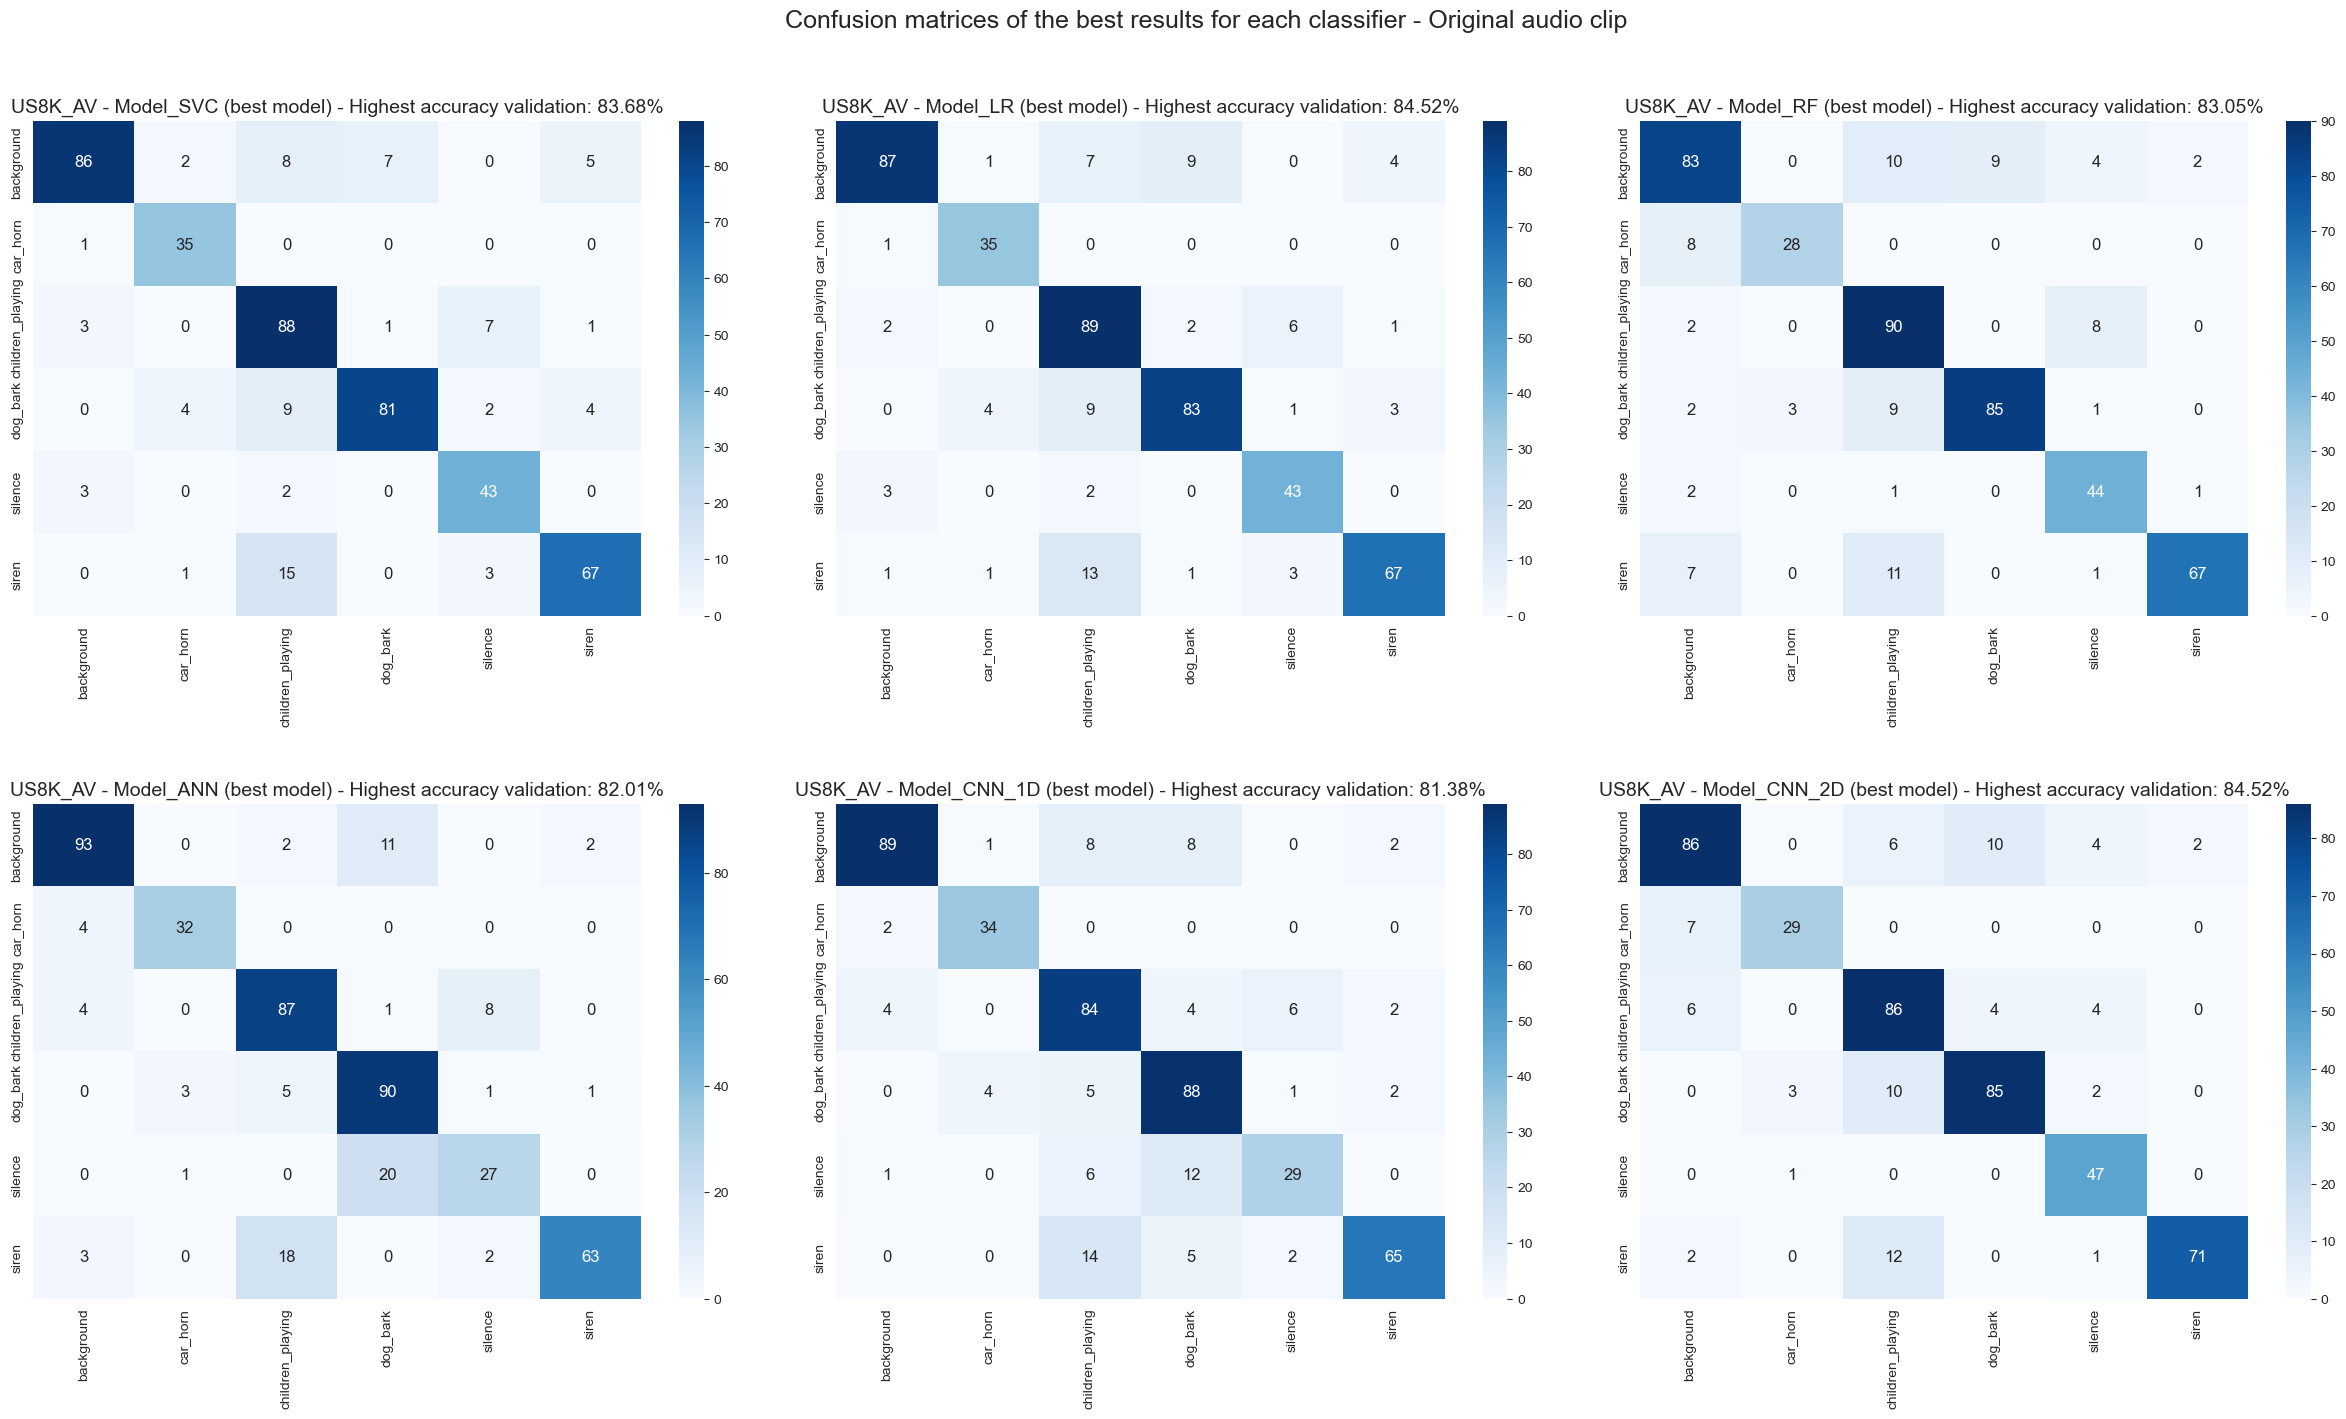

In [159]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

fig, axs = plt.subplots(2, 3, figsize=(25,15))
plt.suptitle('Confusion matrices of the best results for each classifier - Original audio clip', fontsize = 18,  y=0.97)

plot_confusion_matrix(y_val_audio_cat, 
                      predict_audio_dic['predict_audio_SVC'], 
                      audio_class_report_SVC_acc, 
                      cmap_cm, 
                      'Model_SVC_confusion_matrix',
                      ax=axs[0,0],
                      savepic = False)

plot_confusion_matrix(y_val_audio_cat, 
                      predict_audio_dic['predict_audio_LR'], 
                      audio_class_report_LR_acc, 
                      cmap_cm, 
                      'Model_LR_confusion_matrix',
                      ax=axs[0,1],
                      savepic = False)

plot_confusion_matrix(y_val_audio_cat, 
                      predict_audio_dic['predict_audio_RF'], 
                      audio_class_report_RF_acc, 
                      cmap_cm, 
                      'Model_RF_confusion_matrix',
                      ax=axs[0,2],
                      savepic = False)

plot_confusion_matrix(y_test_enc, 
                      predict_audio_dic['predict_audio_ANN'], 
                      audio_class_report_ANN_acc, 
                      cmap_cm, 
                      'Model_ANN_confusion_matrix',
                      ax=axs[1,0],
                      savepic = False)

plot_confusion_matrix(y_test_enc, 
                      predict_audio_dic['predict_audio_CNN1D'], 
                      audio_class_report_CNN1D_acc, 
                      cmap_cm, 
                      'Model_CNN_1D_confusion_matrix',
                      ax=axs[1,1],
                      savepic = False)

plot_confusion_matrix(y_test_enc,
                       predict_audio_dic['predict_audio_CNN2D'],
                       audio_class_report_CNN2D_acc,
                       cmap_cm,
                       'Model_CNN_2D_confusion_matrix',
                       ax=axs[1,2],
                       savepic = False)

plt.tight_layout(pad=4)
plt.savefig(os.path.join(path_pic, picture_name))
plt.show()

### Classification report per audio segment (windowed)

In [161]:
audioS_class_report_SVC = classification_report(y_val_cat,
                                                predict_audioClip_dic['predict_audioClip_SVC'],
                                                target_names=nom_classes,
                                               output_dict = True)
audioS_class_report_SVC_acc = audioS_class_report_SVC['accuracy']
print(f'Accuracy for decision matrix: {audioS_class_report_SVC_acc*100:.2f}%\n')

audioS_class_report_SVC = metrics.classification_report(y_val_cat, 
                                                        predict_audioClip_dic['predict_audioClip_SVC'], 
                                                        target_names = nom_classes, 
                                                        output_dict = False)
print(audioS_class_report_SVC)

Accuracy for decision matrix: 80.42%

                  precision    recall  f1-score   support

      background       0.85      0.78      0.82       756
        car_horn       0.81      0.96      0.88       252
children_playing       0.71      0.81      0.76       700
        dog_bark       0.85      0.78      0.81       700
         silence       0.75      0.87      0.81       336
           siren       0.85      0.75      0.79       602

        accuracy                           0.80      3346
       macro avg       0.81      0.83      0.81      3346
    weighted avg       0.81      0.80      0.80      3346



In [162]:
audioS_class_report_LR = classification_report(y_val_cat,
                                               predict_audioClip_dic['predict_audioClip_LR'],
                                               target_names=nom_classes,
                                               output_dict = True)
audioS_class_report_LR_acc = audioS_class_report_LR['accuracy']
print(f'Accuracy for decision matrix: {audioS_class_report_LR_acc*100:.2f}%\n')

audioS_class_report_LR = metrics.classification_report(y_val_cat, 
                                                       predict_audioClip_dic['predict_audioClip_LR'], 
                                                       target_names = nom_classes, 
                                                       output_dict = False)
print(audioS_class_report_LR)

Accuracy for decision matrix: 80.99%

                  precision    recall  f1-score   support

      background       0.87      0.78      0.82       756
        car_horn       0.84      0.96      0.89       252
children_playing       0.73      0.83      0.78       700
        dog_bark       0.84      0.79      0.81       700
         silence       0.74      0.85      0.79       336
           siren       0.85      0.77      0.81       602

        accuracy                           0.81      3346
       macro avg       0.81      0.83      0.82      3346
    weighted avg       0.82      0.81      0.81      3346



In [163]:
audioS_class_report_RF = classification_report(y_val_cat,
                                               predict_audioClip_dic['predict_audioClip_RF'],
                                               target_names=nom_classes,
                                               output_dict = True)
audioS_class_report_RF_acc = audioS_class_report_RF['accuracy']
print(f'Accuracy for decision matrix: {audioS_class_report_RF_acc*100:.2f}%\n')

audioS_class_report_RF = metrics.classification_report(y_val_cat, 
                                                       predict_audioClip_dic['predict_audioClip_RF'], 
                                                       target_names = nom_classes, 
                                                       output_dict = False)
print(audioS_class_report_RF)

Accuracy for decision matrix: 80.04%

                  precision    recall  f1-score   support

      background       0.78      0.76      0.77       756
        car_horn       0.89      0.76      0.82       252
children_playing       0.73      0.85      0.78       700
        dog_bark       0.86      0.80      0.83       700
         silence       0.72      0.88      0.79       336
           siren       0.92      0.77      0.84       602

        accuracy                           0.80      3346
       macro avg       0.81      0.80      0.80      3346
    weighted avg       0.81      0.80      0.80      3346



In [164]:
y_test_encS = np.argmax(y_OHEV_val, axis=1)
y_test_encS

array([3, 3, 3, ..., 4, 4, 4], dtype=int64)

In [165]:
audioS_class_report_ANN = classification_report(y_test_encS, 
                                                predict_audioClip_dic['predict_audioClip_ANN'], 
                                                target_names=nom_classes,
                                                output_dict = True)
audioS_class_report_ANN_acc = audioS_class_report_ANN['accuracy']
print(f'Accuracy for decision matrix: {audioS_class_report_ANN_acc*100:.2f}%\n')

audioS_class_report_ANN = classification_report(y_test_encS, 
                                                predict_audioClip_dic['predict_audioClip_ANN'], 
                                                target_names=nom_classes,
                                                output_dict = False)
print(audioS_class_report_ANN)

Accuracy for decision matrix: 78.24%

                  precision    recall  f1-score   support

      background       0.84      0.82      0.83       756
        car_horn       0.83      0.89      0.86       252
children_playing       0.76      0.80      0.78       700
        dog_bark       0.69      0.83      0.76       700
         silence       0.69      0.57      0.63       336
           siren       0.91      0.73      0.81       602

        accuracy                           0.78      3346
       macro avg       0.79      0.77      0.78      3346
    weighted avg       0.79      0.78      0.78      3346



In [166]:
audioS_class_report_CNN1D = classification_report(y_test_encS, 
                                                  predict_audioClip_dic['predict_audioClip_CNN1D'], 
                                                  target_names=nom_classes,
                                                  output_dict = True)
audioS_class_report_CNN1D_acc = audioS_class_report_CNN1D['accuracy']
print(f'Accuracy for decision matrix: {audioS_class_report_CNN1D_acc*100:.2f}%\n')

audioS_class_report_CNN1D = classification_report(y_test_encS, 
                                                  predict_audioClip_dic['predict_audioClip_CNN1D'], 
                                                  target_names=nom_classes,
                                                  output_dict = False)
print(audioS_class_report_CNN1D)

Accuracy for decision matrix: 77.08%

                  precision    recall  f1-score   support

      background       0.87      0.78      0.82       756
        car_horn       0.85      0.93      0.89       252
children_playing       0.68      0.78      0.73       700
        dog_bark       0.70      0.83      0.76       700
         silence       0.70      0.52      0.60       336
           siren       0.89      0.75      0.81       602

        accuracy                           0.77      3346
       macro avg       0.78      0.77      0.77      3346
    weighted avg       0.78      0.77      0.77      3346



In [167]:
audioS_class_report_CNN2D = classification_report(y_test_encS, 
                                                  predict_audioClip_dic['predict_audioClip_CNN2D'], 
                                                  target_names=nom_classes,
                                                  output_dict = True)
audioS_class_report_CNN2D_acc = audioS_class_report_CNN2D['accuracy']
print(f'Accuracy for decision matrix: {audioS_class_report_CNN2D_acc*100:.2f}%\n')


audioS_class_report_CNN2D = classification_report(y_test_encS, 
                                                  predict_audioClip_dic['predict_audioClip_CNN2D'], 
                                                  target_names=nom_classes,
                                                  output_dict = False)
print(audioS_class_report_CNN2D)

Accuracy for decision matrix: 81.71%

                  precision    recall  f1-score   support

      background       0.83      0.78      0.81       756
        car_horn       0.86      0.81      0.83       252
children_playing       0.72      0.82      0.77       700
        dog_bark       0.83      0.80      0.81       700
         silence       0.78      0.96      0.86       336
           siren       0.94      0.80      0.87       602

        accuracy                           0.82      3346
       macro avg       0.83      0.83      0.82      3346
    weighted avg       0.82      0.82      0.82      3346



In [168]:
# Save the ground truth labels of the windowed audio (3,010 samples) as categorical an one hot encoder vector OHEV.

y_val_cat.tofile(os.path.join(path_arrays, '_y_val_audio_wind_cat.csv'), sep=',')
y_test_encS.tofile(os.path.join(path_arrays, '_y_val_audio_wind_enc.csv'), sep=',')

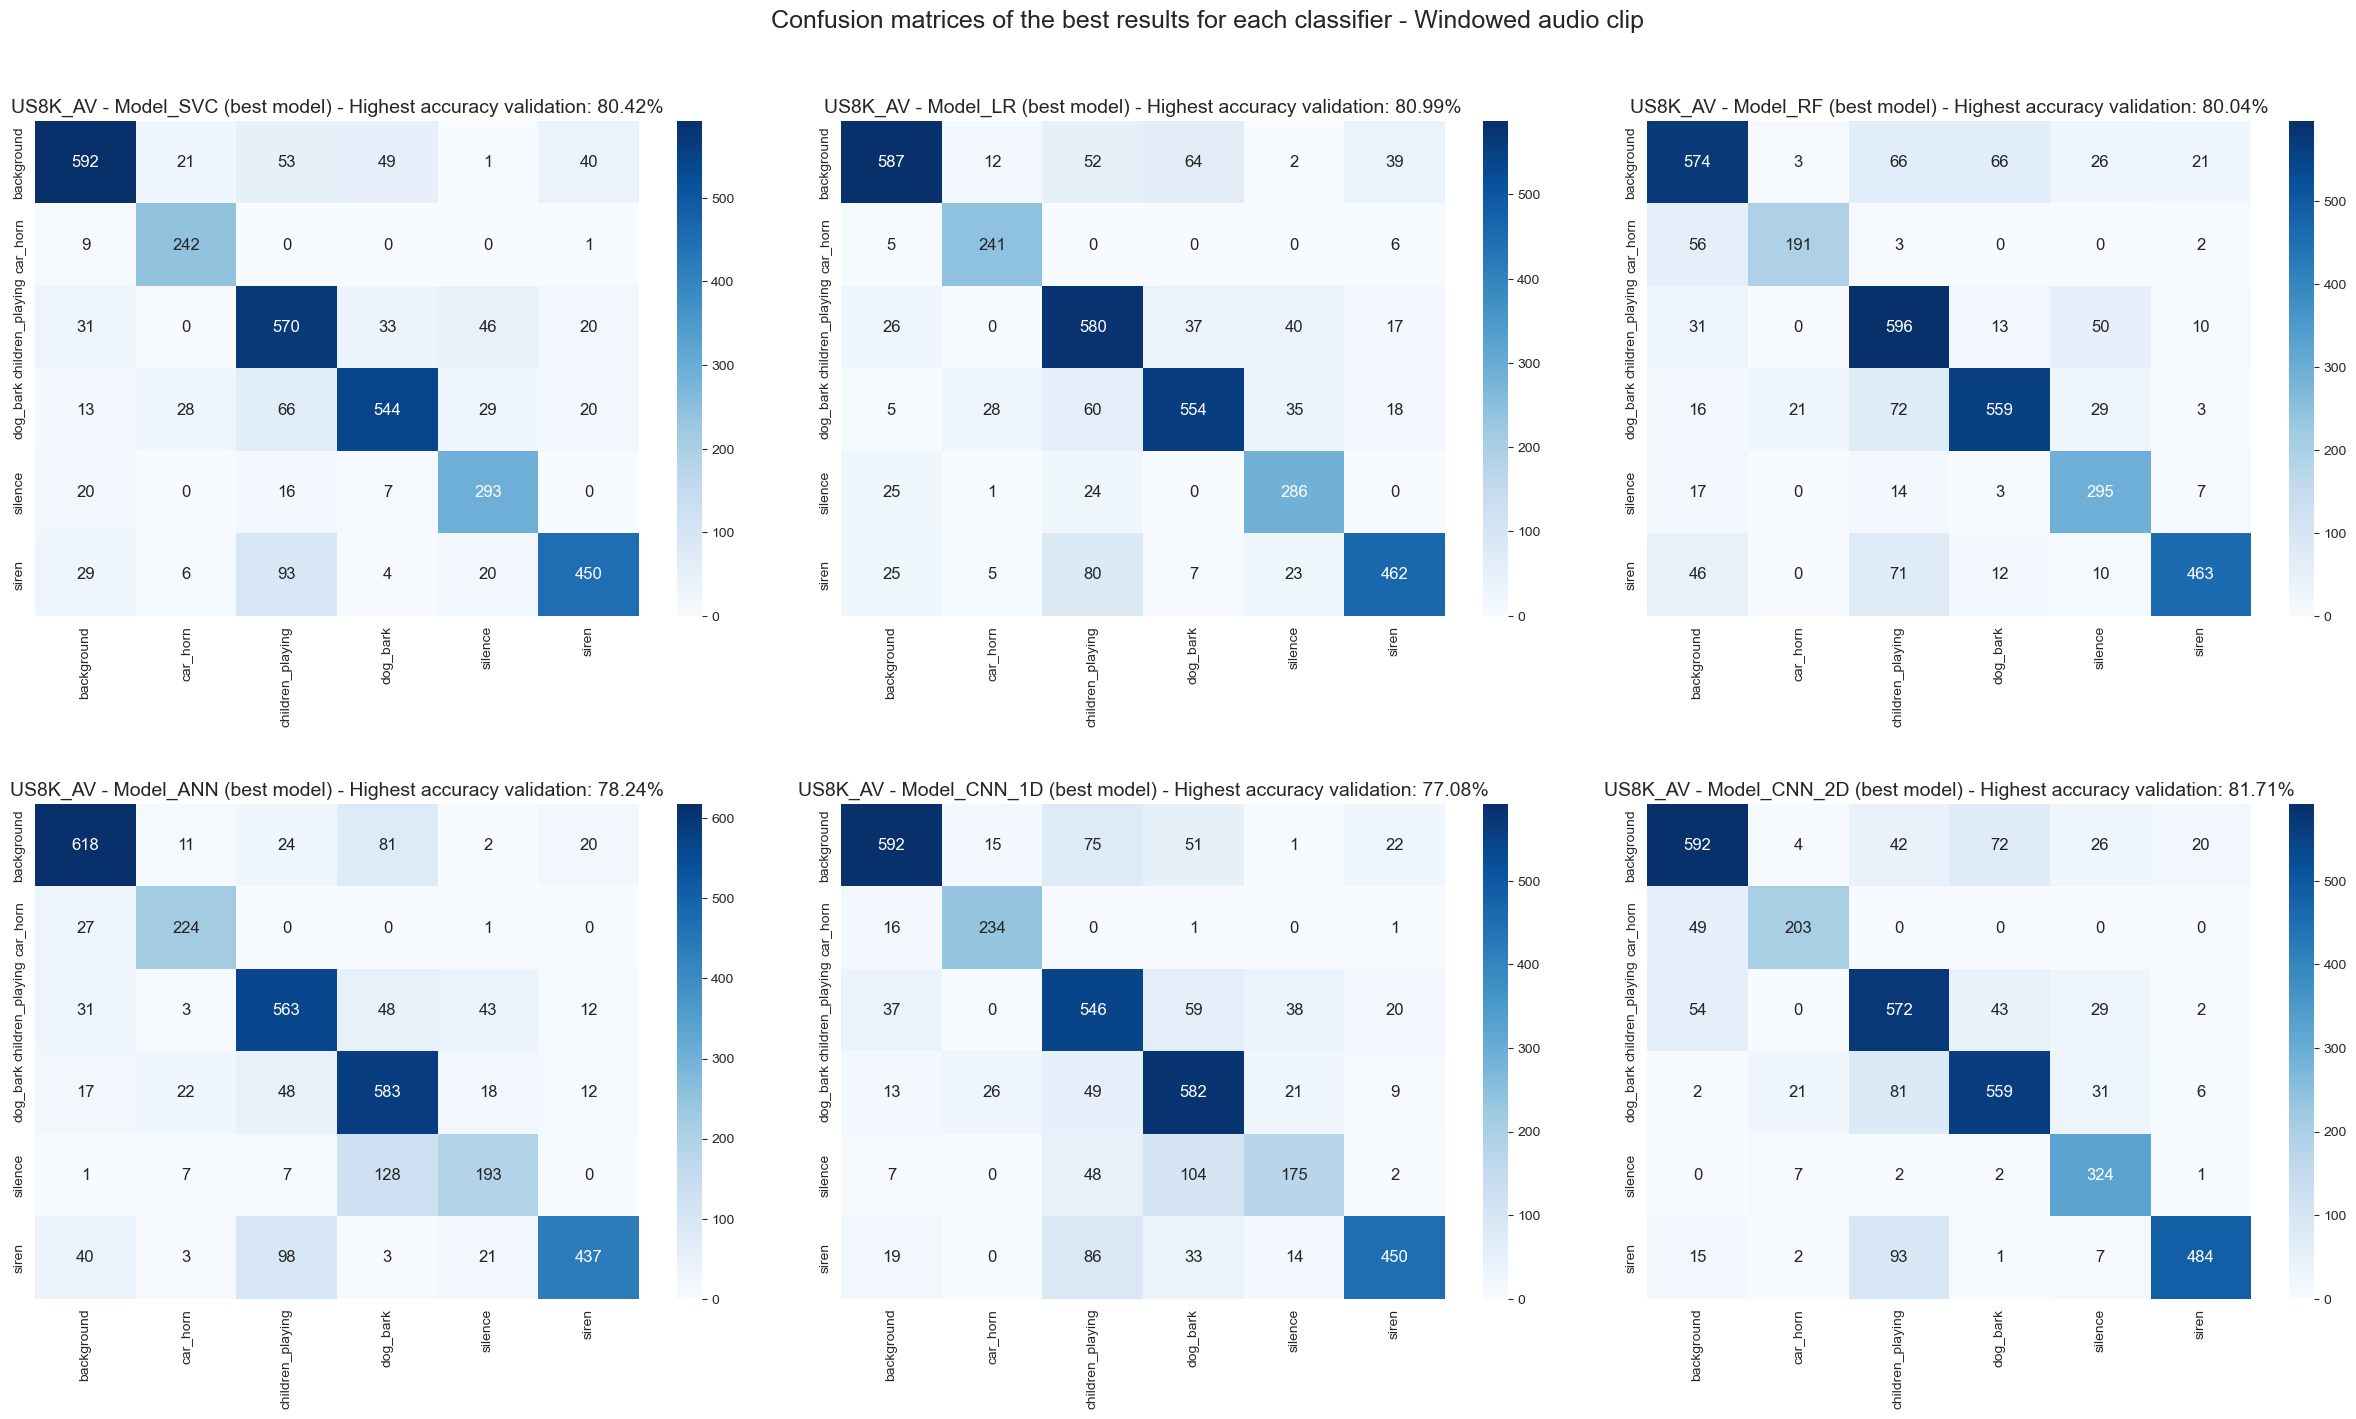

In [169]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

fig, axs = plt.subplots(2, 3, figsize=(25,15))
plt.suptitle('Confusion matrices of the best results for each classifier - Windowed audio clip', fontsize = 18,  y=0.97)

plot_confusion_matrix(y_val_cat, 
                      predict_audioClip_dic['predict_audioClip_SVC'], 
                      audioS_class_report_SVC_acc, 
                      cmap_cm, 
                      'Model_SVC_confusion_matrix',
                      ax=axs[0,0],
                      savepic = False)

plot_confusion_matrix(y_val_cat, 
                      predict_audioClip_dic['predict_audioClip_LR'], 
                      audioS_class_report_LR_acc, 
                      cmap_cm, 
                      'Model_LR_confusion_matrix',
                      ax=axs[0,1],
                      savepic = False)

plot_confusion_matrix(y_val_cat, 
                      predict_audioClip_dic['predict_audioClip_RF'], 
                      audioS_class_report_RF_acc, 
                      cmap_cm, 
                      'Model_RF_confusion_matrix',
                      ax=axs[0,2],
                      savepic = False)

plot_confusion_matrix(y_test_encS, 
                      predict_audioClip_dic['predict_audioClip_ANN'], 
                      audioS_class_report_ANN_acc, 
                      cmap_cm, 
                      'Model_ANN_confusion_matrix',
                      ax=axs[1,0],
                      savepic = False)

plot_confusion_matrix(y_test_encS, 
                      predict_audioClip_dic['predict_audioClip_CNN1D'], 
                      audioS_class_report_CNN1D_acc, 
                      cmap_cm, 
                      'Model_CNN_1D_confusion_matrix',
                      ax=axs[1,1],
                      savepic = False)

plot_confusion_matrix(y_test_encS,
                       predict_audioClip_dic['predict_audioClip_CNN2D'],
                       audioS_class_report_CNN2D_acc,
                       cmap_cm,
                       'Model_CNN_2D_confusion_matrix',
                       ax=axs[1,2],
                       savepic = False)

plt.tight_layout(pad=4)
plt.savefig(os.path.join(path_pic, picture_name))
plt.show()

# End of the notebook